['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


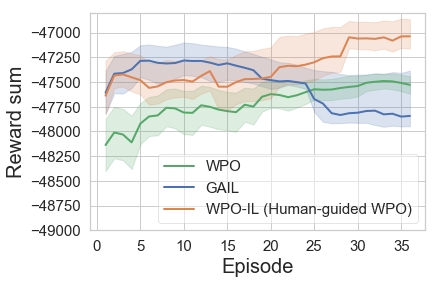

In [33]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
print(sns.color_palette().as_hex())

blue = (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
orange = (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
green = (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)
red = (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

def moving_average(a, n = 15) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

x = np.arange(1,37)

wpo_il_then_rl = [[-54365.00437842504, -46696.96511606806, -46965.89722411743, -47144.79129142325, -47231.973399673756, -46693.2801998745, -47092.47330463615, -46993.416530775314, -46953.273560204434, -46986.990925691745, -47350.78670035914, -47563.01720174158, -47705.19744973922, -47451.22935059859, -47939.820463261975, -47339.53008249223, -47289.671256674206, -47681.59263209189, -47250.93199364775, -48837.05592575827, -47597.94855965451, -47386.774428700635, -47244.73848101526, -47523.52682185667, -47757.47831242367, -47425.10362742319, -47341.24477087226, -47182.98677510652, -47442.29778869107, -47514.01595661509, -47148.4430834541, -47337.44032919352, -48087.21536879353, -48958.584273764136, -47523.274540405706, -47230.910079584435, -47446.12795798266, -47389.61193533798, -47014.68615412208, -46900.59299784041, -47023.27827362493, -47142.272914464644, -46857.28869462519, -47200.711714025405, -47529.911069403264, -47047.952940797855, -46746.77961525498, -49251.39503170244, -47942.2646424201, -47356.15256550133],
                  [-49449.105322660835, -47360.87191659145, -46935.864162806545, -48509.524558758996, -47165.191706064, -46934.05857457257, -47335.807528911384, -46759.86413801184, -47495.47176683857, -47286.20785194975, -47398.136982612894, -47561.67801973385, -47459.996823208014, -47167.73875562895, -47149.478241171826, -47462.741710330134, -47098.52223489591, -47743.19595974047, -49275.78439846833, -48986.63192271424, -47201.438802362, -46561.72190013634, -47416.7218347551, -46902.07501502098, -46920.60033605125, -46873.75735033781, -46501.54088918255, -48109.25485100888, -46856.43103387667, -46910.370082354486, -46786.45752553482, -47009.33593703605, -47218.34460147232, -47118.5177288195, -46803.316222616595, -46717.2187522492, -46609.69070916173, -46468.23551733913, -46597.38472133741, -46544.928812855826, -46930.39443273755, -46791.24985900598, -46777.78523079083, -47632.671435982396, -46978.263190703314, -46703.095713282666, -46420.34035663244, -47171.481949652356, -46403.34755768717, -46536.414346300284],
                  [-47579.282553704674, -47507.75206191145, -46958.88828183823, -46943.21101939892, -47504.7971085327, -48367.43539742689, -48240.166712769525, -48514.52140494656, -47290.35506834813, -47266.16479279135, -49700.96936558452, -48299.034113275586, -47052.25807775195, -47045.109131785954, -48302.912587483246, -47443.347630577744, -46677.95464667302, -46742.13918200302, -47368.63119518379, -47610.35606465383, -46512.86646595839, -46809.88998356131, -46823.403273604396, -47112.594456107094, -47545.30102841866, -47578.497577183996, -47410.50266678058, -53987.228526584644, -47404.0158288443, -46903.473212876415, -46909.64267942355, -46657.863728149976, -46637.0477121881, -47053.470622106666, -46703.14936404901, -46758.032298735285, -46898.780022582105, -46898.97826669154, -46842.63276218281, -46927.4941821997, -47148.43788253803, -47247.631527633945, -46977.66714927302, -47442.06085007353, -46743.92955817599, -47310.71169356176, -47152.27712077907, -47012.27817564232, -46859.92258170796, -47096.34569685491]]

# wpo_il_then_rl = [[-47912.978714528086, -49205.17115213567, -47418.03691544834, -46707.8522950904, -46793.233647127505, -46930.52967128813, -47183.60726553989, -46514.95215954694, -48260.274675709006, -46572.77199194619, -46467.29414197095, -49284.99122885364, -47031.3327419196, -47516.25467931552, -47621.83044379646, -47042.54374866668, -46954.50720048338, -47033.124900839204, -46941.80004237529, -46993.962197339984, -47007.05488903088, -46874.16641113672, -48752.1271457937, -46727.74436642836, -46858.27906598602, -46704.00812341213, -46458.63154333022, -47202.73441503164, -46942.29761592557, -47229.310072758795, -47090.19406954371, -47265.823046214624, -47600.90900615248, -47159.25215551497, -47714.95290009614, -47187.47870443436, -47155.6063577446, -46846.81575649963, -46804.70173276825, -46688.65982780944, -46733.735259350615, -46765.33616586323, -46865.46915814045, -46739.906158942606, -46563.936377751364, -47315.47887537403, -47412.97864537195, -46808.22972915649, -47289.42607429388, -47683.373058183126],
#                   [-50830.65762832029, -47470.78908253583, -48268.90533877118, -46662.30262780535, -46965.54989334233, -47364.98747172094, -47277.042538297675, -47345.508091225805, -47220.963072902865, -47327.26096340894, -47169.4172413556, -47501.718654896984, -47753.53436439334, -47059.41510580618, -47415.37631164071, -47470.449239059875, -47404.24539706139, -47248.0458591734, -47138.20517790187, -47222.25662420267, -47461.69871881851, -47274.798840739946, -47180.410409137534, -47259.473597090124, -47611.80662873141, -47306.9602249223, -47316.037718366, -47174.85169469589, -47067.40537904293, -47388.18683292046, -47353.422524276175, -47292.066428208134, -47103.21132883583, -47175.612334059, -47388.24161338917, -47856.15075463354, -47342.40685415569, -48514.94359206608, -47449.90479535195, -47477.99251154486, -47534.80024247774, -47512.63846270584, -47232.03190593373, -47058.218585220275, -47071.873436355876, -46958.50282539327, -46944.48583669053, -46978.40380535065, -46939.834912660204, -46937.87314598933],
#                   [-49946.4946060005, -48759.97860034958, -49197.93602374004, -47866.649672448264, -47363.72648071343, -46934.73611859455, -47270.46944433365, -46799.76366320016, -47189.37779362272, -46949.956574449505, -47540.74678445077, -47004.81289105438, -46957.002468804414, -47561.17255864706, -48119.93567647853, -49320.536761403455, -48182.08580845698, -48467.13718113872, -46828.43961654905, -46542.62726653613, -46538.263791346704, -46849.780245433794, -46832.42450900571, -47726.892964736006, -46734.88944833786, -46801.54124915412, -47252.95965543435, -47829.13691461718, -48181.66226008047, -48023.978451463016, -48061.336881579984, -48414.098952239256, -48015.80772680342, -48235.33491338889, -48057.12188823447, -47823.741134548334, -47933.93885995912, -48244.99211066184, -48113.07784165631, -48185.262192017435, -47998.71131956408, -48149.86339846373, -48728.221785808164, -48783.25609020897, -47573.40359037979, -48183.00972370518, -47746.757056947245, -47596.29109085289, -47370.784736099675, -47330.431787554306]]

wpo_il = [[-50326.192732597556, -46887.915717340074, -46788.51875240948, -48330.54267902223, -47852.54574611141, -47106.96102432966, -47006.68634039777, -46860.830082394394, -46722.15138174458, -46997.7808155611, -46930.706213247715, -47167.59151728616, -47038.18252145659, -46853.23073084872, -46997.62390830848, -46913.52942176806, -46875.919327616255, -47119.349265527366, -47305.53050278017, -47212.21756983007, -47341.77898785304, -47217.68312134926, -46938.90749249754, -46933.0450756981, -47205.19186144231, -47622.70354760117, -47747.69825425276, -47274.52837985787, -46991.433124022704, -46955.265920715414, -47087.375363567386, -47343.85881530323, -47309.52296878391, -47171.08867958799, -47544.18455174368, -47529.52200144256, -47449.48988569108, -47491.829246490444, -47579.530470210375, -47540.36305240727, -47443.41047390489, -47619.04305125051, -48030.5853278555, -47508.30086267568, -47522.4649738688, -47092.50566907639, -48013.36066919662, -47316.05724270525, -47839.623356936965, -48242.51032788552],
          [-47455.69604901786, -47436.16874648996, -47335.91135578464, -47210.797179532776, -47200.58172607788, -47113.19458267353, -47060.750505816395, -47479.316148339385, -48128.104571393764, -47831.72584527727, -48609.12595586912, -47079.11522208828, -47228.97856057052, -46992.58790871259, -46806.97762230772, -46921.840810062014, -47079.688585853546, -46969.33898116103, -46918.88058376388, -46916.0000769055, -46905.65590094817, -46930.16069651105, -46520.666836293865, -47265.85922059896, -48002.85545123425, -46988.59756217694, -46696.49640131575, -47311.60357838105, -47466.96570692376, -46969.48580232214, -46912.72367401229, -47329.2857636878, -47730.0718084381, -47726.543696833876, -47777.84026211369, -47344.503383590825, -47459.493216773546, -47444.96665131995, -47182.50179226448, -47238.84452463808, -46752.54450388726, -47040.71041587679, -46816.898793360735, -46907.39699487174, -47193.51915149997, -47912.44790525912, -47019.952830163355, -46993.30710637148, -47066.528010519876, -46952.36063357509],
          [-47530.86917786144, -47198.320746402715, -49328.32217639299, -48949.216720700104, -47222.60289183142, -47460.1976547587, -46674.4413865046, -47031.5177752385, -47215.06008159513, -47096.26567140686, -46900.007640937685, -46581.29972215865, -47051.807066674264, -47322.405183948315, -46834.859021748875, -46721.29599614863, -46860.862153262584, -47069.34054980449, -46702.48335420699, -46869.80380175267, -47961.46017613537, -47677.93500720322, -47032.47301329888, -46793.23282509184, -46912.93215624751, -46987.802660436224, -46846.881736649026, -47765.877314975514, -47759.76912989284, -47339.07013276361, -47496.60403550627, -47412.33563611368, -47092.82454980081, -46639.32479813769, -47138.54247528127, -47501.27471565156, -46949.189610841124, -48235.76766104003, -46860.43292128725, -47477.00667951143, -47863.89268806937, -47579.55527127666, -47657.45910733287, -46897.44749638214, -46799.423212751855, -47112.50944644144, -46790.88994450801, -47152.149887354, -47215.23099003879, -47014.57884609025],
         [-50545.992413697044, -47371.635554788074, -48168.716790875624, -50128.12758592898, -47339.3754346506, -47364.85635476261, -47500.05357823738, -47706.5955381934, -47510.3898868487, -47399.164541206614, -47398.39174228737, -47491.959605414944, -47998.07686267507, -49048.78484466671, -47317.18661385113, -47371.08113864609, -47490.14369194235, -47314.30065806469, -47099.79576806462, -47803.80407418389, -48297.900410528135, -47142.25596127032, -48818.30083989639, -47150.28642056347, -47473.541337706236, -47875.25410743238, -47544.07613316942, -49324.58688383958, -47276.046355678365, -48778.02702369873, -48246.04534158365, -48089.7801429597, -52877.27816114258, -47752.94556146658, -47518.62291698889, -47727.71371803567, -47776.342538936384, -47482.586143539, -50696.731922950974, -49200.397447044175, -54972.039580573364, -48205.37915396327, -47250.92879406141, -47712.599782058765, -47426.406102906054, -48139.3678209221, -47849.98329578261, -47562.160475955374, -47742.61792427861, -47507.272851842616],
         [-54255.412742871085, -47684.64821373237, -47445.53174841624, -47596.48412972237, -47091.56953840608, -47319.89886992246, -47492.653061599165, -47711.01685176239, -47650.69420099025, -47358.92688676958, -47089.52506581168, -47176.6941075688, -47654.4940185385, -47770.17457949077, -47763.99863609163, -47776.955600805464, -47776.389965332, -47777.69908722778, -47757.36824562283, -47749.735301310924, -47495.5681937912, -47249.691555322395, -47156.778744683834, -47146.93111410846, -47443.98458154996, -47416.979006101945, -47948.75121171207, -47088.694370740515, -47258.66273561188, -47426.5912308473, -47571.320142921024, -47751.99022757348, -47710.78814177154, -47562.77818616832, -47549.29585004635, -47539.862943592794, -47498.478455388125, -46806.974736916905, -54860.554362509, -48930.59893598174, -47161.134445924734, -47738.171002828494, -47661.90117896089, -47327.975030854155, -47223.208283328844, -46826.16829934745, -51046.20036081398, -53203.82802926609, -49188.69138555472, -47291.21573601832]]
wpo_rl = [[-52139.853053555526, -47214.44118986458, -48615.58062736582, -53414.93936809642, -47692.65272172947, -47360.10568584583, -49948.6808266076, -47392.36980323713, -47400.03739370723, -47594.052855873444, -47724.07203633455, -47604.87181886725, -47450.05700158782, -48151.96953920129, -48735.90447761427, -50117.19934396976, -47478.506510866726, -47630.6275216974, -47306.47966447853, -47260.639654407336, -47321.11629170092, -48257.39693502663, -48371.233095639625, -48725.87510657305, -47409.814710107734, -47475.345148144406, -47435.74285341175, -47585.82212490391, -47458.544994125645, -47358.610334628815, -47279.774434250954, -47363.81099654039, -47308.08080874358, -47432.64760181882, -47280.82118010656, -47676.42176150895, -47538.348354561705, -47727.122262495985, -47742.368058370754, -47776.42917749063, -47778.26647936092, -47777.96999196353, -47777.290200816715, -47778.55538714138, -47777.9499071804, -47778.177660821915, -47777.98557643161, -47777.92384683752, -47778.524255998964, -47777.98557643161],
          [-49235.57323645588, -47086.59188457407, -46825.5057438824, -47872.351120664636, -48778.32339517192, -47218.21515746012, -47522.09694586682, -47761.26084855302, -47337.80079203225, -47444.73580630998, -49781.44485023711, -47337.29457808077, -47072.66747218691, -47059.461926034266, -47345.101102937784, -47462.791074991495, -47424.80583336955, -50199.15650621417, -48297.998220397516, -47032.78451673907, -46932.978835616195, -46881.89675928706, -46989.18898146549, -47262.70518374845, -47733.917995124735, -47721.314553551834, -47973.18421023563, -47775.611432208396, -48219.94290865656, -49051.90163910808, -48031.827220190666, -48088.52031537081, -47547.19283534122, -47376.56899980561, -47280.880867360625, -47246.63495916088, -47008.48095701246, -46699.08443353926, -47358.928735938694, -47521.04915772948, -47338.839175341665, -47186.0045719156, -47249.19348228489, -47631.05659182521, -47633.47563836576, -47234.90132392877, -47442.69260245519, -47197.804281593766, -47505.3799154767, -47353.70073360582]]
trpo_rl = [[-50292.99161572205, -50548.55224294511, -49684.38783414124, -49168.550915151165, -47718.05183628932, -47469.52157635182, -47990.21095928402, -47890.15175584954, -47920.50272553856, -48173.95914775504, -48279.758341797315, -47876.93357038734, -48559.56415200186, -48144.732591957516, -47737.38497241704, -47874.94879958573, -48146.53989601316, -47721.035486305445, -49485.1033418065, -49856.12494756907, -48179.643878905365, -47446.79080428044, -47610.14670789748, -47539.03031484856, -47558.90709942562, -47333.35108859378, -47535.493306414886, -47476.994213961836, -47662.77107586037, -47615.53186584575, -47710.655796691324, -47775.985560554924, -47774.63123724949, -47777.375735550006, -47775.810043215686, -47777.98592904372, -47771.333689603685, -47777.01217282244, -47777.98557643161, -47777.98557643161, -47777.96489822148, -47777.98557643161, -47777.98557643161, -47777.57672801257, -47776.76821650052, -47760.84250109157, -47776.596536240606, -47777.98557643161, -47777.96810703821, -47777.98557643161],
         [-50512.95464872307, -48762.12936377866, -48483.44771069873, -48218.558241442995, -47907.597673168704, -47917.665777367016, -47471.484597963594, -47311.765612808864, -47148.13408699688, -47243.46184986913, -47471.93476767835, -47953.26117092574, -47608.08973382464, -47951.33905485915, -47503.160190617346, -47417.14621205891, -47469.642886438305, -47171.13467873507, -46895.848955368885, -47077.42381090773, -47083.30505466609, -47403.39628874054, -47409.022492758646, -47233.080066898925, -47065.33900041364, -47174.106619356055, -46995.48464077002, -47764.41231635476, -47563.77680852953, -47426.098782679794, -46877.23284557465, -46940.4451777504, -47538.38445816847, -47045.700871988396, -47680.334313109255, -47575.78579585545, -48009.03650136222, -47817.23104555641, -48274.86975597262, -47322.3055498063, -47564.785136551975, -47497.904854663204, -47393.52622071533, -47752.78480578093, -47582.784843999616, -47726.457284210985, -47470.17593870104, -47190.743478981174, -47171.496046158456, -47227.509545127345],
         [-50004.95650820893, -48978.66507772712, -48946.009215000384, -49035.355704723384, -48440.8291037808, -48426.99963445792, -48885.87185189786, -48998.937871461865, -50158.01333931503, -48132.087597192214, -48459.53745914203, -49561.16646952778, -49006.28659732365, -49222.56601060222, -51114.11339762336, -50625.84984967485, -51827.76794600299, -51268.30599488844, -51835.38700144373, -50001.215304907324, -48192.5714905999, -47523.900165562925, -49071.82989442428, -49110.80838654068, -48129.444223742925, -49250.35855251091, -49545.87478785627, -49063.90908125183, -50070.37255104423, -49591.97477140692, -47919.64831474277, -48383.035354099455, -48415.04839274024, -48337.178480735995, -47701.32044246783, -47467.07889027407, -47277.51167837816, -47636.04912387052, -47386.46818281309, -47338.576428028464, -47969.00537548506, -47643.38365538599, -47448.828307428026, -47974.4522047911, -47955.24018944727, -49041.66839316892, -48169.01709030195, -48504.808393337466, -49469.030591224204, -48812.625373325725],
         [-50540.043736252264, -47862.734175074205, -47558.49916071892, -47301.407603829764, -48034.904473138915, -47427.280164861484, -51473.25238384209, -47469.746865278714, -47569.91593677474, -47576.55693176478, -47741.167777468574, -47768.758454090785, -47198.279506975116, -47409.13714397745, -47325.83058381356, -47849.43019567168, -48419.440863397635, -48512.743813184716, -49746.7742880464, -53720.64765248628, -47972.51741841921, -47680.64609332583, -46863.015261854496, -47382.53705604411, -47764.340192861, -47285.28410262735, -47550.93643036994, -47735.70579580189, -47067.5338026043, -47326.397765136644, -47037.275232201864, -46933.85012788033, -46966.2811141374, -47425.204665972306, -47523.901451987345, -47671.70573510055, -47305.97044780396, -47495.28012737468, -47837.648414949916, -47137.09518148572, -47675.883918849286, -47552.279593560874, -47788.78468905624, -47765.54663371107, -47892.3143700699, -48309.71750371874, -49390.649749266864, -49220.47503400189, -48410.27775556674, -48917.14672135568]]
a2c_rl = [[-54534.4579247226, -56818.02581097118, -52348.42490042801, -48163.51162271971, -47891.738933070556, -47714.68658666944, -47356.30176731268, -47260.19768455996, -47364.28009657158, -47193.282745537916, -51268.70483206786, -52147.531993421886, -53263.37353659894, -53847.42648737763, -50078.09467830665, -55751.04784204208, -49144.45919791051, -51913.94328472298, -55637.77166019851, -54813.87276752727, -52945.196692186146, -53301.31306845839, -56404.6293765462, -56523.57279553617, -55392.395023580575, -52865.44733587067, -53816.37693998413, -54698.005491846336, -53403.600586695175, -53176.03353858208, -51500.72949882575, -53022.51770304311, -50598.89040294707, -52665.644754952904, -55237.37316447947, -51521.162531543676, -51536.16042933428, -54356.166573550494, -53842.89288361573, -53139.04862659544, -51620.04281734917, -51619.758811044674, -51460.66223836287, -51298.57837676981, -53700.0583809602, -55539.2189372373, -52601.430691052505, -51718.36192950424, -52220.81134955871, -51152.93132427769],
         [-52867.32637544439, -58946.957090278505, -52532.923246811835, -49317.99476466672, -54738.1133965873, -52348.99332548153, -51451.40575358718, -55791.07305144942, -48436.22495207276, -48553.012516394934, -47724.80964414144, -47928.7923343439, -47992.103254915266, -47864.8832749819, -47855.72495765026, -47957.51937286587, -50823.316034715084, -47736.084245329796, -51193.613638013194, -54416.184571359554, -51502.81087866401, -53827.362448657586, -54292.85083090646, -49726.78590716217, -50680.068504036266, -49140.47015365465, -51628.38600142198, -51223.06451807701, -51638.44398809932, -53942.83514858679, -50980.249094348736, -50973.26016894365, -51041.673117629056, -52601.29273131654, -52268.681025665974, -51634.7393841072, -52250.59677234472, -51260.195803665985, -51047.950374970336, -50473.098844951084, -53272.37586997749, -50906.209008578255, -50797.16356577533, -53123.28544529643, -50902.9869900659, -50738.50947954508, -52595.334619920635, -51754.20287878883, -52335.325706097574, -51483.156130688236]]
ddpg_rl = [[-46920.49519838701, -45670.366580499875, -48477.47580573685, -46876.37964506786, -46960.12077986053, -46823.31940162935, -46617.550436276426, -46621.991837247, -47059.892682173726, -47479.049301333944, -46950.23846853907, -46416.61798088011, -47797.28672351813, -46995.05459138479, -46671.30136620599, -47728.34125219444, -46169.12150692475, -47028.47263580819, -46693.79348061681, -47165.33075675003, -48752.82505362661, -46793.46142036271, -46366.799412328524, -46608.222402747124, -46525.872095263505, -47453.65406288672, -46709.83945904478, -46382.48974285023, -46636.0121737054, -47629.17130573468, -46456.094233953896, -46428.87070150761, -47957.126579506665, -47292.8362301177, -47991.010358976426, -47393.06606641278, -47430.45940893802, -46725.91928006984, -47898.47998283943, -46652.1537009594, -46477.170366918406, -46342.40997333767, -47414.6016665619, -47655.30195975946, -46684.416296060284, -46831.88169104872, -47617.7242047371, -47479.9142417515, -47724.68805723426, -48811.592851467016],
          [-48686.70275626527, -46943.25798565598, -47148.43176273555, -47300.4176938713, -47132.63320087296, -48824.87758180286, -47236.63372641223, -47182.99136653212, -46247.904263089105, -46527.92692374562, -46496.075460209395, -46975.583787226395, -48450.24157645186, -46750.80015704153, -47748.011299549245, -46390.324534548905, -47384.73688349336, -46327.42634183167, -47768.72368507806, -46663.156550275635, -47065.8627731302, -46844.5374181539, -46559.27206940823, -46953.87328340161, -47072.36333359368, -46779.38188740159, -46906.73800624136, -46817.09205884392, -47637.92046172001, -46761.654115415666, -48638.34974883293, -47543.29435527238, -47147.05581611514, -47778.38730659627, -46949.67938675339, -46866.30230743466, -46553.66519359567, -46809.223874099975, -46403.47096152951, -46323.67509658184, -46866.36254168748, -47709.27954585939, -46773.11826795356, -48596.21706603038, -46430.16365224087, -46727.491974970726, -46694.3341427578, -49177.7544339199, -47527.08158255654, -46836.34521397778]]
ppo_rl = [[-48833.09506286812, -48180.86668572527, -47550.18315492287, -47364.153293227784, -47256.67007155485, -47207.730608397695, -47197.68100369785, -47358.166741411645, -47511.12905737953, -48560.64596647425, -48771.36900468909, -48602.644852104386, -49389.58783642653, -49277.50620819861, -49711.67980810917, -49599.306414134706, -49324.28226251496, -48447.323497170335, -48826.904377902254, -48916.447126048064, -49523.28756084209, -49728.39836216949, -49592.80197947105, -48471.26994227662, -47966.096193278856, -47718.07993381336, -47742.91424919597, -47015.505946225494, -47471.91772044302, -46977.14776604982, -47124.648271032594, -47615.742222472276, -47569.300224255734, -47437.17867141483, -47354.7143206915, -47550.28939033422, -47606.32207513527, -47659.87098060638, -47675.3191459142, -47564.69714326942, -47505.60084502158, -47533.61646118863, -47587.88669612772, -47506.48142086514, -47623.772487112845, -47606.26041130261, -47510.05876123033, -47538.10355535096, -47520.72241888777, -47347.838890911196],
         [-49617.71419749535, -48966.95990426227, -47568.29320034271, -48268.44886814482, -47495.546901617556, -47928.638385418, -47552.48134835302, -47161.771110934555, -47250.652807667524, -47514.31718673548, -47603.25406024587, -47745.746447694124, -47444.66408587412, -47231.06320853496, -47260.41793074583, -47184.94836632747, -47360.19576234416, -47385.79010569971, -47271.92294475497, -47313.8421181315, -47266.39053192601, -47235.59262177587, -47485.96038168684, -47241.02467017049, -47485.89922863683, -47431.00291717203, -47452.61878851462, -47313.55755453015, -47525.2552805068, -47201.13345891467, -47217.61905684489, -47088.05411753835, -47165.50966338371, -47062.68934309867, -47332.12141930865, -47258.043689494385, -47284.72447324073, -47399.52043152713, -47570.126367240024, -47590.48698359489, -47704.3442448052, -47665.4621150298, -47289.557441456775, -47309.360172743596, -47255.48058982503, -47326.31808731667, -47136.90966756892, -47141.48326682721, -47708.7011496041, -49734.08402424039],
         [-50004.95650820893, -48978.66507772712, -48946.009215000384, -49035.355704723384, -48440.8291037808, -48426.99963445792, -48885.87185189786, -48998.937871461865, -50158.01333931503, -48132.087597192214, -48459.53745914203, -49561.16646952778, -49006.28659732365, -49222.56601060222, -51114.11339762336, -50625.84984967485, -51827.76794600299, -51268.30599488844, -51835.38700144373, -50001.215304907324, -48192.5714905999, -47523.900165562925, -49071.82989442428, -49110.80838654068, -48129.444223742925, -49250.35855251091, -49545.87478785627, -49063.90908125183, -50070.37255104423, -49591.97477140692, -47919.64831474277, -48383.035354099455, -48415.04839274024, -48337.178480735995, -47701.32044246783, -47467.07889027407, -47277.51167837816, -47636.04912387052, -47386.46818281309, -47338.576428028464, -47969.00537548506, -47643.38365538599, -47448.828307428026, -47974.4522047911, -47955.24018944727, -49041.66839316892, -48169.01709030195, -48504.808393337466, -49469.030591224204, -48812.625373325725]]

plt.plot(x, moving_average(np.mean(np.asarray(wpo_rl), axis = 0)), label = 'WPO', linewidth = 2, color = green)
plt.plot(x, moving_average(np.mean(np.asarray(wpo_il), axis = 0)), label = 'GAIL', linewidth = 2, color = blue)
plt.plot(x, moving_average(np.mean(np.asarray(wpo_il_then_rl), axis = 0)), label = 'WPO-IL (Human-guided WPO)', linewidth = 2, color = orange)
plt.fill_between(x, moving_average(np.percentile(np.asarray(wpo_il), 25, axis = 0)), moving_average(np.percentile(np.asarray(wpo_il), 60, axis = 0)), color=blue, alpha=0.2)
plt.fill_between(x, moving_average(np.percentile(np.asarray(wpo_rl), 30, axis = 0)), moving_average(np.percentile(np.asarray(wpo_rl), 70, axis = 0)), color=green, alpha=0.2)
plt.fill_between(x, moving_average(np.percentile(np.asarray(wpo_il_then_rl), 30, axis = 0)), moving_average(np.percentile(np.asarray(wpo_il_then_rl), 70, axis = 0)), color=orange, alpha=0.2)


plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(-49000, -46800)

plt.ylabel('Reward sum', fontsize = 20)
plt.xlabel('Episode', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 15, framealpha = 0.5)

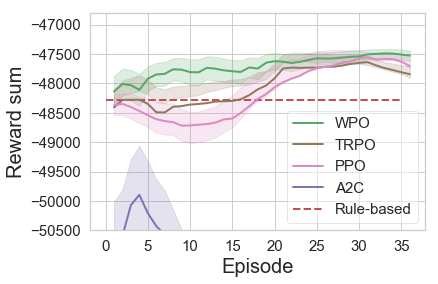

In [32]:
plt.plot(x, moving_average(np.mean(np.asarray(wpo_rl), axis = 0)), label = 'WPO', linewidth = 2, color = green)
plt.plot(x, moving_average(np.mean(np.asarray(trpo_rl), axis = 0)), label = 'TRPO', linewidth = 2, color = '#937860')
plt.plot(x, moving_average(np.mean(np.asarray(ppo_rl), axis = 0)), label = 'PPO', linewidth = 2, color = '#da8bc3')
plt.plot(x, moving_average(np.mean(np.asarray(a2c_rl), axis = 0)), label = 'A2C', linewidth = 2, color = '#8172b3')
plt.fill_between(x, moving_average(np.percentile(np.asarray(wpo_rl), 30, axis = 0)), moving_average(np.percentile(np.asarray(wpo_rl), 70, axis = 0)), color=green, alpha=0.2)
plt.fill_between(x, moving_average(np.percentile(np.asarray(trpo_rl), 40, axis = 0)), moving_average(np.percentile(np.asarray(trpo_rl), 60, axis = 0)), color='#937860', alpha=0.2)
plt.fill_between(x, moving_average(np.percentile(np.asarray(ppo_rl), 40, axis = 0)), moving_average(np.percentile(np.asarray(ppo_rl), 60, axis = 0)), color='#da8bc3', alpha=0.2)
plt.fill_between(x, moving_average(np.percentile(np.asarray(a2c_rl), 30, axis = 0)), moving_average(np.percentile(np.asarray(a2c_rl), 70, axis = 0)), color='#8172b3', alpha=0.2)


plt.hlines(y=-48287.43343061332, xmin = 0, xmax = 35, label = 'Rule-based', linewidth = 2, color = red, linestyle = '--')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(-50500, -46800)

plt.ylabel('Reward sum', fontsize = 20)
plt.xlabel('Episode', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 15, framealpha = 0.5)

In [4]:
a2c_violation_rate = 0.5470430107526881 # 20 - 23.5
a2c_average_hourly_power = 17978.42356996116
a2c_temp_list = [18.26516, 17.471035, 17.150476, 18.970098, 19.894947, 18.001383, 17.366499, 19.087265, 19.97944, 18.064798, 17.411766, 17.136057, 16.934597, 16.834381, 16.779057, 16.739973, 16.703728, 18.70955, 17.38939, 19.326073, 20.018658, 18.052015, 17.393843, 17.128542, 16.66549, 16.378616, 16.175196, 16.023577, 15.923837, 15.939331, 16.015934, 16.105371, 19.168858, 18.522455, 18.517405, 21.102335, 22.221481, 22.475296, 22.499464, 22.499962, 22.50006, 22.500042, 21.732172, 21.474321, 21.314648, 21.227228, 22.397768, 22.497082, 22.206177, 22.287403, 22.44712, 22.0503, 21.457075, 20.894592, 22.383148, 21.472961, 22.408476, 22.256407, 22.421589, 21.846712, 21.378984, 21.020947, 20.805824, 20.664467, 22.292227, 20.848383, 20.085024, 22.081749, 20.402077, 22.00184, 20.434772, 19.619106, 19.053497, 18.743643, 18.547443, 18.367977, 20.312096, 18.61162, 20.196333, 18.604797, 17.642202, 17.399775, 17.156685, 16.992456, 18.83178, 17.414223, 16.971212, 16.712381, 16.565239, 16.461222, 16.373966, 16.297798, 17.989021, 16.822039, 18.798393, 19.492796, 19.773943, 20.012384, 17.816624, 17.054995, 16.727459, 16.484385, 18.412199, 17.058218, 16.568758, 16.412813, 16.34644, 18.339565, 17.033752, 16.569622, 18.460306, 19.43957, 17.569723, 16.94336, 18.642792, 17.221714, 19.086596, 19.729242, 19.980865, 20.19271, 17.648342, 16.395878, 18.304398, 16.469784, 18.384598, 16.716743, 15.871273, 15.535891, 15.960266, 16.54869, 16.900852, 17.361345, 17.963247, 18.453564, 21.254795, 20.208656, 22.200443, 20.968437, 22.40749, 21.783804, 22.39571, 22.487972, 22.49628, 22.23367, 22.433844, 22.437817, 22.318624, 22.220118, 21.938427, 21.739136, 21.517908, 21.28175, 20.981878, 22.358477, 22.499249, 22.499918, 21.366064, 21.076292, 22.405306, 21.009123, 22.367956, 20.864138, 20.15137, 19.865904, 22.032312, 20.44317, 19.913223, 21.963198, 20.156488, 19.336819, 19.01854, 18.752832, 20.683994, 21.313934, 19.252573, 18.475065, 18.046005, 17.64616, 19.824736, 18.234724, 19.863564, 20.63052, 20.860802, 18.620605, 20.151566, 18.321842, 17.661144, 19.353598, 17.88215, 17.400465, 17.120184, 16.977928, 18.932598, 19.9085, 20.276484, 18.236086, 17.536102, 19.226288, 17.78321, 17.3397, 17.098324, 16.993746, 16.945232, 18.958048, 19.987356, 18.147966, 19.878166, 18.262596, 19.841911, 20.649614, 18.561783, 20.20064, 20.843105, 21.06661, 18.853085, 18.088408, 17.765924, 19.871077, 18.398716, 17.740213, 17.377523, 17.223719, 17.181494, 19.566519, 21.315794, 22.217054, 20.467663, 19.966888, 22.18259, 21.127604, 20.743603, 22.370886, 22.499971, 21.875673, 21.596739, 21.695509, 21.7731, 21.785824, 21.785664, 21.787334, 21.736862, 21.677425, 21.624073, 21.57378, 21.590492, 21.618052, 21.633593, 21.640848, 21.643404, 21.661165, 22.46563, 22.4996, 22.116997, 22.01458, 22.463388, 22.31222, 22.465504, 21.832403, 21.404516, 21.154198, 21.019476, 20.926516, 20.84799, 20.784641, 22.356268, 21.151598, 20.500536, 20.246399, 19.965334, 19.590336, 22.029417, 20.412594, 19.496681, 19.043068, 18.560343, 18.317076, 18.105848, 17.947641, 17.855305, 17.723812, 19.937437, 20.69647, 18.707848, 17.989735, 17.721699, 17.49173, 17.358652, 17.274517, 19.252287, 20.217672, 18.329763, 17.68494, 17.4147, 17.220425, 17.11329, 17.042442, 16.98267, 18.966667, 17.620605, 19.531857, 20.207027, 18.212034, 19.886356, 20.430174, 18.381231, 17.664717, 17.357038, 17.117558, 16.980118, 16.88883, 18.852345, 17.489079, 16.888618, 16.563923, 18.69074, 20.042137, 18.018772, 17.170837, 16.784939, 16.661154, 17.360329, 19.017458, 20.983505, 21.929934, 22.440804, 20.86458, 20.55989, 20.616081, 20.804827, 21.040565, 21.256338, 22.388752, 22.49622, 22.152702, 22.374985, 22.143606, 22.092085, 22.452707, 22.482723, 22.709648, 22.533627, 23.244564, 22.620033, 22.515347, 23.511593, 22.59046, 22.502474, 23.431005, 22.649597, 22.51908, 22.505756, 22.500652, 21.997412, 22.418951, 21.120188, 20.558897, 22.254389, 20.652355, 20.101389, 22.084007, 20.233334, 19.39619, 19.060396, 21.099112, 19.232544, 18.512913, 18.194658, 17.90913, 19.949884, 20.624397, 18.599304, 17.864994, 17.502613, 17.220629, 17.020517, 16.903227, 16.813538, 16.736284, 18.708466, 19.693232, 19.501696, 20.076189, 18.05483, 19.679096, 17.886375, 17.275606, 18.984102, 17.535294, 17.076807, 16.807573, 16.6723, 16.591158, 16.534859, 18.531553, 19.55281, 19.953377, 17.938465, 17.242746, 16.947908, 16.72962, 16.617939, 16.553257, 16.504986, 18.506191, 17.192041, 19.131512, 19.81494, 17.836746, 19.594515, 17.52088, 16.357267, 16.034472, 15.650017, 15.494371, 15.515172, 15.60803, 16.381586, 19.230858, 20.909826, 21.845535, 20.357393, 20.100912, 20.213549, 20.43013, 22.279364, 21.686829, 22.369192, 22.482689, 22.311222, 22.443316, 22.674337, 22.883017, 23.277794, 23.631824, 23.929228, 24.195759, 22.648178, 23.870571, 22.666607, 22.505259, 22.507692, 22.501991, 23.579668, 23.909771, 23.99018, 23.96316, 23.671339, 22.60455, 22.258554, 21.462465, 20.878674, 21.551943, 20.504503, 22.257227, 20.72417, 20.217535, 21.897846, 20.208408, 19.447695, 19.13541, 18.584482, 18.300322, 18.10966, 20.288822, 20.938574, 18.923845, 18.201998, 17.934444, 17.561367, 17.358995, 17.499535, 19.274267, 17.867136, 17.415567, 17.171143, 19.111156, 20.091368, 18.208916, 17.593441, 19.322927, 17.948471, 17.500927, 19.260616, 17.838175, 17.39847, 17.151045, 17.03501, 16.971226, 16.921515, 16.879759, 18.8844, 17.575272, 17.104641, 19.007183, 17.642323, 17.134073, 16.971025, 16.892761, 18.869038, 19.879395, 18.021927, 17.40068, 17.140633, 16.950916, 16.856518, 18.843395, 19.86083, 18.007069, 19.68721, 17.982943, 17.471048, 17.207102, 17.218954, 17.265612, 19.380814, 18.183668, 17.908398, 20.309362, 18.941586, 21.007856, 19.50512, 19.216656, 19.100874, 19.022026, 18.91582, 18.75953, 18.638334, 20.870392, 21.614021, 21.852797, 22.043026, 19.794294, 18.925526, 18.506622, 20.56172, 18.91876, 20.541225, 18.969942, 18.13705, 17.850155, 17.737988, 17.654274, 17.62943, 19.94992, 18.49265, 20.443142, 18.72392, 18.001617, 17.71997, 17.535181, 17.414928, 17.321978, 19.299665, 17.986668, 17.481525, 17.333252, 19.296076, 20.060263, 18.312159, 20.025225, 18.32212, 17.643847, 17.43176, 17.34272, 17.267916, 17.205444, 19.191082, 17.849972, 17.38991, 17.271744, 17.225546, 17.193045, 17.169098, 17.153866, 17.14463, 17.139664, 17.135735, 17.132795, 19.167265, 17.86359, 17.429453, 17.32117, 17.27797, 19.281921, 20.317842, 20.744383, 21.112677, 21.267502, 19.017796, 18.241646, 17.938467, 17.689419, 17.542065, 17.44543, 19.442926, 18.11537, 17.61804, 17.438583, 17.379856, 19.373428, 20.394943, 18.53725, 20.266792, 20.95883, 18.843027, 18.123356, 17.840746, 17.756311, 19.748764, 20.795736, 19.022116, 20.833172, 19.265585, 18.918535, 21.176004, 22.094412, 20.351583, 20.021393, 19.99432, 22.15236, 22.45024, 22.49395, 22.49805, 21.598577, 21.388386, 21.377026, 21.543901, 21.806335, 22.087734, 22.502628, 22.647692, 22.820435, 22.978693, 23.104225, 23.079096, 22.593273, 22.515034, 22.501984, 22.500639, 22.500204, 22.500061, 20.530523, 19.430082, 18.809258, 20.704205, 18.961037, 20.621065, 21.121386, 19.02064, 18.22813, 17.900806, 19.643562, 20.510048, 18.577797, 17.899765, 17.615862, 17.364716, 17.245497, 19.209827, 17.846859, 17.34411, 17.189327, 17.11233, 17.049097, 16.995605, 16.951963, 16.915428, 16.883629, 18.894476, 19.927822, 18.08965, 17.477718, 17.169666, 16.953316, 16.853903, 16.800512, 18.78697, 17.459547, 16.972477, 16.81712, 16.74986, 16.70326, 16.670994, 16.650927, 16.635647, 18.659952, 19.710972, 17.886421, 19.604008, 17.97636, 19.491066, 20.296595, 18.20019, 17.494804, 19.171196, 20.05159, 18.159254, 17.266958, 19.140333, 17.569544, 16.900837, 16.565002, 16.51395, 18.876347, 18.229567, 18.297516, 20.830704, 21.863026, 22.367182, 20.71298, 20.26019, 20.090391, 22.149887, 22.44391, 20.90349, 22.328903, 22.499102, 20.99938, 22.362114, 20.95642, 22.266994, 22.499598, 21.006365, 22.37538, 20.873856, 20.308233, 22.199026, 22.456078, 22.494816, 22.498552, 20.739042, 20.141815, 19.866276, 21.980938, 22.416328, 20.619493, 19.90469, 19.67213, 19.485893, 21.717632, 20.144203, 21.97848, 20.276814, 22.0381, 22.48245, 20.306255, 21.846432, 20.011385, 19.009422, 18.711262, 18.43263, 20.579996, 18.881943, 18.201979, 19.617823, 18.43939, 17.910736, 19.783476, 18.364569, 20.227024, 18.53134, 17.851507, 19.68018, 20.567, 18.651663, 17.993498, 17.739594, 17.545155, 17.424807, 17.337534, 17.292625, 19.222832, 20.283524, 18.451082, 17.860207, 19.609161, 18.202257, 17.76349, 19.547245, 18.168585, 17.742832, 17.490456, 17.402887, 19.408243, 20.43117, 20.820463, 18.801615, 18.106064, 19.811604, 20.669594, 18.727722, 20.380955, 18.88555, 20.900427, 21.567406, 22.272272, 22.479761, 22.499763, 20.114098, 21.867931, 22.464418, 20.553112, 22.228233, 20.700962, 20.404564, 22.260254, 21.247581, 20.903786, 20.88566, 20.917622, 20.966932, 21.041267, 22.446764, 22.49989, 22.49999, 22.055391, 22.467087, 21.944313, 21.74583, 21.894762, 22.147806, 22.437521, 22.617563, 22.522348, 22.430662, 22.282442, 22.131516, 21.988005, 22.454702, 21.916142, 21.640936, 21.46232, 21.322027, 21.19747, 21.078995, 20.967302, 20.80984, 20.62603, 20.20624, 19.925467, 21.808243, 20.09066, 19.446188, 19.173058, 18.654459, 18.383945, 18.204262, 20.385366, 21.020483, 18.991861, 18.262747, 17.985876, 19.984426, 20.662275, 18.64586, 17.919508, 17.639463, 19.429556, 17.991465, 17.533813, 19.294563, 20.224237, 18.297438, 19.94726, 18.29499, 17.496025, 17.25154, 17.158703, 17.071836, 19.033438, 17.671492, 19.570251, 20.232433, 20.486685, 18.385286, 17.663187, 17.362175, 19.17131, 20.089611, 18.192692, 17.544815, 19.250824, 20.125769, 20.461473, 18.388393, 17.663668, 17.360338, 19.170532, 20.649948, 18.609854, 17.578234, 19.41445, 17.856169, 17.097404, 16.90741, 19.21305, 20.927406, 19.522898, 21.582008, 22.263876, 20.775158, 22.318499, 22.499016, 22.499908, 21.189972, 22.383015, 22.496025, 22.499409, 22.499868, 22.499723, 22.606407, 22.822216, 23.231295, 22.618225, 23.5203, 24.126307, 24.130161, 24.398771, 22.714972, 22.499495, 22.505676, 23.846708, 24.303896, 24.547522, 24.633806, 22.782087, 23.725233, 23.737772, 22.611086, 22.50369, 21.509445, 22.340351, 20.814367, 20.42545, 22.223112, 22.500027, 22.500011, 20.42686, 21.954218, 20.078156, 19.018515, 18.668453, 20.642609, 18.95325, 20.456728, 18.719143, 20.395487, 20.916548, 18.772572, 17.96753, 19.884428, 20.517147, 18.478348, 17.735865, 17.405825, 17.166887, 19.09116, 20.03294, 20.361, 20.630539, 20.79309, 20.888634, 20.961725, 21.02398, 18.719639, 20.202671, 18.319609, 17.657555, 19.343899, 20.196203, 20.517317, 20.721516, 18.503647, 20.062714, 20.537035, 18.443037, 17.698023, 17.37723, 17.132114, 19.056665, 17.66433, 19.542507, 17.857218, 17.20256, 19.165945, 17.547422, 16.66551, 16.381872, 16.08895, 15.993326, 16.031693, 16.116274, 16.930756, 17.735441, 18.175507, 18.588934, 21.392616, 20.27205, 19.993391, 22.147186, 20.795534, 20.31196, 20.2821, 20.211487, 22.204304, 22.500168, 22.50027, 21.256205, 22.422577, 21.717978, 21.547245, 22.466967, 22.614603, 23.191275, 23.654762, 24.019262, 22.636604, 22.499634, 23.742378, 22.610245, 23.615404, 23.896454, 23.730665, 23.371552, 22.785028, 22.137756, 21.161463, 20.624243, 22.270222, 22.500074, 20.75574, 22.267986, 20.227234, 19.423298, 19.059704, 21.056818, 21.482735, 19.34189, 18.515375, 18.171984, 20.090836, 20.750727, 20.987043, 21.18211, 21.23278, 21.250408, 18.945826, 18.109457, 17.734251, 19.449018, 17.961096, 19.77981, 20.388807, 18.368761, 17.668613, 17.37596, 19.193876, 17.790703, 17.362839, 19.156643, 17.773615, 17.374578, 17.171013, 19.141022, 20.147219, 18.304522, 17.720463, 17.460033, 17.3528, 17.297998, 17.264368, 17.245203, 17.23213, 17.223486, 19.257458, 17.957775, 17.49281, 19.439688, 18.080858, 17.5627, 17.267513, 19.572361, 18.177036, 20.43703, 18.708578, 20.763357, 21.77009, 19.936666, 21.727203, 22.299957, 22.493126, 20.704208, 20.458315, 22.271479, 21.283825, 20.97846, 21.086092, 21.295765, 21.463842, 21.595005, 21.7317, 21.819637, 22.437916, 22.598637, 22.774858, 23.116817, 22.587444, 23.309656, 22.625443, 23.51776, 23.921965, 24.087126, 22.585077, 23.409483, 23.968798, 22.58169, 24.22378, 22.729795, 22.514334, 22.504267, 22.512106, 22.503494, 22.50017, 22.351683, 22.11958, 21.893312, 22.443598, 22.496017, 21.496025, 21.031471, 20.732931, 20.380507, 20.042944, 19.715853, 19.468819, 19.290459, 19.01207, 18.714565, 18.5154, 18.378023, 18.186085, 18.033627, 17.928225, 20.177765, 21.03056, 21.371136, 19.259794, 18.467434, 20.420322, 18.774975, 18.116447, 17.89639, 17.776312, 17.84313, 17.712912, 17.718788, 17.640636, 17.642693, 19.68791, 18.351843, 17.860554, 17.724897, 19.698992, 20.69191, 18.81967, 18.18502, 19.925789, 18.491728, 18.039223, 19.832642, 18.42831, 17.994516, 17.772106, 17.675955, 19.669699, 18.34099, 20.310484, 18.707699, 18.167871, 17.911404, 17.767923, 20.087358, 22.03084, 22.467123, 20.443325, 19.515736, 21.971085, 20.4288, 19.773361, 19.510904, 22.046583, 22.486177, 21.107424, 22.335749, 21.146856, 20.574257, 22.34045, 21.286264, 20.785992, 22.37724, 21.419804, 20.973906, 22.420317, 21.450453, 22.493465, 22.499832, 21.504145, 20.970081, 20.673933, 20.41105, 20.18009, 19.945675, 19.67966, 19.385845, 21.09703, 21.607687, 21.801369, 21.844559, 19.516449, 18.609589, 18.242233, 20.223934, 20.888418, 18.855911, 20.441654, 18.652367, 20.342478, 18.596565, 17.981592, 17.721378, 19.549505, 20.467112, 18.56467, 17.903187, 19.603996, 20.46178, 18.528837, 17.837252, 19.502842, 18.048594, 17.572693, 17.314013, 19.231392, 20.19227, 20.544157, 18.490835, 20.041382, 20.528416, 20.789692, 18.583313, 17.792353, 19.423336, 17.932236, 17.43997, 19.178175, 17.755001, 17.306934, 17.048695, 18.96585, 17.595175, 18.433266, 19.696594, 20.198471, 20.465738, 18.272818, 17.517632, 17.196205, 16.952341, 16.812569, 18.754644, 19.716597, 17.829271, 19.513197, 20.01312, 18.034113, 17.349215, 16.98227, 16.816933, 16.76565, 16.71162, 18.764095, 19.854643, 20.388086, 18.405521, 20.057594, 18.43991, 17.653797, 19.77216, 18.19259, 19.955767, 18.268652, 17.58859, 17.378727, 17.292534, 17.226051, 19.488281, 20.327269, 20.665434, 18.636238, 17.9078, 17.566826, 19.680578, 20.438616, 18.461079, 17.744305, 17.46142, 19.248974, 20.133469, 20.48248, 20.746532, 20.886652, 18.636875, 20.112503, 18.242416, 19.879484, 20.364077, 18.302124, 17.582361, 17.27765, 19.082087, 17.678404, 19.542528, 17.871552, 17.339705, 19.075047, 17.672413, 17.249428, 19.036926, 17.649965, 17.228806, 19.011301, 17.624395, 19.509123, 17.850029, 19.626396, 17.921043, 19.681698, 20.296986, 18.290964, 19.922287, 18.156054, 17.56357, 17.264559, 17.13131, 16.98965, 18.935038, 17.575333, 17.077044, 16.93723, 18.916641, 17.592691, 17.132528, 19.05521, 17.700941, 19.627506, 17.991867, 17.489443, 17.22768, 19.169464, 17.713148, 17.27385, 19.069752, 17.679796, 17.270296, 17.055065, 16.964012, 18.964657, 19.985933, 20.967709, 18.739702, 20.56813, 21.390945, 19.03854, 17.970266, 19.853718, 21.23987, 21.814894, 22.166748, 20.156557, 19.538116, 21.886486, 20.527225, 20.1853, 22.261889, 21.236677, 20.82455, 20.855036, 22.389008, 21.613483, 21.25232, 21.18233, 22.457056, 21.756464, 21.385822, 21.03874, 22.430962, 22.499939, 21.352566, 20.964632, 20.773266, 20.650244, 22.305992, 22.499868, 22.499876, 22.28822, 22.557575, 22.51802, 22.323902, 22.442785, 21.522444, 22.341238, 22.479116, 20.785275, 22.312704, 20.86262, 22.206936, 22.465775, 20.4305, 19.646952, 19.310045, 18.731293, 18.441189, 18.24816, 18.097895, 17.870876, 17.702011, 17.59086, 17.503334, 17.363216, 19.291746, 20.224552, 18.310257, 17.6643, 17.409466, 17.180737, 17.080511, 17.02258, 16.972937, 18.969975, 19.974638, 20.326159, 18.293152, 17.58116, 19.247532, 20.100735, 18.165876, 19.82502, 18.051455, 17.44458, 17.173971, 16.963123, 16.845165, 18.81628, 17.472792, 16.991035, 16.846827, 16.774351, 16.71378, 16.665415, 18.664623, 17.347507, 19.28781, 19.973562, 20.251364, 18.201023, 17.245354, 16.78951, 16.347345, 18.607101, 17.50243, 19.72604, 21.078966, 21.650019, 19.891384, 19.486769, 21.729734, 20.487505, 20.180481, 20.173359, 22.20478, 20.918097, 22.357473, 22.499178, 22.49992, 22.499937, 22.22512, 22.104551, 22.09585, 22.452995, 22.496122, 22.498968, 22.499605, 22.973625, 23.58675, 24.858166, 22.862038, 22.56208, 22.509764, 25.278101, 23.056372, 22.593122, 25.464825, 22.95465, 22.577726, 22.512367, 23.797289, 22.610249, 22.398167, 22.06562, 21.766254, 21.48774, 22.40882, 20.524172, 22.21196, 20.561361, 19.722115, 19.289015, 18.863604, 18.670456, 18.593102, 20.856974, 19.217459, 18.452581, 20.536177, 21.18049, 19.1386, 18.389185, 20.348467, 18.695612, 18.031641, 17.807707, 17.701723, 19.652864, 18.274439, 20.166107, 18.50498, 17.971767, 19.7302, 18.308485, 17.867138, 17.627203, 19.564575, 18.170933, 20.04972, 20.71591, 20.98161, 18.885145, 20.469606, 20.98538, 18.933662, 18.200949, 20.17581, 18.526293, 20.28434, 18.55329, 17.870728, 17.6436, 17.516195, 17.398024, 17.289518, 17.057785, 16.952602, 19.30652, 17.96777, 20.25443, 21.38038, 19.40373, 18.485203, 18.849777, 21.45431, 20.204113, 20.000248, 20.422155, 20.810635, 21.224983, 21.679077, 22.21707, 22.817217, 22.549864, 23.587484, 22.595812, 22.511692, 22.503016, 22.500168, 22.499474, 25.391449, 22.88631, 22.564716, 22.50982, 22.501913, 22.499182, 22.49817, 26.555502, 23.991251, 23.285511, 23.016933, 22.845398, 22.719046, 22.571995, 25.966778, 22.9849, 25.102026, 22.673548, 22.524895, 23.004635, 22.56066, 22.469028, 22.421677, 22.071985, 21.642319, 22.467535, 21.588457, 20.213486, 19.602716, 19.253042, 18.89092, 18.610847, 18.405207, 18.269436, 18.167736, 18.00618, 17.868315, 20.097681, 18.553623, 18.042948, 17.779764, 17.64638, 17.560318, 17.493782, 17.44064, 19.438896, 18.110506, 17.627262, 17.521719, 17.46749, 19.446283, 18.108255, 17.631819, 17.49835, 17.432617, 17.379051, 17.338024, 19.377491, 20.427145, 18.597134, 20.322388, 21.03284, 21.282902, 19.085154, 20.648256, 21.154367, 21.409788, 19.213482, 18.44041, 18.156391, 17.92325, 20.180693, 18.766474, 18.216251, 17.965845, 17.77275, 17.68548, 20.054163, 18.694666, 18.80306, 19.167213, 19.434671, 22.018469, 21.040691, 20.722317, 20.731735, 20.805779, 20.902113, 21.006851, 22.45485, 22.268112, 21.94108, 21.879835, 21.966408, 22.066444, 22.110529, 22.139591, 22.164595, 22.184776, 22.226795, 22.262661, 22.292027, 22.469652, 22.494032, 22.427929, 22.397657, 22.395523, 22.298939, 22.23933, 22.233826, 22.25188, 22.46454, 22.245207, 22.06385, 22.048155, 21.959764, 21.84926, 21.75164, 21.662231, 21.30264, 20.918737, 20.636993, 20.415634, 20.220514, 19.9407, 19.721642, 19.561434, 19.272324, 18.948954, 18.727407, 21.262587, 22.233353, 22.50028, 20.1302, 19.025345, 18.468382, 18.17164, 17.93752, 20.125416, 20.43266, 20.964989, 18.958622, 20.57828, 21.097168, 19.023283, 18.262146, 17.9629, 17.712725, 17.574594, 19.540417, 18.172407, 20.077229, 20.750277, 18.753183, 18.061771, 17.79169, 19.62148, 18.189114, 17.74787, 17.498081, 17.369478, 17.318392, 19.324877, 18.005907, 17.511303, 17.37642, 17.31943, 19.542038, 18.120188, 17.581463, 17.326536, 17.12858, 17.044226, 19.450872, 18.282497, 20.97705, 19.772778, 19.575079, 22.037354, 21.217352, 22.447035, 22.499596, 22.499516, 22.499418, 22.499376, 23.334764, 22.637089, 23.814123, 22.615868, 22.5181, 22.505175, 24.525648, 25.792187, 22.894403, 22.56605, 25.5509, 22.979616, 22.57857, 22.510187, 22.50553, 22.501135, 22.49974, 26.024227, 23.407516, 22.75746, 22.511171, 22.508543, 22.508314, 22.511528, 22.501162, 22.660397, 22.537554, 22.33752, 22.132532, 21.93902, 21.579248, 21.16816, 20.883638, 20.632406, 20.285229, 19.845465, 19.525246, 21.964104, 20.156786, 19.263943, 18.839483, 18.347397, 18.13653, 20.390676, 21.311628, 21.694052, 19.462872, 18.55599, 18.22301, 17.959356, 19.864779, 18.453865, 19.053919, 18.143015, 17.921228, 17.823843, 17.72663, 17.685963, 19.748327, 21.003954, 19.24394, 18.386435, 20.099884, 18.610315, 18.11759, 17.85202, 17.727335, 19.698599, 20.687859, 21.067888, 21.718025, 22.00736, 19.73447, 18.731716, 18.352467, 20.157005, 21.311672, 21.966507, 19.727243, 21.30314, 22.074556, 19.833622, 18.653446, 18.35486, 18.217031, 18.071726, 21.143951, 19.814837, 22.095926, 20.675741, 22.353596, 21.313324, 20.997334, 20.928116, 21.08956, 21.369482, 22.491426, 22.534512, 22.253828, 22.071283, 22.49222, 22.499964, 22.147646, 22.493853, 22.261654, 22.026373, 22.011822, 22.204979, 22.477951, 23.18484, 22.587725, 22.508017, 22.511612, 24.814661, 22.674728, 22.528633, 22.504025, 24.757215, 22.606327, 22.500097, 22.463316, 22.499262, 21.804188, 22.493639, 21.432825, 19.803919, 19.14214, 18.79317, 20.815622, 21.500006, 19.457958, 18.69181, 18.38308, 18.119396, 17.96757, 17.865696, 19.833115, 20.80913, 18.922493, 20.60241, 18.859585, 18.258835, 20.29135, 21.01332, 21.286354, 19.184933, 18.421547, 18.126709, 17.873484, 17.72947, 17.640303, 17.570728, 17.51312, 17.465393, 17.454386, 17.438622, 17.422607, 17.410616, 17.390854, 17.36657, 17.340567, 17.31316, 17.309853, 17.297785, 17.276995, 19.29699, 20.349745, 20.762611, 18.764517, 20.402407, 21.054886, 18.921494, 18.183125, 17.902287, 19.706085, 18.295458, 20.17733, 18.496733, 17.929161, 17.692667, 19.658943, 18.359926, 17.932264, 20.23237, 21.138744, 19.28831, 21.015072, 19.454552, 21.054365, 19.60879, 21.312252, 22.427599, 22.49961, 22.499702, 22.499807, 22.499893, 22.499863, 22.163012, 21.742098, 22.492893, 22.49967, 22.499788, 21.644585, 20.888163, 22.398186, 22.499743, 21.488705, 20.94933, 20.611118, 20.182264, 19.89561, 19.670795, 19.465109, 19.270695, 19.09718, 18.942503, 18.807722, 18.684248, 18.561226, 18.44124, 18.327534, 18.127964, 18.050016, 18.014227, 20.963074, 19.488382, 18.814598, 18.496439, 18.225023, 18.080368, 20.810816, 22.128744, 22.473827, 20.31396, 19.259884, 18.710423, 18.410446, 18.148293, 18.014616, 17.922604, 17.867516, 17.811987, 17.785944, 19.913832, 21.276188, 19.518974, 18.42895, 18.093328, 19.87972, 20.79198, 18.895178, 20.554777, 18.807234, 20.52286, 18.882645, 18.084673, 17.82632, 17.725916, 17.644115, 17.575266, 17.523155, 19.522352, 18.195938, 17.716137, 19.637072, 20.602303, 20.973902, 18.93899, 20.542639, 18.763145, 18.186775, 17.885733, 20.01827, 18.559551, 17.958454, 17.663582, 20.318249, 18.797506, 21.188747, 19.823153, 21.912615, 22.412565, 22.490831, 21.250025, 20.867142, 20.720879, 20.696901, 22.33914, 21.452484, 22.434021, 21.680021, 22.455284, 22.499525, 21.681711, 22.466022, 22.499842, 22.500076, 21.702297, 21.443218, 22.444735, 22.499441, 21.739735, 21.482235, 21.349123, 21.279806, 21.236814, 21.170967, 22.455452, 22.499962, 22.500145, 22.500206, 21.812891, 21.482693, 22.443857, 22.499504, 21.545452, 21.121952, 20.867065, 20.545256, 22.31118, 22.500307, 21.05185, 22.397007, 20.804548, 22.324684, 20.553246, 19.56119, 19.026098, 18.714272, 18.440117, 18.19575, 18.040422, 17.939754, 17.855076, 17.78427, 20.036154, 18.535233, 18.061415, 17.834496, 17.729694, 17.660982, 19.64303, 18.310225, 20.21339, 18.583633, 18.059967, 17.809576, 17.697111, 17.637426, 17.598215, 17.56618, 17.539888, 17.518839, 19.535414, 20.564281, 18.735594, 18.126532, 17.850021, 19.771288, 18.389688, 20.268414, 18.614536, 18.082851, 17.8131, 17.69353, 17.626093, 17.450752, 17.37266, 19.727673, 18.391588, 17.872534, 20.012915, 18.621798, 18.105482, 20.948172, 22.145477, 22.449013, 20.84966, 20.58937, 20.545656, 22.304895, 21.41544, 21.11605, 21.151264, 21.2346, 21.30213, 22.46307, 22.499931, 22.500017, 21.994555, 21.750132, 22.473902, 22.238956, 21.978287, 21.866716, 22.451885, 22.299137, 22.125189, 22.09897, 22.159786, 22.218773, 22.261372, 22.24569, 22.457083, 22.380245, 22.479858, 22.263391, 22.064507, 21.958265, 21.880592, 21.826685, 21.790754, 21.765963, 21.748976, 21.490828, 21.243708, 21.069489, 20.93262, 20.652512, 20.37987, 20.16299, 19.983547, 19.70975, 19.410528, 19.209972, 19.070917, 18.879171, 18.704975, 18.566336, 18.452808, 21.182814, 22.268517, 22.500122, 20.400194, 19.389313, 18.942799, 18.46135, 18.249184, 18.149994, 18.066849, 17.992596, 20.348976, 18.860981, 18.243793, 18.064987, 18.004808, 17.952206, 17.909512, 20.243341, 18.730772, 20.625162, 18.969141, 18.284222, 18.067612, 17.984188, 17.923895, 17.875214, 17.839512, 19.845247, 20.885765, 19.032946, 18.372044]

In [5]:
trpo_violation_rate = 0.150089605734767
trpo_average_hourly_power = 21665.21044826018
trpo_temp_list = [20.57791, 20.635454, 18.378952, 19.937447, 20.40797, 20.642605, 20.764442, 20.840769, 20.88961, 20.923101, 20.947914, 20.966852, 20.985329, 18.877474, 20.265322, 20.755255, 18.524742, 20.056974, 18.737234, 20.001526, 20.484795, 20.72428, 20.831823, 20.869146, 21.52603, 21.984804, 22.16797, 22.247599, 22.303545, 22.377394, 22.476461, 22.498137, 22.500063, 22.50028, 21.672163, 22.367062, 22.488277, 22.498451, 22.499968, 21.450321, 21.2205, 22.385992, 22.496, 22.498718, 21.769686, 22.39329, 22.487745, 22.496279, 22.498936, 22.514385, 22.503435, 22.50034, 22.500069, 22.500132, 22.500174, 21.694485, 21.450247, 22.406393, 22.496574, 21.86136, 22.39741, 22.486628, 22.495827, 22.498798, 21.541037, 22.414818, 22.497362, 22.499506, 20.865011, 20.078588, 19.744186, 21.7835, 22.160397, 22.276213, 22.299917, 22.30641, 22.071062, 19.586365, 19.732096, 20.79876, 21.016804, 19.539791, 20.77142, 20.925032, 20.854353, 20.820751, 20.81428, 20.807913, 20.775063, 19.643978, 20.255095, 18.122288, 19.649523, 20.086342, 20.27952, 20.36044, 20.399345, 20.424036, 20.441442, 20.453777, 20.469357, 20.487188, 20.505524, 20.524265, 18.22511, 19.720058, 20.165642, 20.388153, 20.49014, 20.540821, 20.573748, 20.598188, 20.613949, 20.623442, 20.628784, 20.63146, 20.630577, 20.62798, 20.624437, 20.459686, 20.846346, 20.98466, 21.033785, 21.041973, 18.241512, 19.752636, 20.508265, 21.011536, 21.03534, 21.475296, 20.688175, 21.889502, 22.402632, 22.487637, 22.496288, 22.499027, 22.499975, 22.50006, 22.500057, 21.83161, 22.40267, 22.305635, 22.4418, 22.482447, 22.495466, 22.498732, 22.499561, 22.499847, 22.499882, 22.4999, 21.867537, 22.407932, 21.401873, 22.178612, 22.41351, 22.160412, 21.283293, 22.392056, 22.49634, 21.33087, 22.396418, 20.920574, 22.220839, 22.498556, 22.499886, 22.500336, 22.500486, 22.500544, 22.500038, 20.35993, 20.539497, 21.795055, 21.986446, 22.070139, 22.028135, 21.974836, 21.82667, 21.718473, 21.651041, 19.664423, 20.800352, 21.147898, 21.221703, 21.227894, 18.907047, 20.310163, 20.819942, 20.98589, 21.040268, 21.067476, 20.869303, 20.962831, 19.13256, 20.375748, 20.815018, 20.938093, 21.0029, 21.028975, 18.734695, 17.899126, 19.534199, 20.3641, 20.658073, 18.792744, 20.265028, 18.40325, 20.103256, 18.337091, 20.079174, 20.773752, 21.007746, 21.12376, 21.218344, 21.295025, 19.028215, 20.549334, 21.68192, 22.24687, 22.49554, 22.498251, 22.499699, 22.499617, 22.499195, 20.141256, 22.018791, 22.433823, 22.493835, 22.49827, 22.499529, 22.499842, 22.49992, 22.499954, 22.499975, 22.499992, 22.500011, 22.500038, 22.49998, 22.499945, 22.218723, 22.063921, 22.476294, 22.499268, 22.499907, 22.50001, 22.499973, 22.49995, 22.499935, 22.499928, 22.49992, 22.129412, 22.416204, 22.482397, 22.496819, 22.499264, 22.347162, 22.473742, 22.495134, 22.498978, 21.731995, 21.370333, 22.440361, 22.499575, 21.456717, 22.443922, 22.496141, 22.500427, 22.500553, 22.500511, 22.50063, 22.500576, 22.500505, 20.987833, 19.827501, 22.021818, 22.456827, 22.498007, 22.500093, 20.178194, 21.302885, 19.291172, 19.167967, 20.652159, 21.128267, 21.32019, 21.38833, 21.41612, 21.429611, 21.43432, 21.428602, 21.416698, 21.401968, 21.38559, 19.870935, 18.376654, 20.154167, 20.716087, 20.9469, 18.710289, 20.240011, 20.677473, 20.88591, 20.989697, 21.049099, 21.091732, 18.783176, 20.267435, 20.794985, 20.916086, 18.629162, 20.120173, 20.542591, 18.435804, 20.400923, 18.597143, 20.063454, 20.981377, 21.499308, 21.854485, 22.053667, 22.256334, 20.10774, 21.758728, 22.297749, 22.467846, 22.497398, 21.084095, 22.373585, 22.495672, 21.598633, 21.315392, 22.394032, 22.496122, 22.4987, 22.499434, 22.499638, 22.499786, 22.499779, 22.499838, 22.499798, 22.765015, 22.964638, 23.43804, 23.8014, 24.077293, 24.148071, 24.256353, 24.274065, 24.179523, 23.961113, 23.677872, 23.340622, 22.85839, 22.590145, 21.697493, 22.370752, 22.480616, 22.49312, 22.498095, 22.499723, 20.791618, 19.700846, 21.56296, 22.156324, 22.392084, 22.214409, 22.106205, 22.020185, 21.94492, 19.444252, 20.798176, 21.237556, 19.012506, 18.060968, 19.904108, 20.482994, 20.718985, 20.809374, 20.847055, 20.864864, 20.87147, 20.875597, 20.877962, 20.904613, 20.910124, 20.90523, 20.898388, 20.889679, 20.879538, 20.863861, 20.844328, 20.822802, 20.799782, 20.819136, 20.833918, 20.83899, 20.842424, 20.842981, 20.240335, 20.47542, 20.723972, 20.79009, 20.795609, 20.803307, 20.814276, 19.793055, 18.111595, 19.774595, 20.275047, 19.292093, 20.426704, 21.08355, 18.452595, 17.591461, 19.269321, 20.53121, 21.272852, 21.586386, 22.080793, 20.57493, 22.072765, 22.462109, 22.494083, 22.4994, 22.499884, 22.499983, 22.499956, 22.01444, 22.304533, 22.441315, 22.481382, 22.69106, 22.921595, 23.321278, 23.67358, 23.965605, 24.227879, 24.266684, 24.416567, 24.603848, 24.72308, 24.598785, 24.502748, 24.470564, 24.438519, 24.338837, 22.698044, 22.990995, 22.986649, 22.578245, 22.510342, 21.331821, 22.396065, 21.002745, 20.477772, 20.317528, 22.173685, 22.487665, 22.498938, 22.500105, 22.500143, 22.434137, 22.337486, 22.246086, 19.847752, 21.140202, 21.585203, 21.670874, 19.372042, 20.750614, 21.213675, 21.278433, 21.265575, 21.27281, 21.286701, 21.296604, 18.976696, 18.107428, 19.666513, 18.198301, 19.986563, 18.391312, 20.003914, 20.747526, 20.946007, 18.687712, 20.213905, 20.689335, 20.959011, 21.056725, 21.099201, 21.130373, 18.824095, 20.2958, 20.72655, 20.954718, 21.067663, 21.088787, 18.780048, 20.24319, 18.367846, 20.026884, 20.535866, 18.46136, 20.049965, 20.541878, 18.468204, 20.045633, 20.53566, 20.786854, 20.912046, 21.028896, 21.163326, 18.964619, 20.56147, 21.250149, 21.474985, 21.756546, 22.036692, 22.268885, 21.534739, 22.338417, 20.40443, 22.104174, 22.436308, 22.492607, 20.832554, 20.820364, 21.95879, 22.269463, 22.369793, 22.386189, 22.373743, 21.190443, 22.069754, 22.153652, 22.090353, 22.036182, 21.10022, 21.605246, 21.86607, 21.85079, 21.817326, 21.846102, 21.887432, 21.945696, 22.0113, 21.892267, 21.78617, 21.730722, 21.694862, 21.663359, 21.635231, 21.614609, 21.599607, 21.588041, 21.579193, 21.56219, 21.540611, 21.518398, 21.496408, 21.489977, 19.16913, 20.640917, 21.080036, 21.276402, 21.357096, 21.393145, 21.413612, 21.43747, 21.462984, 19.159307, 20.64984, 21.098148, 21.30988, 21.40852, 21.463041, 19.168156, 20.663715, 21.115753, 21.329195, 19.84041, 21.130295, 21.407085, 21.471287, 21.51603, 21.556793, 21.587126, 21.609924, 21.62975, 19.315435, 20.79821, 21.246058, 21.450785, 21.537886, 21.579443, 21.604712, 21.62206, 21.632494, 20.730036, 21.288664, 19.152596, 20.702206, 18.863605, 20.538673, 21.096884, 21.34697, 21.486532, 21.654049, 21.775774, 21.879908, 22.006191, 19.82396, 19.153858, 21.280037, 22.108885, 22.406069, 22.489092, 22.496895, 22.470728, 22.490553, 22.496952, 22.226728, 21.470335, 22.408037, 21.720892, 21.47232, 22.408308, 22.496807, 22.49988, 22.600706, 22.509024, 22.501463, 22.858599, 23.09721, 23.075058, 22.919418, 22.691946, 22.561758, 22.519867, 22.506388, 22.502048, 22.50065, 22.48249, 22.354002, 22.203794, 22.077238, 19.657795, 19.389153, 20.767435, 21.195766, 19.049538, 18.235508, 20.141672, 20.776152, 21.061102, 21.188202, 21.251207, 21.288397, 21.310884, 21.323278, 21.3312, 19.01808, 20.479324, 20.906446, 18.787458, 20.323572, 20.794308, 18.683956, 20.22689, 20.717943, 20.943245, 21.043154, 21.03447, 20.931993, 20.993044, 18.723227, 17.867292, 19.463959, 20.256983, 20.521177, 20.701979, 20.80611, 20.867943, 20.915731, 20.953438, 20.983675, 21.008707, 21.030468, 21.043001, 21.049063, 18.721972, 20.183294, 20.709883, 20.823742, 20.873133, 20.924847, 21.593683, 22.06918, 22.26946, 22.366814, 22.446663, 19.747395, 18.492678, 20.255148, 19.14629, 21.27848, 22.108187, 22.390238, 22.485943, 22.495678, 20.991753, 20.513163, 22.257467, 22.499907, 22.500113, 22.50019, 22.500198, 22.50017, 22.500164, 22.50017, 21.144257, 22.414635, 22.499887, 22.500061, 22.500122, 22.500193, 22.500214, 22.500237, 22.500248, 22.500284, 22.50029, 22.500278, 22.500284, 22.50029, 22.500292, 21.075445, 20.104239, 22.074043, 22.431293, 22.491217, 22.49744, 22.49948, 22.500128, 22.500338, 22.500044, 22.500065, 22.500145, 22.500168, 22.491777, 22.441555, 22.38406, 20.014185, 18.984121, 20.820526, 21.425331, 21.690027, 21.73733, 21.742405, 21.750538, 19.424276, 20.873367, 18.965609, 20.582508, 21.07343, 19.49912, 20.768862, 21.249903, 21.38188, 21.43445, 21.474894, 21.50304, 21.432175, 19.172604, 18.350657, 20.275051, 20.929102, 21.226746, 21.361156, 21.435646, 19.153303, 20.665966, 21.135475, 21.366493, 19.13708, 20.672907, 21.150953, 21.384233, 21.494818, 21.549574, 19.24593, 20.73382, 18.8587, 20.920553, 22.194, 22.474829, 21.579268, 22.36729, 22.497713, 22.499846, 22.5, 20.518734, 20.564013, 20.066296, 22.116213, 22.437447, 22.492716, 22.498064, 22.499542, 22.499922, 22.500027, 22.500034, 22.500017, 22.499992, 22.499964, 22.499949, 22.499937, 22.499962, 22.49998, 22.23131, 22.458467, 22.515097, 22.661507, 22.785727, 22.835115, 22.664225, 22.425335, 22.48567, 22.241407, 21.976332, 22.453962, 22.497015, 22.499382, 21.736172, 22.430716, 22.496187, 22.499554, 22.50035, 21.312845, 21.496374, 22.3985, 22.496067, 22.49967, 20.446993, 21.974607, 22.270058, 22.304392, 22.231598, 22.16654, 20.524727, 21.371223, 21.67969, 21.716995, 21.640142, 21.578587, 21.53715, 21.500084, 21.466064, 19.116957, 20.55939, 21.063057, 21.165337, 21.190477, 18.893843, 20.370628, 18.502504, 20.169569, 20.681015, 18.616072, 20.192177, 20.67149, 19.25201, 20.624592, 20.92022, 20.979546, 21.02018, 21.057753, 21.08574, 21.106628, 21.12366, 21.1383, 21.145151, 21.146814, 21.146011, 21.143774, 21.146076, 21.15127, 21.15732, 21.16358, 21.825846, 22.264454, 22.42691, 22.487019, 22.500238, 22.500368, 19.87285, 18.686415, 21.135431, 22.124943, 22.427412, 22.488636, 22.498415, 22.499949, 22.500233, 21.24376, 22.38778, 22.482048, 22.497524, 22.499626, 22.49987, 22.499706, 22.622347, 22.843498, 23.250904, 23.621655, 22.60057, 23.695053, 24.036915, 22.638815, 23.919538, 24.437445, 24.570108, 24.640224, 24.725967, 22.826305, 24.134102, 24.54703, 24.361376, 22.671366, 22.49966, 22.499767, 22.500015, 22.500175, 22.50028, 22.500402, 20.761782, 22.30024, 22.477915, 20.429155, 21.963612, 22.362825, 22.314323, 22.13942, 22.108833, 22.0832, 21.92918, 19.500084, 20.890612, 21.356539, 19.120432, 20.528906, 18.600044, 20.21081, 20.694138, 20.911318, 18.672586, 20.19324, 20.657059, 20.863773, 20.95831, 21.010878, 21.04771, 21.075432, 18.76769, 20.253025, 20.685947, 18.575808, 20.119717, 20.5767, 20.808876, 20.929548, 20.998678, 21.050722, 21.090843, 21.084204, 21.080547, 21.084179, 18.765856, 20.227898, 20.660406, 20.874723, 20.971693, 21.014862, 21.039646, 21.05418, 21.646814, 22.031527, 22.158567, 22.19216, 19.433044, 20.938034, 21.629576, 21.45098, 22.001717, 22.362198, 22.478188, 20.563194, 22.267899, 22.462803, 22.495358, 22.498684, 22.499943, 22.500154, 21.83812, 22.393648, 22.485184, 22.495098, 22.498514, 22.499697, 22.500011, 21.831516, 22.422943, 22.611996, 22.77345, 22.59181, 23.430084, 22.649418, 22.525558, 22.507702, 23.697886, 24.052488, 24.126747, 24.0671, 22.604107, 22.500158, 22.517694, 22.502157, 22.500864, 22.500515, 22.5005, 22.500463, 22.500475, 22.500496, 22.500038, 22.500063, 22.500158, 22.500175, 22.300642, 22.137121, 22.033468, 21.961805, 21.8068, 19.393658, 20.8033, 21.298544, 21.346354, 19.022308, 20.492628, 20.935493, 21.116926, 21.170961, 21.178148, 21.170637, 21.172369, 18.84946, 20.3303, 18.448145, 20.089388, 20.59497, 20.875372, 21.024239, 21.082653, 19.319265, 20.552916, 21.014393, 20.01699, 18.491608, 17.933702, 19.681269, 20.563202, 20.90726, 21.159086, 21.29869, 20.599808, 21.119417, 19.035166, 18.286055, 20.237692, 20.900204, 21.135183, 21.324148, 22.140245, 22.439371, 19.964722, 21.642956, 22.341133, 22.490538, 22.499096, 22.49983, 22.500023, 20.600845, 22.239523, 21.04154, 21.400972, 22.402151, 22.49728, 21.439922, 22.42724, 21.763546, 22.414965, 22.493357, 22.498484, 22.499556, 22.463484, 22.60003, 22.891787, 22.600931, 23.235872, 23.77129, 24.013983, 24.182007, 24.307863, 24.323639, 24.252058, 24.205626, 24.450201, 24.91004, 25.45789, 22.814308, 24.811064, 25.58157, 25.4657, 24.981722, 22.638184, 22.815853, 22.539562, 22.501886, 22.500317, 22.500069, 22.500177, 22.500223, 21.557571, 22.461084, 22.497974, 22.500338, 22.50039, 22.500359, 22.500282, 22.500216, 20.885838, 22.328964, 20.417103, 22.040821, 22.451996, 22.49671, 21.461882, 22.243757, 22.463196, 22.490267, 19.996628, 18.923159, 18.49852, 20.479153, 22.003847, 19.964348, 21.787956, 22.344967, 22.499126, 20.257946, 21.940344, 21.981413, 19.615675, 21.065891, 21.598934, 21.728271, 19.45073, 20.951328, 19.097076, 20.756542, 21.286592, 21.543322, 21.0992, 21.385517, 21.666595, 19.40935, 20.933598, 21.414595, 22.241692, 22.499409, 22.499876, 22.499964, 22.499994, 22.499994, 22.499996, 22.500002, 22.500008, 20.923866, 22.270548, 22.500025, 22.500029, 22.500023, 22.500023, 22.500023, 22.500023, 22.500021, 22.500021, 21.508305, 22.477638, 22.500004, 21.564774, 21.057327, 22.43923, 22.112936, 21.42122, 22.49389, 22.49984, 22.499947, 22.499937, 21.613976, 22.491907, 22.499987, 22.500002, 22.50002, 22.5001, 22.500162, 22.478134, 22.387371, 22.272518, 20.891432, 21.802189, 22.058094, 19.57691, 20.951138, 19.796076, 21.155602, 19.043144, 20.583128, 21.062647, 21.293613, 21.393469, 19.116865, 20.605112, 21.055943, 21.260569, 21.343546, 21.378038, 21.394878, 19.077236, 20.534563, 21.054518, 21.165142, 18.896727, 20.395403, 20.85053, 21.068764, 21.149132, 21.169674, 21.16957, 21.159492, 21.15694, 18.84148, 20.30803, 20.83136, 20.750435, 20.874401, 20.992275, 18.709095, 20.184368, 20.609543, 20.831858, 20.941015, 20.981958, 20.997437, 19.87368, 18.225943, 17.605602, 19.261911, 20.097927, 18.152092, 19.772343, 20.27115, 20.508474, 18.574558, 19.959383, 20.471943, 19.248207, 20.142956, 18.187077, 19.795738, 20.314993, 20.552067, 20.777822, 20.94379, 21.066729, 21.16564, 21.248024, 21.31834, 19.741194, 20.807608, 21.170464, 18.959469, 20.442362, 20.910898, 21.137083, 21.241177, 21.297735, 19.022358, 20.496496, 20.969355, 21.196005, 21.29644, 21.343279, 20.72689, 21.11695, 21.266712, 21.274809, 21.25335, 21.235266, 21.218658, 21.213507, 18.904022, 20.362406, 20.890743, 18.654898, 20.141605, 18.27337, 19.879313, 20.38395, 20.645445, 20.78219, 20.864588, 20.918823, 20.959333, 20.9911, 21.016884, 18.715132, 20.193796, 20.632183, 20.83815, 20.937395, 20.990532, 21.027243, 21.055782, 21.079262, 21.098812, 21.115604, 21.130386, 18.796257, 20.267591, 20.694183, 18.593048, 20.166273, 18.350096, 20.047817, 20.697073, 20.833931, 20.889837, 20.944471, 20.987179, 21.034681, 21.085022, 21.136358, 21.155777, 21.177156, 21.20428, 21.231981, 21.25853, 19.848063, 20.798693, 21.121595, 21.129017, 21.104616, 18.78643, 20.279137, 20.72607, 20.931696, 21.031008, 20.64035, 20.867008, 21.682682, 22.090532, 22.361458, 22.473179, 22.499039, 22.499855, 22.394161, 22.478567, 20.217218, 21.874496, 22.364523, 22.482155, 22.4942, 22.498247, 22.499392, 22.49966, 21.56892, 22.445877, 22.499304, 22.499866, 22.50001, 21.746866, 22.429127, 22.495857, 22.49923, 22.499924, 22.500092, 22.500172, 22.50018, 22.500196, 21.620749, 22.36967, 22.48126, 22.494081, 22.498089, 22.49923, 22.499456, 22.712433, 22.71518, 22.569532, 22.02847, 21.413557, 22.401852, 21.030907, 22.36765, 20.861662, 22.223537, 22.498558, 22.499937, 22.500029, 20.428339, 21.952425, 22.25441, 22.2928, 22.223396, 22.164686, 22.015198, 21.906256, 21.838299, 21.783018, 21.670042, 19.660263, 20.830889, 21.182638, 21.257423, 21.267385, 21.273912, 21.279243, 21.278784, 21.275595, 21.272318, 21.269495, 21.25018, 21.220844, 21.188148, 21.153688, 21.134457, 21.124125, 21.116566, 21.109816, 21.096863, 21.080809, 18.741713, 18.16203, 19.609734, 20.326952, 20.557764, 20.73553, 20.828049, 20.869251, 20.893948, 20.910244, 19.651102, 20.45129, 20.774809, 20.83079, 21.467907, 21.933138, 22.13169, 19.418781, 20.953331, 21.664701, 22.095924, 22.369333, 22.472963, 22.496124, 22.499788, 20.719131, 22.312654, 22.469877, 22.496271, 22.49898, 21.238146, 22.387047, 22.496098, 22.499403, 21.947647, 21.97879, 22.423174, 22.31146, 22.452875, 22.213173, 22.42835, 22.74699, 23.016144, 23.583456, 24.86445, 25.806114, 26.413698, 27.1269, 27.532524, 28.0394, 24.319311, 26.74303, 27.597134, 23.656792, 25.418167, 25.539492, 24.323195, 23.351358, 22.825014, 22.537588, 22.502388, 22.500515, 22.50005, 20.589918, 22.230839, 22.49822, 22.499775, 22.499979, 22.500721, 22.500612, 21.438269, 22.382912, 22.498278, 22.383791, 22.19408, 22.087503, 22.03143, 21.985937, 19.666697, 21.064037, 21.561049, 21.69271, 21.71196, 21.725214, 21.738773, 21.777615, 21.76462, 21.75083, 21.746939, 21.745466, 21.73496, 21.718435, 19.374971, 20.821552, 21.344633, 21.4681, 21.512413, 21.552635, 21.587767, 21.614943, 19.311165, 20.794508, 21.23461, 21.432947, 21.515127, 19.885237, 21.240454, 21.4439, 21.450474, 21.462404, 22.230894, 22.49613, 22.499496, 22.50007, 22.500076, 22.5001, 22.5002, 20.302166, 22.114304, 22.464893, 22.497334, 22.499918, 21.716341, 22.40505, 22.492125, 22.49795, 22.738274, 23.176023, 23.751926, 24.284029, 24.846413, 25.544044, 26.199804, 26.899906, 27.784075, 28.6275, 29.364645, 29.826225, 29.987677, 29.997639, 25.519173, 28.962055, 29.817255, 29.612482, 25.670961, 29.108149, 29.828209, 25.640503, 28.662558, 24.653622, 27.109276, 27.592987, 26.293732, 25.359688, 24.674553, 24.011717, 23.662123, 23.190178, 22.504223, 22.126709, 21.72471, 22.470457, 22.498875, 22.49991, 22.500002, 22.500029, 22.50004, 22.500046, 20.149353, 21.561468, 21.987494, 22.018072, 21.989708, 21.965405, 21.941164, 21.914106, 21.886604, 21.860546, 21.838415, 21.8192, 21.802172, 21.787058, 21.775074, 21.766054, 21.759295, 21.754496, 21.750029, 21.746405, 21.744171, 19.418299, 20.880249, 21.322277, 21.524866, 21.619934, 19.535305, 20.933714, 21.452408, 21.58665, 19.327631, 20.832464, 21.30205, 21.524963, 21.633223, 21.700804, 21.753527, 21.79806, 19.862902, 21.757975, 22.338152, 22.49827, 22.386406, 22.496588, 22.499348, 20.336555, 22.195192, 22.464483, 21.153254, 22.452185, 22.495188, 22.49973, 21.762749, 22.430374, 22.496042, 22.49909, 22.49977, 22.499907, 22.499912, 22.49988, 22.49985, 22.431751, 22.386717, 22.48583, 22.453304, 22.40306, 22.401567, 22.485546, 22.497694, 22.470345, 22.495169, 22.499033, 22.47681, 22.49622, 22.37888, 22.482117, 22.497261, 22.49945, 22.499802, 22.499844, 22.272882, 22.466755, 22.493942, 22.49889, 22.499811, 22.500021, 22.500471, 21.84147, 22.462145, 22.49976, 22.500816, 21.368767, 22.406725, 22.500763, 22.500774, 22.500622, 22.500769, 22.500673, 21.435963, 22.448261, 22.499998, 22.500486, 20.203297, 21.65506, 19.565155, 20.987013, 21.516376, 21.641298, 21.679089, 21.709991, 21.724392, 19.393679, 20.849167, 21.274055, 21.463243, 21.545328, 21.586437, 21.613728, 21.632378, 21.644814, 21.08122, 21.315472, 21.547573, 21.597338, 21.587255, 21.578196, 21.581232, 21.58775, 21.594038, 21.600508, 21.602858, 21.602646, 21.60163, 21.600288, 22.327576, 22.499367, 20.023884, 21.687128, 22.353657, 22.493053, 22.499802, 22.500433, 22.500296, 22.500223, 22.500214, 21.302938, 22.4169, 22.488844, 22.4988, 22.708326, 23.057709, 22.588055, 23.507378, 24.168848, 24.516582, 24.977964, 22.719387, 22.514381, 24.684408, 25.978428, 26.928526, 27.894073, 28.254345, 28.915442, 29.421272, 24.887829, 23.485401, 23.09047, 26.691946, 23.910513, 22.977955, 26.412144, 27.63948, 27.759005, 27.520641, 26.94867, 25.587606, 24.366793, 23.896265, 22.570253, 22.499828, 22.499723, 22.500036, 22.500141, 22.500269, 21.486168, 22.470442, 22.49841, 21.086332, 21.034801, 22.329905, 22.48616, 22.499548, 20.034435, 19.162127, 19.305128, 21.08221, 21.848969, 19.640398, 21.122889, 21.720064, 21.92764, 21.99285, 22.015306, 22.017729, 22.007055, 22.470308, 22.49907, 22.499907, 22.500025, 22.500034, 22.500038, 21.46663, 19.876947, 21.758522, 21.893427, 21.841312, 21.86142, 21.888462, 21.897644, 21.898706, 21.899166, 22.449543, 22.497822, 22.499683, 20.267576, 21.911133, 22.415918, 22.495962, 22.499392, 22.499905, 22.500032, 20.812971, 22.291138, 22.484116, 20.439816, 22.212313, 22.500076, 22.500086, 22.500063, 22.50005, 21.310986, 22.415356, 22.500006, 21.732092, 22.489285, 22.499992, 22.310404, 22.489561, 22.507929, 22.500399, 22.500015, 22.49999, 22.49998, 22.499973, 22.499962, 22.499964, 22.499971, 22.49999, 22.525356, 22.839527, 23.461134, 24.39179, 25.361856, 26.453587, 27.33756, 28.05347, 28.95295, 29.133118, 29.073774, 28.70515, 27.975555, 26.113533, 24.677315, 23.660046, 22.775082, 22.505491, 22.500313, 22.500048, 22.500002, 22.500015, 20.121334, 21.514765, 21.987576, 22.062763, 22.062296, 22.061605, 22.056826, 21.198923, 21.705439, 21.980259, 21.982956, 21.95587, 21.95392, 21.956707, 19.624554, 18.736734, 20.63411, 18.92907, 18.644474, 20.448938, 18.769365, 20.417265, 21.204573, 21.443592, 21.52215, 21.595356, 21.663815, 21.718075, 21.76163, 19.450062, 20.921627, 21.364828, 21.567617, 21.646172, 21.67409, 20.174133, 21.412962, 21.589115, 19.917847, 18.607573, 20.352215, 18.71088, 18.025328, 19.84177, 20.364538, 20.906372, 21.284306, 21.429667, 21.493607, 21.547024, 21.615992, 21.698883, 21.807344, 21.920416, 22.038046, 22.152403, 22.260324, 20.016413, 21.547096, 22.084448, 22.380466, 22.461384, 22.498865, 22.499584, 22.499733, 22.499815, 22.4999, 22.163088, 22.494026, 22.499758, 22.499834, 21.80896, 22.493475, 22.499641, 22.499735, 22.499632, 22.499645, 22.499687, 22.499727, 21.591581, 22.491512, 22.49978, 22.499697, 21.34116, 22.399963, 21.119343, 22.428652, 22.499783, 22.49968, 22.499731, 22.499771, 22.499796, 22.499798, 22.499828, 22.499846, 22.49986, 22.499872, 22.499895, 22.499914, 22.499928, 22.499939, 22.49994, 20.7923, 22.336624, 22.499952, 22.499949, 22.49997, 22.49998, 20.63323, 22.266315, 22.499998, 22.500017, 20.555954, 22.219454, 22.499992, 22.500006, 21.321709, 21.613539, 19.476908, 20.998562, 21.458057, 21.661057, 19.568071, 20.56618, 21.268671, 21.493618, 19.32079, 20.836813, 21.306564, 21.527157, 19.298996, 20.811752, 21.283796, 19.208868, 20.751781, 21.23948, 21.473347, 21.58039, 21.63807, 21.675556, 21.701767, 22.371351, 22.499102, 22.499838, 22.499977, 22.500002, 22.500004, 20.257673, 22.0137, 20.42927, 22.160069, 20.603863, 22.280046, 22.500021, 22.500168, 22.500206, 22.500187, 22.500154, 22.500156, 22.500141, 22.50012, 22.500113, 22.500097, 22.500084, 22.500076, 22.50011, 22.500113, 21.761013, 22.442253, 21.839594, 22.436802, 22.495512, 22.498953, 22.499771, 22.499989, 22.500042, 22.500055, 21.735075, 22.424782, 22.495241, 22.498877, 22.499866, 22.500044, 22.500109, 22.500237, 22.500305, 21.453266, 22.442154, 22.499449, 22.500282, 22.500307, 22.333693, 22.467482, 22.495348, 22.499523, 22.500141, 22.50023, 22.500256, 22.500233, 22.500202, 22.50018, 21.318521, 22.41833, 20.16655, 21.698734, 22.348135, 22.481901, 22.495316, 22.49879, 22.499712, 22.499958, 22.492416, 19.95747, 21.24975, 21.710842, 21.867498, 19.542252, 18.657206, 20.559246, 19.834858, 20.970755, 21.468271, 19.284176, 20.821474, 21.313482, 21.555355, 21.672157, 19.417618, 20.91808, 21.38325, 21.598246, 21.691185, 21.736807, 21.769321, 21.795439, 21.815208, 21.830406, 22.444124, 20.155886, 21.897951, 22.449741, 22.499603, 22.500004, 22.50002, 21.22963, 20.145435, 22.147831, 22.451635, 21.490543, 22.430422, 22.498793, 21.60534, 22.445198, 22.499214, 22.499832, 22.499958, 22.02986, 21.771225, 22.436155, 22.496044, 22.499222, 22.161448, 22.434, 22.48802, 22.497852, 22.143234, 22.420238, 22.483742, 22.49723, 22.339607, 22.47202, 22.495026, 22.49898, 22.40438, 22.483873, 22.497095, 22.387047, 22.48104, 22.496674, 22.499336, 22.499805, 22.113333, 21.905668, 21.858074, 22.45366, 22.498428, 22.500027, 22.500242, 22.500296, 22.500425, 22.500374, 22.500303, 22.439964, 22.497274, 22.500257, 22.500319, 22.500296, 22.500288, 22.50024, 22.500195, 22.50017, 22.50015, 21.532991, 22.467909, 22.499971, 22.500069, 22.500069, 22.500067, 22.500065, 22.500057, 22.50005, 20.474245, 19.4607, 21.587137, 19.829977, 21.703808, 19.854757, 20.844788, 22.04022, 22.41594, 22.494785, 22.498848, 20.26196, 21.831617, 22.320337, 20.103714, 19.109404, 21.105566, 21.966864, 22.30927, 22.461073, 20.121706, 21.699968]

In [6]:
ppo_violation_rate = 0.1617383512544803
ppo_average_hourly_power = 20686.379553325085
ppo_temp_list = [19.913605, 20.357111, 20.637388, 20.131289, 20.430983, 20.685469, 20.828602, 20.890339, 20.347149, 20.599789, 18.4788, 20.046886, 18.84783, 20.434164, 20.648369, 20.738922, 18.976023, 20.245064, 20.367517, 19.06862, 18.720974, 20.032412, 19.18551, 20.17659, 21.117966, 18.829088, 20.561861, 20.374737, 20.88965, 21.30039, 21.62911, 21.366505, 21.993473, 21.856964, 22.388237, 20.538008, 20.297497, 21.653465, 20.839443, 21.11867, 21.067505, 22.42059, 21.631956, 21.315117, 21.72374, 21.947721, 22.419216, 22.49069, 22.254704, 22.333467, 22.311697, 22.280758, 22.454912, 21.280907, 20.99637, 21.668928, 21.588146, 22.418676, 22.13823, 21.708168, 21.593666, 21.389017, 20.991083, 21.272047, 22.202322, 22.323954, 21.087128, 21.74131, 20.34493, 20.239235, 20.24233, 19.993778, 21.280165, 21.654215, 20.712835, 21.827662, 21.840425, 21.583397, 20.559519, 19.480604, 19.731133, 19.954628, 20.542545, 19.833952, 20.328678, 20.59592, 20.690426, 20.71383, 20.732159, 20.705343, 20.654263, 19.050762, 20.319603, 20.053267, 20.187456, 19.944328, 19.655209, 17.944841, 19.512655, 19.751194, 20.041992, 20.253956, 19.370617, 19.523565, 17.770697, 19.354694, 19.569443, 20.030275, 18.563848, 19.769823, 20.265768, 20.410048, 20.466667, 20.389471, 20.474377, 20.54769, 20.57339, 20.578218, 20.129364, 20.312382, 20.53994, 20.764553, 20.900259, 20.93988, 20.037016, 19.582031, 18.251568, 19.904453, 20.519901, 20.292616, 21.390093, 19.70531, 20.542498, 22.017256, 22.423, 20.932661, 22.372135, 22.067905, 21.405851, 22.039099, 21.946445, 21.893337, 22.1247, 22.118753, 22.206913, 22.293709, 22.262827, 22.180727, 21.922338, 22.287945, 21.739038, 21.32365, 22.395864, 20.941305, 20.681984, 20.620749, 20.864195, 20.827421, 22.337486, 21.120705, 20.898483, 20.877792, 20.187376, 22.13051, 20.50959, 20.2684, 19.877535, 19.756968, 21.519203, 21.325422, 21.966768, 19.956257, 21.296045, 20.11411, 20.792116, 20.880426, 21.242125, 21.441744, 20.5563, 21.090023, 18.884233, 20.373331, 20.766106, 20.95845, 20.342552, 20.047411, 20.706362, 20.996944, 21.056892, 21.03578, 21.059011, 21.042004, 21.061958, 21.075464, 21.075747, 21.071224, 20.852915, 18.690182, 20.205744, 20.424631, 19.278547, 20.343924, 20.859514, 21.049757, 20.308605, 20.727398, 20.159016, 20.798859, 20.059406, 20.78392, 20.947712, 20.949959, 21.167282, 21.318037, 21.118214, 19.405499, 21.130554, 21.191765, 20.297726, 21.62286, 20.254675, 19.82591, 21.473072, 20.461586, 19.619976, 21.718864, 21.083858, 22.376675, 22.187246, 21.286642, 22.433907, 21.63622, 21.4281, 21.435658, 21.905733, 22.44885, 22.253544, 22.452932, 22.194304, 22.00075, 21.89376, 21.866282, 22.464565, 22.227543, 21.905937, 22.458315, 22.414341, 22.021574, 21.828598, 21.81184, 21.83018, 21.935123, 22.18824, 22.162312, 22.100939, 22.075253, 21.864305, 21.615301, 21.404827, 21.169027, 21.014654, 22.376667, 21.49304, 21.021189, 20.67019, 21.223839, 20.649788, 20.597958, 20.127125, 20.707708, 19.918816, 21.185045, 19.815323, 20.166489, 19.395302, 20.390741, 21.366348, 19.363623, 20.829865, 21.291153, 21.394392, 20.214476, 19.302973, 20.669271, 19.378134, 20.598858, 19.762306, 20.726852, 20.974154, 18.838026, 20.06092, 20.734688, 21.023422, 20.63836, 20.463451, 19.13112, 20.369442, 20.649223, 20.858675, 20.98202, 21.042582, 20.457386, 20.663294, 20.765427, 20.960417, 19.995024, 20.672194, 18.795753, 20.181074, 20.60642, 20.82261, 20.881712, 21.07909, 19.027098, 20.74601, 21.600954, 20.047619, 19.560266, 20.992918, 19.081177, 21.112377, 21.639597, 19.982893, 21.84636, 21.184004, 20.5537, 22.288904, 21.153395, 21.021, 21.193495, 21.71702, 21.721287, 21.779001, 22.294827, 22.27928, 22.086132, 22.084341, 22.045473, 22.221432, 22.421194, 22.786871, 23.351435, 22.637238, 23.620113, 23.914518, 24.131039, 23.22508, 23.766184, 23.88205, 22.576677, 22.645475, 22.546213, 22.062744, 21.435892, 20.766886, 21.4495, 22.394842, 20.750933, 20.280428, 22.127007, 20.322966, 20.063845, 19.274551, 19.242136, 19.728981, 19.051483, 19.009499, 20.556154, 20.968975, 20.311857, 20.858126, 19.918566, 20.622944, 19.431503, 20.37264, 20.747837, 20.865454, 20.705198, 20.78245, 20.855862, 19.557568, 20.366072, 20.681942, 19.6691, 20.360994, 20.25436, 20.501741, 20.698902, 18.434587, 19.930588, 20.363457, 20.56065, 20.348158, 20.526594, 18.827375, 20.086397, 20.242277, 20.182322, 19.077862, 19.879246, 20.320263, 20.564129, 19.695704, 20.318867, 20.611618, 19.60946, 20.283499, 19.865007, 20.778683, 19.372046, 20.205202, 20.821207, 20.873112, 20.570328, 20.86741, 20.141201, 21.244858, 19.795942, 20.045261, 20.03513, 19.89508, 20.0083, 20.893034, 21.570314, 22.417278, 21.632439, 21.41886, 21.673403, 22.37919, 22.551151, 22.684172, 22.559711, 23.155357, 23.590782, 22.597403, 22.515461, 23.0093, 23.844057, 22.637396, 22.504251, 22.507372, 23.605438, 23.953972, 23.275349, 22.624424, 22.515244, 23.093548, 22.594973, 22.147253, 22.145525, 21.145485, 20.58497, 22.275946, 22.076666, 20.999931, 21.127653, 20.312147, 19.594322, 19.841248, 19.079735, 20.897861, 21.509525, 20.364819, 19.70879, 20.900404, 21.302074, 21.493671, 20.34306, 21.038965, 21.309496, 21.32988, 21.096523, 21.17288, 18.915895, 20.239515, 20.822666, 21.053753, 21.138966, 21.19038, 21.093037, 20.240198, 20.903564, 21.173382, 20.76741, 19.32634, 20.75282, 20.93837, 21.032726, 21.120918, 21.168106, 20.726128, 20.91628, 20.27352, 18.612148, 20.18908, 20.658112, 19.035334, 20.317396, 20.80281, 20.814547, 19.31413, 20.392202, 20.391468, 20.245182, 20.625837, 19.090628, 20.547485, 20.856195, 19.839834, 20.372004, 20.800993, 20.567223, 20.370195, 20.552725, 21.178091, 21.499056, 19.807846, 20.395021, 20.638361, 21.57787, 21.39188, 21.482466, 22.306269, 21.800007, 20.890795, 20.458506, 20.48501, 21.773783, 21.613424, 20.353241, 20.539818, 19.23068, 18.678902, 20.70002, 21.374313, 20.768911, 20.904129, 21.38788, 20.944551, 21.403952, 21.28718, 20.280195, 20.16395, 20.137817, 21.160563, 20.448605, 18.967447, 19.935503, 19.248957, 20.57055, 19.703733, 20.447231, 20.964165, 21.245115, 19.558538, 20.616417, 21.076723, 20.167873, 20.872484, 20.317942, 20.925032, 20.22878, 20.66485, 20.258392, 20.910328, 21.249393, 21.0853, 21.209675, 19.480124, 20.738842, 19.998407, 19.546993, 20.682215, 20.944923, 21.18593, 20.704466, 20.610178, 21.137276, 21.360144, 19.428465, 20.771942, 18.852303, 19.596235, 20.672398, 21.070538, 19.492151, 20.770037, 21.028233, 21.259237, 21.42495, 19.360462, 20.782673, 21.209259, 21.410215, 21.501749, 21.397535, 19.516068, 20.047922, 20.75744, 21.098608, 21.351131, 21.47299, 20.834835, 21.281433, 19.757357, 21.225302, 20.194412, 20.908752, 21.355503, 19.514576, 21.087078, 20.798409, 21.733025, 19.903694, 21.627533, 21.793188, 20.964306, 21.141346, 21.646427, 20.769917, 22.328138, 21.221537, 20.951681, 20.976486, 22.415472, 21.68544, 22.36882, 22.284664, 22.491852, 22.572424, 22.725128, 22.893826, 23.02799, 23.13708, 22.556957, 22.743916, 22.684727, 22.37526, 21.861021, 21.249722, 20.418768, 21.722115, 21.64214, 21.766909, 20.061396, 20.825163, 20.885288, 19.01458, 19.065413, 18.175743, 20.119024, 20.760561, 21.050673, 21.095589, 21.20261, 21.166082, 21.252413, 21.172674, 20.560755, 20.498228, 20.99681, 20.23594, 20.8532, 21.17321, 20.681488, 18.986895, 18.26127, 19.742397, 20.513523, 20.801897, 19.54526, 20.330278, 20.765516, 20.017166, 20.62304, 20.930899, 20.678326, 19.310844, 20.367266, 20.714779, 20.851397, 20.918814, 20.962667, 20.838373, 20.75543, 20.911692, 21.011335, 21.045315, 21.058414, 19.28579, 20.42762, 20.448536, 20.664532, 20.838999, 20.741152, 20.684523, 18.71739, 19.516867, 20.799992, 21.09231, 21.238182, 20.178738, 19.978317, 20.656328, 21.604578, 21.30232, 20.79115, 22.218496, 20.711723, 22.056992, 20.750408, 20.266218, 20.251846, 20.133768, 21.681433, 21.162369, 20.449953, 22.248053, 20.798256, 20.900585, 20.371708, 19.968134, 21.59724, 21.043047, 20.283655, 22.000513, 21.783897, 21.163599, 20.059072, 19.76632, 19.65788, 19.577896, 20.470432, 20.361696, 22.084553, 20.610989, 19.998165, 20.63586, 20.700449, 20.819784, 22.172913, 22.44731, 22.241013, 20.4949, 21.454103, 21.321741, 22.184576, 21.43626, 21.665892, 19.69502, 19.603004, 20.527306, 21.096851, 20.960522, 19.15765, 20.729328, 21.161545, 21.368519, 21.527103, 19.384901, 20.379423, 21.07651, 21.286837, 20.653246, 20.113596, 19.835896, 20.844353, 21.217705, 20.774698, 20.882776, 20.690035, 21.066391, 18.984201, 20.144772, 20.885235, 18.891329, 20.173103, 19.394121, 18.34089, 20.216318, 20.197866, 20.823631, 18.848661, 20.489073, 19.868282, 20.838064, 21.121504, 21.114946, 21.329723, 21.479795, 20.054306, 21.029, 21.958532, 19.69667, 21.41111, 21.69545, 22.361525, 22.495459, 22.15056, 20.049614, 21.937918, 20.341217, 19.921537, 22.067453, 20.786171, 20.524496, 20.540455, 20.668837, 22.334908, 22.077465, 22.44929, 21.567375, 21.298601, 21.43874, 21.555742, 21.600313, 21.601723, 21.57773, 22.40007, 22.263464, 22.217548, 22.451078, 22.639585, 22.71224, 22.55637, 22.331276, 22.156542, 22.009329, 21.855856, 21.735777, 21.641207, 21.461565, 21.304375, 21.181707, 21.069433, 22.454899, 22.365122, 22.463427, 21.066324, 21.18146, 22.281677, 20.364403, 20.86289, 19.746649, 21.274094, 21.016886, 21.580404, 20.199488, 20.722216, 21.296528, 20.608564, 21.032349, 20.827799, 18.891174, 18.708647, 19.823702, 20.613796, 19.51819, 20.515947, 20.82941, 19.421518, 20.41657, 20.141466, 20.68589, 21.000933, 18.8292, 19.540005, 20.205462, 19.352924, 20.271162, 20.76493, 20.93653, 19.007862, 20.331278, 20.816648, 20.936312, 20.410677, 19.993862, 20.64181, 20.97933, 21.046343, 21.058756, 21.077244, 21.093618, 19.58834, 20.580847, 20.646132, 20.356596, 19.377663, 20.956842, 21.047888, 19.822142, 21.161789, 21.780754, 20.952736, 19.728008, 21.790918, 22.203756, 20.402252, 20.120028, 21.540636, 20.682114, 20.75966, 20.567291, 21.502409, 20.53999, 20.394264, 20.777182, 22.159561, 22.095402, 22.286499, 22.434927, 22.47882, 22.493303, 23.373938, 22.883345, 23.680548, 22.565735, 23.860685, 22.621891, 22.510006, 23.089403, 24.03535, 22.734613, 23.680609, 24.231445, 22.666529, 22.499819, 22.605305, 22.132484, 22.345987, 22.45048, 22.313189, 22.349768, 22.381723, 20.868387, 21.507736, 20.148325, 19.51559, 21.458906, 20.950056, 20.919514, 21.556639, 20.564854, 20.07053, 20.659784, 21.156992, 21.379822, 19.77434, 19.97635, 20.574228, 20.90612, 19.424097, 20.62223, 20.9083, 20.966244, 21.01341, 21.054564, 21.0811, 21.05488, 21.086376, 21.115753, 21.130173, 21.139355, 21.141388, 20.728203, 20.88633, 20.884825, 18.692263, 20.152582, 20.613316, 19.917896, 20.541193, 20.891998, 20.59389, 20.79823, 20.98686, 21.05772, 21.059717, 20.779211, 20.904799, 19.40739, 18.025608, 19.740835, 18.697437, 20.652006, 21.034067, 19.602606, 20.78832, 19.619417, 20.961908, 21.632467, 21.722528, 19.965553, 21.590776, 21.566107, 22.07359, 21.879456, 21.454662, 21.154682, 20.711512, 20.407816, 20.335548, 20.440533, 21.286707, 21.03979, 20.636713, 20.538866, 20.645084, 21.10143, 21.362566, 21.906542, 22.433897, 22.5065, 23.313663, 22.630665, 23.60626, 24.127016, 22.67279, 22.499725, 23.591614, 22.596804, 22.502218, 22.499928, 22.425333, 21.916552, 22.041946, 20.904518, 20.67814, 20.196085, 20.273336, 22.11065, 20.744295, 21.819067, 22.223085, 20.544643, 21.44209, 21.345884, 21.548645, 21.700956, 21.63335, 21.56951, 20.592815, 20.847275, 19.778063, 20.723164, 20.152622, 19.560333, 20.586927, 19.808708, 20.542503, 20.961561, 21.052765, 19.019438, 20.367235, 20.800781, 20.995584, 20.697353, 20.882763, 21.064295, 19.57942, 19.848783, 20.627396, 20.964058, 21.147625, 21.24287, 20.06899, 20.530514, 21.04643, 21.131403, 21.077389, 19.727947, 21.079134, 21.377851, 20.306261, 19.82504, 20.8889, 21.270443, 21.435818, 21.499456, 20.707487, 19.484156, 20.571064, 21.660734, 19.651617, 21.451359, 19.555393, 20.868925, 20.295763, 21.775139, 21.723017, 22.374228, 21.07961, 22.33913, 21.420805, 21.068542, 21.165976, 21.361874, 22.427, 22.246876, 22.014587, 22.454906, 22.489614, 22.497585, 22.7836, 23.16202, 22.5962, 22.993097, 22.574778, 23.479368, 24.001833, 22.58118, 23.39296, 22.639029, 23.01832, 22.586084, 24.059986, 25.231062, 22.75928, 22.519598, 23.74923, 22.61091, 22.692926, 22.527094, 22.246328, 21.98758, 21.763681, 21.557816, 21.212362, 20.827353, 20.679684, 22.100473, 20.875257, 22.027233, 20.674936, 20.66156, 22.25413, 22.480204, 20.504097, 19.516155, 20.814802, 19.7308, 21.291927, 20.252857, 21.76163, 20.43885, 18.907108, 19.205597, 20.543459, 21.178028, 21.435997, 19.862139, 21.218409, 19.557959, 21.404337, 20.783342, 19.31662, 18.932247, 20.97548, 21.399227, 21.436604, 21.610767, 20.530304, 21.31127, 19.44837, 20.463762, 21.227547, 21.481428, 20.582134, 19.927021, 21.057293, 21.105658, 20.994963, 19.139322, 20.775253, 21.320837, 19.919233, 21.285807, 20.662737, 21.073631, 21.811522, 21.396597, 22.382454, 20.492258, 21.157164, 20.213875, 21.820166, 21.52609, 22.483072, 21.975937, 20.919226, 20.355097, 20.066675, 22.218615, 22.187382, 21.149773, 22.25708, 22.015905, 21.232414, 20.648174, 20.40677, 20.735998, 20.581642, 20.310667, 20.495552, 21.815073, 22.493711, 22.098518, 21.296787, 21.490652, 21.439, 20.793028, 20.904694, 20.172527, 21.445772, 21.633522, 19.530197, 19.423403, 20.847805, 21.30942, 20.225027, 20.672518, 21.206625, 19.042377, 20.573513, 20.535507, 20.476084, 21.040514, 21.328238, 20.323532, 19.461185, 20.687193, 19.978916, 19.436617, 20.599157, 20.793076, 20.517109, 20.459356, 20.938587, 21.189133, 19.53194, 19.648878, 19.726309, 18.648386, 20.21308, 18.885874, 20.265846, 20.379091, 20.663324, 18.692598, 20.168047, 20.612272, 20.854723, 18.68139, 20.14947, 20.59143, 19.572107, 18.188694, 19.511936, 20.068342, 18.183262, 19.83356, 20.341637, 19.284422, 20.17624, 20.567205, 20.619904, 20.353792, 20.57865, 20.75514, 20.795113, 20.791313, 20.802107, 20.821327, 19.702946, 19.848436, 20.427073, 19.328249, 20.29037, 19.684807, 19.583273, 20.463408, 20.65229, 20.92927, 21.135672, 19.398085, 20.640215, 19.896593, 20.679064, 21.14456, 21.25308, 21.009148, 21.153568, 21.299484, 21.354023, 20.33187, 20.98771, 20.727804, 21.113796, 19.921227, 21.07922, 19.57123, 20.694078, 21.022501, 19.440971, 20.565445, 20.933294, 19.681961, 20.547277, 20.953823, 20.849684, 19.421162, 20.701012, 20.865599, 20.887146, 20.905777, 20.848885, 20.441648, 20.443686, 20.79612, 20.983807, 21.026104, 20.887085, 20.974993, 19.522415, 20.200043, 19.142515, 19.087091, 20.227642, 20.629128, 18.536627, 19.551102, 20.329473, 19.499416, 20.379063, 20.718893, 20.851753, 20.92772, 20.987347, 20.742516, 20.917345, 20.848763, 20.876102, 20.946455, 21.050026, 21.072592, 21.070246, 19.97181, 19.972067, 18.963882, 20.20229, 20.677382, 20.941387, 20.94338, 18.755648, 18.767918, 20.192963, 20.404305, 19.745531, 20.477331, 20.677586, 20.850954, 20.964676, 21.025871, 18.806261, 20.288788, 20.754671, 18.639223, 20.653627, 19.776648, 20.158087, 20.931255, 20.437086, 19.500122, 21.079882, 21.822517, 20.484867, 21.677067, 22.342312, 20.310251, 22.165071, 21.494633, 22.419806, 21.353714, 22.430845, 21.502174, 21.217907, 21.15966, 21.13524, 21.265087, 21.221886, 21.176554, 21.146324, 21.130348, 21.972418, 21.04245, 20.755302, 22.338148, 22.243786, 21.492085, 21.214836, 20.86624, 20.949524, 21.378603, 21.852774, 22.367805, 22.514362, 22.293661, 22.363123, 22.4528, 21.176985, 20.639967, 22.260357, 20.872036, 21.097132, 22.310415, 20.395954, 20.964724, 20.669685, 20.63342, 19.335224, 21.064, 19.789883, 20.719772, 18.949509, 20.56524, 21.096344, 21.335682, 20.814093, 21.014301, 18.942049, 20.315184, 20.092583, 20.680565, 21.026518, 21.120724, 21.14596, 20.987978, 21.086525, 20.267696, 18.525673, 17.837275, 19.476442, 19.477077, 20.294024, 20.629122, 20.822445, 20.92351, 19.339098, 20.663326, 19.426266, 19.988834, 20.503546, 20.764673, 20.841242, 20.880266, 19.421722, 20.40104, 19.761436, 20.389593, 20.355267, 18.666553, 19.93519, 20.423555, 20.433537, 21.246584, 21.453989, 20.186152, 19.997492, 20.063381, 21.267426, 19.415308, 20.983585, 22.101318, 22.412024, 21.18773, 20.492619, 21.468624, 20.584621, 22.29242, 21.695044, 22.224388, 21.441889, 21.249645, 21.404593, 22.07619, 22.14074, 22.054688, 22.063696, 21.97427, 22.148218, 22.58592, 22.513676, 23.4043, 22.648144, 22.520027, 22.506247, 22.501774, 22.50035, 22.499939, 22.49977, 22.49969, 22.502462, 24.699139, 23.979677, 22.582878, 22.50114, 22.379526, 22.46145, 21.942877, 21.512152, 22.411024, 20.909245, 20.702232, 20.626833, 19.83703, 21.48868, 21.428738, 21.511623, 21.158047, 20.071447, 21.680725, 22.231495, 21.038961, 19.534994, 19.796618, 19.83162, 20.950056, 20.99222, 20.787249, 21.30499, 19.19269, 19.056467, 18.269983, 20.263144, 20.944794, 19.2366, 20.681746, 21.077417, 19.004017, 20.58687, 19.75335, 19.702814, 20.746675, 20.751026, 21.123987, 20.857788, 20.396961, 20.402334, 21.078417, 21.345228, 20.64134, 21.06372, 20.9225, 20.307138, 20.291716, 21.022696, 21.285173, 21.3988, 19.101585, 20.918514, 21.109388, 20.925503, 21.598215, 20.381, 21.792868, 22.049273, 22.462477, 22.415081, 22.492697, 21.389372, 20.786983, 22.322811, 22.478071, 22.082975, 22.459484, 22.498537, 23.040644, 22.585752, 23.734255, 22.61484, 22.511179, 24.57898, 22.685472, 22.499842, 22.499493, 22.499544, 22.499586, 22.503656, 22.499977, 22.498579, 22.497986, 22.499638, 22.522747, 22.568901, 22.606407, 22.580158, 22.532585, 22.512775, 22.50741, 22.506157, 23.874376, 23.924412, 23.734797, 23.370993, 23.071426, 22.829462, 22.562658, 22.488379, 21.971392, 22.462606, 21.579197, 21.079903, 22.241018, 21.055653, 20.59507, 20.31523, 21.549995, 19.637877, 20.27491, 21.11793, 20.424797, 20.349085, 21.209885, 21.096107, 21.385834, 19.242794, 20.77178, 21.248583, 20.331964, 21.098465, 19.656433, 20.901861, 19.364212, 18.370205, 20.31641, 20.621206, 21.050583, 21.038897, 20.091724, 20.984056, 21.318615, 21.493626, 21.583652, 21.63801, 21.677313, 20.756958, 21.363512, 21.13043, 21.404095, 21.554956, 21.66516, 20.769695, 21.393848, 19.872002, 19.281004, 19.860317, 20.72757, 20.52095, 21.785864, 20.813423, 22.170069, 20.580576, 20.434027, 19.827269, 22.000216, 22.003752, 22.449263, 22.494888, 21.724674, 21.384258, 21.229156, 21.316233, 21.710508, 21.65706, 22.461727, 22.2759, 22.080244, 22.094265, 22.195692, 22.23057, 22.244205, 22.256582, 22.470514, 22.494534, 22.423649, 22.396702, 22.404438, 22.48481, 22.49743, 22.460564, 22.438108, 22.333052, 22.475323, 22.404173, 22.333864, 22.210152, 22.39289, 22.237804, 22.461527, 22.184362, 21.939724, 22.01262, 21.855267, 21.902597, 21.224026, 22.475994, 22.500757, 21.380474, 20.953072, 20.783825, 21.844051, 21.656536, 22.470898, 22.500744, 20.59923, 21.568758, 22.392792, 20.177498, 21.324396, 19.455093, 21.075258, 21.593454, 21.36606, 19.77189, 21.029104, 21.49476, 20.448557, 21.17982, 21.51446, 21.587969, 19.27496, 20.680561, 20.82016, 21.190046, 19.32247, 20.750315, 19.534657, 20.545376, 19.207478, 20.58457, 20.489023, 20.994364, 20.03923, 20.884478, 21.247726, 21.055416, 21.256773, 20.883127, 21.16557, 19.841496, 19.807106, 21.211586, 20.058224, 19.004564, 21.068474, 20.086746, 21.385027, 19.987282, 20.226898, 19.545752, 19.464949, 21.53799, 20.602211, 22.01563, 22.441772, 22.246717, 22.423185, 22.841602, 23.36124, 22.997335, 22.58303, 22.51193, 23.36815, 22.642567, 22.519873, 22.505724, 22.501179, 22.499613, 22.49896, 22.503517, 22.500124, 22.499027, 22.498692, 22.50109, 22.499691, 22.499262, 22.499159, 22.499708, 22.500374, 22.502577, 22.50459, 22.50737, 23.051554, 23.163897, 22.972664, 22.675611, 22.4102, 22.17992, 21.970598, 21.60343, 21.181805, 20.891897, 21.071795, 20.488653, 21.306732, 22.33176, 22.476992, 22.498278, 21.685163, 21.197172, 19.865845, 21.32084, 22.097498, 20.67637, 19.215048, 19.883078, 18.669403, 20.533113, 20.67188, 19.703434, 20.90719, 20.086466, 20.070389, 19.732845, 20.644669, 20.262373, 19.497742, 20.049187, 21.510263, 20.632717, 19.186056, 20.97671, 21.371254, 21.56167, 20.75457, 21.372519, 21.66712, 21.485569, 19.975807, 18.947226, 18.656986, 19.581465, 21.06837, 21.913054, 20.398487, 20.006166, 21.053684, 21.424875, 22.183851, 20.583448, 20.629948, 20.0265, 21.314571, 21.837275, 21.241217, 20.49357, 20.58731, 22.301384, 21.208967, 20.727697, 22.369547, 21.774693, 21.816084, 21.738302, 21.81797, 21.958755, 22.086267, 22.106503, 22.045368, 22.491827, 22.226793, 21.938105, 22.490225, 22.098892, 21.852518, 21.900425, 22.489483, 22.694551, 22.54752, 22.510786, 22.503242, 22.50665, 22.502277, 22.500881, 22.500431, 22.500734, 22.501266, 22.50043, 22.500145, 22.499996, 21.988821, 21.455713, 22.081034, 21.23374, 19.942234, 21.13874, 21.830885, 22.100084, 20.11898, 21.40712, 21.863014, 20.945108, 21.574533, 20.636673, 19.124786, 20.47071, 20.86002, 21.350122, 21.111092, 20.89195, 21.453121, 21.520323, 21.393385, 19.337748, 20.733646, 18.981266, 20.684534, 18.92004, 20.618147, 21.2816, 20.22912, 21.057074, 20.975584, 21.010916, 21.40575, 21.635944, 21.712175, 20.774632, 21.384747, 20.707012, 21.318249, 21.507408, 21.6067, 21.0921, 19.888355, 19.843517, 20.91448, 20.721893, 18.957508, 20.597456, 20.896778, 21.19875, 20.757591, 20.350702, 20.510925, 18.976044, 18.444593, 20.046083, 20.223469, 20.683054, 21.250826, 21.487284, 19.77698, 21.067858, 21.684761, 21.088905, 21.81129, 21.192757, 20.968287, 20.89344, 22.379204, 21.229176, 20.675268, 20.775312, 20.95039, 21.103054, 22.439857, 22.336063, 21.65643, 22.088888, 21.411448, 20.931314, 21.72741, 20.98198, 22.416842, 21.437866, 22.493217, 22.499746, 21.434452, 20.584492, 20.26046, 20.68447, 20.366283, 22.05047, 22.193197, 20.84575, 20.834753, 20.602606, 20.074066, 21.249163, 22.12021, 20.485443, 20.71965, 21.277964, 22.046263, 21.836843, 20.943075, 21.919205, 20.25841, 20.343044, 22.141483, 20.289839, 21.994814, 22.467487, 21.384537, 22.081184, 22.47306, 21.368776, 21.132664, 22.330795, 20.339857, 20.163473, 21.99201, 20.257906, 21.418425, 21.496466, 21.541872, 21.697035, 20.503168, 21.309237, 20.136745, 20.686834, 19.096025, 20.50496, 18.897228, 19.800577, 19.155937, 20.467503, 20.714235, 19.656654, 20.807457, 19.058628, 18.849293, 20.458904, 21.055641, 19.573105, 20.850733, 20.702974, 19.035006, 19.916374, 21.455599, 22.225294, 20.468065, 22.15891, 22.447054, 21.316015, 21.739769, 22.360685, 21.25973, 21.026014, 20.308346, 22.246895, 21.106636, 20.729378, 21.632341, 21.33236, 21.022387, 20.904806, 20.910173, 20.932673, 22.221943, 21.542244, 21.240568, 21.73942, 21.253635, 20.992535, 21.927263, 21.673754, 22.06452, 21.998596, 21.857317, 21.671, 22.020086, 22.256853, 21.563965, 21.346024, 21.238153, 22.041105, 21.457355, 21.186728, 22.455849, 21.662943, 21.197311, 22.294579, 21.906725, 21.959085, 21.267555, 21.00289, 21.560978, 21.921822, 20.776457, 19.95141, 22.116873, 20.461224, 21.537539, 22.36629, 20.312267, 21.99953, 20.254719, 21.261507, 21.551426, 22.110596, 20.981968, 21.82406, 22.197706, 22.316721, 22.054752, 20.762022, 21.5807, 20.290941, 21.547047, 20.271635, 20.039219, 21.08962, 20.848803, 19.079737, 19.143164, 20.665413, 19.478285, 20.857082, 21.310482, 21.102196, 21.39559, 20.00092, 19.091938, 20.481, 20.44944, 21.186567, 21.480389, 21.045364, 21.434645, 20.040483, 18.707859, 18.879276, 18.398174, 19.614391, 20.275476, 20.554264, 21.426956, 22.260317, 22.196991, 22.474709, 22.074223, 22.462416, 20.918758, 20.358261, 20.205431, 21.903004, 21.313776, 21.603693, 22.436321, 21.671778, 22.451612, 22.45366, 22.489649, 22.03455, 21.769348, 21.72951, 21.748516, 22.473766, 22.498772, 22.036676, 21.81565, 22.446898, 22.49727, 22.162914, 22.062527, 22.098852, 22.264996, 22.291578, 22.294823, 22.465267, 22.391193, 22.301504, 22.260159, 22.133389, 22.019632, 22.46306, 22.18213, 22.445559, 22.149885, 21.921413, 22.458187, 21.80553, 21.327795, 21.741402, 22.47233, 21.529232, 20.770565, 20.515364, 20.273523, 19.911392, 21.005817, 20.208988, 22.194765, 20.872915, 22.365385, 20.634443, 19.487223, 20.74945, 20.963076, 20.006163, 20.035625, 21.122221, 20.615545, 19.547379, 20.702585, 20.687244, 19.792925, 21.160944, 20.018843, 20.485533, 21.024826, 21.058533, 22.114864, 22.412361, 22.480555, 20.309635, 21.282877, 19.888483, 21.25427, 19.917057, 21.079288, 21.690008, 21.934048, 19.965214, 19.973436, 20.661924, 20.153397, 21.506718, 20.191107]

In [64]:
rule_based_violation_rate = 0.06362007168458782
rule_based_average_hourly_power = 24517
rule_based_temp_list = [20.088104, 20.011461, 20.003675, 20.001171, 20.000376, 20.00012, 20.000036, 20.00001, 20.000002, 20.0, 19.999998, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999994, 19.999994, 19.999994, 19.999994, 19.999994, 19.999994, 19.999994, 19.999996, 20.000118, 20.000103, 20.000088, 20.000074, 20.000027, 20.000029, 20.000044, 20.000067, 20.000055, 20.00007, 20.000042, 20.000013, 19.999964, 20.073744, 20.23232, 20.422562, 20.634443, 20.846844, 20.994333, 21.061838, 21.089766, 21.062431, 21.15135, 21.343939, 21.678362, 22.090456, 22.161104, 21.875795, 21.386732, 20.814531, 20.675392, 20.845167, 21.141426, 21.477861, 21.602407, 21.473188, 21.214962, 20.895817, 20.678215, 20.591003, 20.407347, 20.197163, 20.0632, 20.020256, 20.006504, 20.002113, 20.000721, 20.000286, 19.999998, 20.0, 20.00001, 20.000034, 20.000025, 19.999992, 20.0, 20.000004, 20.0, 20.000002, 20.0, 20.0, 19.999998, 19.999977, 19.999971, 19.999975, 19.999979, 19.999977, 19.999973, 19.999971, 19.999968, 19.99997, 19.99997, 19.999971, 19.999971, 19.999973, 19.999975, 19.999977, 19.999977, 19.99998, 19.999985, 19.999987, 19.999989, 19.999992, 19.999994, 19.999998, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.999998, 19.999998, 20.000397, 20.000443, 20.0005, 20.00053, 20.000149, 20.000116, 20.00015, 20.000193, 20.000162, 20.00016, 20.000154, 20.000132, 20.000051, 20.000008, 19.999958, 19.999903, 20.149645, 20.38589, 20.637663, 20.934162, 21.214138, 21.564976, 21.78456, 21.872105, 22.03737, 22.164362, 22.158216, 22.092886, 21.860756, 21.682455, 21.474834, 21.248877, 20.957481, 20.66277, 20.50752, 20.488129, 20.541885, 20.6405, 20.63177, 20.539055, 20.293566, 20.09422, 20.03022, 20.009678, 20.003094, 20.00099, 20.000324, 20.000116, 19.999998, 20.000002, 20.000011, 20.000032, 20.000025, 20.000008, 20.000013, 20.000021, 20.000021, 20.000021, 20.000021, 20.00002, 20.000021, 20.0, 19.999992, 19.999994, 19.999994, 19.999994, 19.999996, 19.999996, 19.999996, 19.999994, 19.999992, 19.999992, 19.99999, 19.99999, 19.99999, 19.99999, 19.999989, 19.99999, 19.999992, 19.999994, 19.999996, 19.999998, 19.999998, 20.0, 20.0, 20.000002, 20.000008, 20.000013, 20.000023, 20.000025, 20.000025, 20.000027, 20.000025, 20.000027, 20.00003, 19.999975, 19.999216, 19.999376, 19.999512, 19.999456, 19.999817, 19.999765, 19.999514, 19.999414, 19.99985, 19.999916, 19.99996, 19.999992, 20.040514, 20.166344, 20.329025, 20.498083, 20.699053, 20.914848, 21.133615, 21.358097, 21.471247, 21.53026, 21.576796, 21.615154, 21.587008, 21.545794, 21.508963, 21.47286, 21.503563, 21.54211, 21.56601, 21.580173, 21.589338, 21.61269, 21.647078, 21.774662, 21.83852, 21.89935, 21.939999, 21.952908, 21.75619, 21.520363, 21.301474, 21.08304, 20.945026, 20.860792, 20.79515, 20.741255, 20.480621, 20.243748, 20.102722, 20.019272, 20.002907, 20.000542, 20.000177, 20.000128, 20.000137, 20.000116, 20.000172, 20.000174, 20.00021, 20.00021, 19.99993, 20.00001, 20.00001, 19.999977, 19.999983, 19.99998, 19.999973, 19.999973, 19.999973, 19.999973, 19.999971, 19.99997, 19.999968, 19.999966, 19.999964, 19.999962, 19.99996, 19.999956, 19.999954, 19.99995, 19.999945, 19.99994, 19.999935, 19.999939, 19.999947, 19.999952, 19.999958, 19.999958, 19.999956, 19.999956, 19.999956, 19.99995, 19.999943, 19.999937, 20.001223, 20.001162, 20.001085, 20.00099, 20.000307, 20.000328, 20.000454, 20.000631, 20.000244, 20.000246, 20.000181, 20.000092, 19.999943, 20.033012, 20.191494, 20.425303, 20.688368, 20.962431, 21.202589, 21.415396, 21.625853, 21.791342, 21.904663, 21.912924, 21.990845, 21.988794, 22.167267, 22.558977, 22.890089, 23.34565, 23.736992, 24.029564, 24.10972, 24.225182, 24.2489, 24.15913, 23.944448, 23.664162, 23.328909, 22.849026, 22.239607, 21.507998, 20.84736, 20.511879, 20.147345, 20.030901, 20.009888, 20.003159, 20.00008, 20.000008, 20.00001, 20.000025, 20.000021, 19.999998, 20.000004, 20.00001, 20.000008, 20.00001, 20.000008, 20.000008, 20.000008, 19.999985, 19.999975, 19.999975, 19.999975, 19.999975, 19.999975, 19.999975, 19.999975, 19.999975, 19.999977, 19.999977, 19.999979, 19.999979, 19.99998, 19.99998, 19.99998, 19.99998, 19.99998, 19.99998, 19.999983, 19.999983, 19.999985, 19.999987, 19.999989, 19.999989, 19.999989, 19.999989, 19.999989, 19.999989, 19.99999, 19.99999, 19.999992, 19.99999, 19.99999, 19.99999, 20.00046, 20.000223, 20.000372, 20.000349, 20.000118, 20.000092, 20.000141, 20.000153, 20.000109, 20.000118, 20.000053, 20.000032, 19.99997, 20.031445, 20.202314, 20.444115, 20.711874, 20.988821, 21.268156, 21.555721, 21.87973, 22.262293, 22.552114, 22.81258, 23.208555, 23.57876, 23.873217, 24.2121, 24.221272, 24.385382, 24.571644, 24.69352, 24.576815, 24.486265, 24.45722, 24.42741, 24.329609, 24.20844, 23.858284, 23.283089, 22.5323, 21.621273, 21.057703, 20.69594, 20.350262, 20.127321, 20.04088, 20.01309, 20.00049, 20.000046, 20.000015, 20.000025, 20.00002, 20.000006, 20.000013, 20.000021, 20.000021, 20.000025, 20.000027, 20.000029, 20.000034, 20.000013, 20.000002, 20.0, 19.999996, 19.999998, 20.0, 20.000002, 20.000004, 20.000006, 20.000006, 20.000008, 20.000008, 20.000006, 20.000002, 20.0, 19.999998, 19.999998, 19.999998, 19.999998, 19.999996, 19.999996, 19.999996, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 20.0, 20.0, 20.0, 19.999996, 20.0, 19.999996, 19.999994, 19.999994, 19.999994, 19.999996, 19.999996, 19.999996, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999996, 19.999996, 19.999996, 19.999996, 20.0, 20.0, 19.999998, 19.999996, 19.999996, 19.999994, 19.999994, 19.999994, 19.999996, 19.999994, 19.999994, 19.999994, 19.999992, 19.999992, 19.999994, 19.999994, 19.999994, 19.999994, 19.999994, 19.999994, 19.999994, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.000002, 20.000002, 20.000002, 20.000002, 20.000002, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0427, 20.17665, 20.351475, 20.531557, 20.708727, 20.893274, 21.064621, 21.323435, 21.617067, 21.96998, 22.299408, 22.54853, 22.776102, 22.942225, 23.070675, 23.051695, 22.912249, 22.68873, 22.407362, 21.881277, 21.26642, 20.431818, 20.069181, 20.009022, 20.002892, 20.000923, 20.00029, 20.000088, 20.000023, 20.000002, 19.999994, 19.999992, 19.99999, 19.99999, 19.99999, 19.99999, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999994, 19.999994, 19.999994, 19.999996, 19.999994, 19.999994, 19.999994, 19.999992, 19.999994, 19.999994, 19.999996, 19.999996, 19.999996, 19.999996, 19.999998, 19.999998, 19.999998, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999998, 20.00024, 20.000233, 20.000216, 20.000198, 20.000057, 20.00006, 20.000082, 20.000113, 20.000067, 20.000082, 20.000092, 20.00006, 20.0, 19.999962, 19.999943, 19.99993, 19.999933, 19.999943, 19.999949, 19.999956, 19.999964, 19.999973, 19.999975, 19.999975, 19.999987, 19.999994, 19.999998, 19.999998, 19.99999, 19.999983, 19.999979, 19.999996, 19.999998, 20.0, 20.0, 20.0, 20.000004, 20.000006, 20.000006, 20.000004, 20.000015, 20.00002, 20.000021, 20.000021, 20.000025, 20.000027, 20.00003, 20.000032, 20.0, 20.000004, 20.000023, 20.000029, 20.000029, 20.000008, 20.000013, 20.00002, 20.00002, 20.000021, 20.000023, 20.000023, 20.000025, 20.00001, 20.000002, 20.000004, 20.000002, 20.0, 20.0, 19.999998, 20.0, 20.0, 20.0, 20.0, 20.000002, 20.000002, 20.000002, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.000002, 20.000084, 20.000065, 20.000048, 20.000048, 20.000011, 20.00001, 20.000008, 20.0, 20.000013, 20.000011, 20.000006, 19.999996, 19.999971, 20.066137, 20.205683, 20.3776, 20.513624, 20.614815, 20.72299, 20.844063, 20.98605, 21.15124, 21.276047, 21.362686, 21.400282, 21.403027, 21.469048, 21.6498, 21.916977, 22.208384, 22.450886, 22.559893, 22.427462, 22.21996, 22.060326, 21.925354, 21.781763, 21.669928, 21.582397, 21.409328, 21.257477, 21.139374, 21.0311, 20.926365, 20.773626, 20.594286, 20.188847, 20.024885, 20.000948, 20.000082, 20.000013, 20.000008, 20.000002, 19.999968, 19.999975, 19.999968, 19.99996, 19.999966, 19.99997, 19.999973, 19.999977, 19.999958, 19.999949, 19.999947, 19.999943, 19.999947, 19.999952, 19.999956, 19.999962, 19.999962, 19.999958, 19.999958, 19.999956, 19.999958, 19.999964, 19.999968, 19.999971, 19.99997, 19.999966, 19.999962, 19.999958, 19.99996, 19.999964, 19.999966, 19.999968, 19.99997, 19.999971, 19.999973, 19.999975, 19.999975, 19.999975, 19.999975, 19.999975, 19.999977, 19.999979, 19.99998, 20.000967, 20.000935, 20.000875, 20.000807, 20.000244, 20.000257, 20.00035, 20.000566, 20.00021, 20.000147, 20.000078, 20.000025, 19.999924, 20.0706, 20.159664, 20.199657, 20.216753, 20.171593, 20.327509, 20.651876, 21.144072, 21.772839, 22.136337, 22.59414, 23.051035, 23.434175, 23.788725, 24.16699, 24.205502, 24.389893, 24.611254, 24.782352, 24.738194, 24.74313, 24.803886, 24.859224, 24.850538, 24.821634, 24.547394, 24.101261, 23.38549, 22.49187, 21.589603, 21.024143, 20.661982, 20.310425, 20.091343, 20.029348, 20.001108, 20.0001, 20.000023, 20.000025, 20.00002, 20.000004, 20.00001, 20.000015, 20.000015, 20.000015, 20.000015, 20.000013, 20.000015, 19.999994, 19.999985, 19.999987, 19.999985, 19.999985, 19.999985, 19.999985, 19.999985, 19.999987, 19.999987, 19.999987, 19.999989, 19.999989, 19.99999, 19.99999, 19.999992, 19.99999, 19.99999, 19.99999, 19.999989, 19.999989, 19.999989, 19.999989, 19.999989, 19.999989, 19.99999, 19.99999, 19.999992, 19.99999, 19.99999, 19.99999, 19.999989, 19.999989, 19.999987, 19.999987, 20.000467, 20.000475, 20.000465, 20.000444, 20.000147, 20.000113, 20.000177, 20.000246, 20.00014, 20.000124, 20.000069, 20.000036, 19.99995, 19.999903, 20.055439, 20.126976, 20.148394, 20.126173, 20.12, 20.108873, 20.06645, 20.028143, 20.09756, 20.23354, 20.43715, 20.7174, 21.131939, 21.736956, 22.324444, 23.004532, 23.449774, 23.910357, 24.117496, 24.27477, 24.378296, 24.408955, 24.333597, 24.204832, 23.91889, 23.529257, 22.925797, 22.175032, 21.21747, 20.671139, 20.323307, 20.060474, 20.019382, 20.006203, 20.000164, 20.000015, 20.000011, 20.000032, 20.000025, 20.000002, 20.00001, 20.000017, 20.000017, 20.000021, 20.000025, 20.000027, 20.00003, 20.000011, 20.000006, 20.000008, 20.000008, 20.000006, 20.000002, 19.999998, 19.999996, 19.999996, 19.999996, 19.999996, 19.999994, 19.999994, 19.999992, 19.999992, 19.999992, 19.999994, 19.999998, 20.000002, 20.000006, 20.00001, 20.000011, 19.999998, 19.999998, 19.999996, 19.999989, 19.999985, 19.99999, 19.999985, 20.000021, 20.000006, 20.000002, 20.000004, 20.000002, 20.000002, 19.999825, 19.99986, 19.999895, 19.999893, 19.999968, 19.99996, 19.999926, 19.999916, 19.999994, 20.000004, 20.000006, 20.0, 19.999964, 20.109493, 20.2824, 20.476025, 20.692017, 21.016857, 21.246727, 21.411758, 21.572872, 21.684006, 21.903027, 22.201338, 22.509241, 23.00479, 23.38138, 23.700436, 23.900644, 24.082037, 24.21722, 24.236101, 24.168922, 24.128452, 24.37831, 24.84176, 25.394543, 25.910143, 25.995075, 25.998411, 25.737593, 25.23512, 24.185019, 23.473524, 22.984566, 22.440022, 22.129227, 21.849623, 21.474516, 21.04274, 20.756618, 20.512054, 20.20516, 20.013178, 20.000925, 20.000092, 20.000067, 20.000048, 20.000042, 20.000023, 20.000048, 20.000044, 20.000032, 20.000034, 20.000021, 20.00001, 20.000002, 19.999992, 19.99999, 19.999987, 19.999985, 19.99998, 19.999992, 20.000002, 19.999994, 19.999998, 19.999998, 20.0, 19.999998, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.999994, 19.999998, 19.99999, 19.999996, 19.999998, 19.999996, 19.999998, 20.0, 20.000002, 20.000006, 20.000008, 20.00001, 20.000008, 20.000006, 20.000006, 20.000006, 20.000006, 20.000004, 20.000004, 20.000004, 20.000002, 20.0, 20.0, 20.0, 20.0, 20.0, 19.999998, 19.999996, 19.999996, 19.999994, 19.999994, 19.999994, 19.999996, 19.999998, 20.0, 20.000004, 20.000027, 20.000051, 19.999992, 19.999994, 19.999989, 19.999983, 19.999985, 19.999983, 19.999979, 19.999975, 19.999973, 19.999971, 19.999968, 19.999971, 19.999973, 19.999977, 19.999979, 19.99998, 19.999983, 19.999983, 19.999983, 19.999985, 19.999987, 19.999989, 19.99999, 19.999989, 19.999987, 19.999985, 19.99998, 19.999983, 19.999985, 19.999987, 19.999989, 19.999985, 19.999979, 19.999973, 19.999968, 19.99997, 19.999971, 19.999973, 19.999973, 19.999975, 19.999975, 19.999975, 19.999975, 19.999975, 19.999977, 19.999977, 19.999979, 19.999975, 19.999973, 19.99997, 19.999966, 19.999968, 19.99997, 19.999971, 19.999973, 19.999971, 19.999968, 19.999966, 19.999964, 19.999966, 19.999968, 19.99997, 19.999994, 19.999994, 19.99999, 19.99996, 19.99997, 19.999968, 19.999973, 19.999979, 19.999983, 19.999983, 19.999985, 19.999985, 19.999985, 19.999983, 19.99998, 19.999979, 19.999979, 19.999977, 19.999977, 19.999975, 19.999975, 19.999975, 19.999977, 19.999977, 19.999996, 19.999996, 19.999992, 19.999975, 19.99998, 19.999975, 19.999977, 19.999979, 19.999979, 19.99998, 19.999983, 19.999985, 19.999987, 19.999985, 19.99998, 19.999979, 19.999975, 19.999977, 19.99998, 19.999983, 19.999987, 19.999987, 19.999987, 19.999987, 19.999987, 19.999989, 19.999989, 19.99999, 19.999992, 19.999992, 19.999992, 19.999992, 19.99999, 19.99999, 19.99999, 19.999992, 19.999992, 19.999992, 19.999994, 19.999994, 19.999994, 19.999994, 19.999996, 19.999996, 19.999998, 19.999998, 19.999998, 19.999998, 20.0, 20.0, 20.0, 20.0, 20.0, 20.000002, 20.000002, 20.000002, 20.000004, 20.000004, 20.000004, 20.000004, 20.000004, 20.000004, 20.000004, 20.000006, 20.000006, 20.000006, 20.000004, 20.000004, 19.999758, 19.999767, 19.999784, 19.999802, 19.999935, 19.999928, 19.999868, 19.999804, 19.999964, 19.999998, 20.000021, 20.000015, 20.000006, 20.00002, 20.00009, 20.111057, 20.244232, 20.35893, 20.53851, 20.6922, 20.765491, 20.808159, 20.872614, 20.86729, 20.902283, 20.93926, 20.79249, 20.660019, 20.60332, 20.564606, 20.53959, 20.5205, 20.482815, 20.454527, 20.743198, 21.212177, 21.744965, 22.313211, 22.469725, 22.25187, 21.830929, 21.23953, 20.70424, 20.373005, 20.166983, 20.053864, 20.017313, 20.005514, 20.000204, 20.000017, 20.000006, 20.000015, 20.00001, 19.999985, 19.999992, 19.999992, 19.999989, 19.999989, 19.999989, 19.999989, 19.999989, 19.999966, 19.999954, 19.999952, 19.99995, 19.999952, 19.999956, 19.99996, 19.999964, 19.999968, 19.99997, 19.999971, 19.999973, 19.999971, 19.999966, 19.999962, 19.999956, 19.999958, 19.999962, 19.999966, 19.999968, 19.999968, 19.999966, 19.999964, 19.999964, 19.999966, 19.999968, 19.99997, 19.999971, 19.99997, 19.999966, 19.999964, 19.99996, 19.999962, 19.999966, 19.999968, 20.000923, 20.00089, 20.000834, 20.000769, 20.00023, 20.00024, 20.000324, 20.000437, 20.000156, 20.000134, 20.000074, 20.00003, 19.999926, 20.021343, 20.080431, 20.150856, 20.201391, 20.232908, 20.393984, 20.664911, 21.051104, 21.535326, 21.787283, 21.866447, 21.924057, 21.853136, 22.048424, 22.503653, 22.97583, 23.558363, 24.768627, 25.813484, 25.979427, 25.997368, 25.998716, 25.99909, 25.999226, 25.999292, 25.99935, 25.999382, 25.99941, 25.765776, 24.480286, 23.5829, 22.94006, 22.471243, 21.948309, 21.164633, 20.413935, 20.112957, 20.018293, 20.002428, 20.000404, 20.000065, 20.000223, 20.000189, 20.000175, 20.000198, 20.000202, 19.99997, 20.000032, 20.000021, 19.99999, 19.999998, 20.000195, 20.000124, 20.000109, 20.000126, 20.000107, 20.000095, 20.000093, 19.999975, 20.000002, 20.000002, 19.999992, 19.999994, 19.999996, 19.999994, 19.999994, 19.999994, 19.999992, 19.999992, 19.999992, 19.999992, 19.999992, 19.999994, 19.999994, 19.999996, 19.999996, 19.999998, 19.999998, 20.0, 20.000002, 20.000002, 20.0, 20.0, 20.000422, 20.000301, 20.000193, 20.000181, 20.000061, 20.000076, 20.000147, 20.000172, 20.000044, 19.999992, 19.999977, 20.00234, 20.384909, 20.82058, 21.239962, 21.697237, 22.2362, 22.836308, 23.428452, 24.0183, 24.615183, 25.347757, 25.82011, 25.982386, 25.99786, 25.998732, 25.99911, 25.999266, 25.99906, 25.998707, 25.998463, 25.99828, 25.998587, 25.998573, 25.998568, 25.99863, 25.998737, 25.999887, 25.999317, 25.999165, 25.999176, 25.99924, 25.4772, 24.845938, 24.209446, 23.846869, 23.366539, 23.04104, 22.54793, 22.060707, 21.645773, 21.26616, 20.220196, 20.019667, 20.003172, 20.000515, 20.000092, 20.000023, 20.000017, 20.000017, 20.00002, 20.000006, 20.0, 20.000002, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.99997, 19.999971, 19.999968, 19.99996, 19.999962, 19.999962, 19.999962, 19.999962, 19.99996, 19.999956, 19.999954, 19.999952, 19.999939, 19.99993, 19.999918, 19.999907, 19.999615, 19.999666, 19.999712, 19.999695, 19.999908, 19.999872, 19.999784, 19.99973, 19.999949, 20.0, 20.00003, 20.000032, 20.242216, 20.447304, 20.58189, 20.691628, 20.81956, 20.949266, 21.152933, 21.343346, 21.49319, 21.643345, 21.781746, 21.907452, 21.974625, 22.025162, 22.067541, 22.101252, 22.156134, 22.202188, 22.23938, 22.270676, 22.282873, 22.30395, 22.325474, 22.338797, 22.24923, 22.196793, 22.197727, 22.22063, 22.131601, 22.052942, 21.989355, 21.99955, 21.912926, 21.80809, 21.718052, 21.634476, 21.277225, 20.897362, 20.618652, 20.399416, 20.205124, 20.010925, 20.000353, 20.000137, 20.000185, 20.000202, 20.00025, 20.00023, 20.000254, 20.000246, 20.000233, 20.00022, 20.0002, 20.000187, 20.00018, 19.999949, 20.000008, 20.00001, 19.999989, 19.999996, 20.0, 19.999996, 19.999996, 19.999998, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999998, 20.0, 20.000002, 20.000004, 20.000002, 20.0, 20.0, 19.999998, 19.999998, 19.999996, 19.999996, 19.999996, 19.999996, 19.999996, 19.999994, 20.0006, 20.000452, 20.000317, 20.000315, 20.000103, 20.000126, 20.00024, 20.000273, 20.00007, 20.000006, 19.999964, 20.00965, 20.47875, 21.022417, 21.542398, 22.106932, 22.64391, 23.163555, 23.635025, 24.058487, 24.484196, 24.852306, 25.23941, 25.663483, 25.95727, 25.990637, 25.997107, 25.9984, 25.99869, 25.998617, 25.998539, 25.998543, 25.998692, 25.998709, 25.998716, 25.998777, 25.998756, 25.99873, 25.998798, 25.998894, 25.999025, 25.999178, 25.069527, 24.213902, 23.765837, 23.18713, 22.82682, 22.492516, 22.018793, 21.578072, 21.231857, 20.9322, 20.56729, 20.092989, 20.006302, 20.000488, 20.000078, 20.000051, 20.000078, 20.000004, 20.000153, 20.000122, 20.000097, 20.000113, 20.000103, 20.000092, 20.000086, 20.000082, 20.000074, 20.000067, 20.000061, 20.000057, 20.000038, 20.0, 20.000042, 20.000021, 20.00003, 20.000011, 20.000025, 20.000011, 20.000017, 19.999996, 20.0, 20.000002, 20.0, 20.0, 20.0, 19.999998, 20.000053, 20.000006, 20.000055, 20.000015, 20.000055, 20.000011, 20.000055, 20.000017, 20.000048, 20.000013, 20.00004, 20.000013, 20.000013, 20.000021, 20.00004, 20.000027, 20.000021, 20.000023, 20.000017, 20.00001, 20.000004, 20.0, 20.084307, 20.296669, 20.586975, 21.051838, 21.37226, 21.604021, 21.698502, 21.69924, 21.655989, 21.609663, 21.565756, 21.412376, 21.391891, 21.481298, 21.632141, 21.894293, 22.318008, 23.043766, 23.949665, 25.198318, 25.844393, 25.999956, 26.000134, 26.00015, 26.000124, 26.000097, 26.000074, 26.000036, 24.706343, 23.593758, 22.705473, 21.97669, 21.186993, 20.115074, 20.018559, 20.002655, 20.000324, 20.000103, 20.000032, 20.00001, 20.000004, 20.000002, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.000002, 20.000002, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.999998, 19.999998, 20.0, 20.0, 20.0, 19.999998, 19.999998, 19.999996, 19.999996, 19.999996, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.999998, 19.999998, 19.999998, 19.999998, 20.0, 20.0, 19.999998, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.999998, 19.999914, 19.999943, 20.000006, 20.12787, 20.468348, 20.719482, 20.829523, 20.763147, 20.598564, 20.420284, 20.260723, 20.129822, 20.002224, 19.999954, 19.999952, 19.999956, 19.999968, 19.999958, 19.999947, 19.999933, 19.999924, 19.99992, 19.99992, 19.999916, 19.999912, 19.999912, 19.999912, 19.999918, 19.999924, 19.999931, 19.999928, 19.999943, 19.99995, 19.999956, 19.99996, 19.999966, 19.999971, 19.999975, 19.999979, 19.999979, 19.999979, 19.999979, 19.99998, 19.999985, 19.999987, 19.99999, 19.999992, 19.999996, 20.0, 20.000004, 20.000006, 20.000002, 20.0, 20.0, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 19.999998, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.000015, 20.000015, 20.000011, 19.999998, 19.999937, 20.078684, 20.189856, 20.299187, 20.400488, 20.488749, 20.571438, 20.650017, 20.711126, 20.773438, 20.828188, 20.875605, 20.861069, 20.831015, 20.813, 20.80658, 20.85561, 20.917814, 20.962868, 20.992447, 20.989706, 20.98962, 20.997292, 21.00377, 20.974485, 20.961826, 20.982985, 21.034693, 20.982853, 20.982368, 20.954771, 20.780022, 20.649023, 20.581844, 20.53902, 20.503544, 20.231451, 20.02038, 20.001144, 20.000242, 20.00012, 20.000097, 20.000072, 20.00007, 20.000086, 20.000078, 20.000069, 20.000061, 20.000065, 20.000046, 20.000034, 20.000034, 20.000032, 20.00003, 20.000029, 20.000027, 20.000025, 20.000023, 20.000021, 20.00002, 20.00002, 20.000017, 20.000017, 20.000015, 20.000015, 20.000015, 20.000015, 20.000013, 20.000013, 20.000013, 20.000011, 20.000011, 20.000011, 20.000011, 20.000011, 20.000011, 20.000011, 20.000011, 20.00001, 20.00001, 20.00001, 20.00001, 20.00001, 20.00001, 20.000038, 20.00003, 20.000023, 20.000023, 20.000008, 20.00001, 20.000015, 20.00002, 20.000013, 20.000011, 19.999996, 19.999979, 20.097115, 20.224522, 20.3638, 20.511864, 20.677279, 20.848206, 20.98884, 21.105316, 21.195124, 21.270838, 21.342892, 21.412176, 21.439392, 21.45437, 21.473885, 21.498215, 21.563541, 21.637247, 21.715935, 21.801176, 21.873432, 21.964245, 22.047808, 22.115664, 22.121267, 22.126469, 22.13303, 22.130648, 22.018637, 21.91775, 21.849686, 21.785984, 21.743551, 21.718693, 21.703033, 21.693264, 21.439907, 21.19726, 21.027308, 20.894215, 20.616732, 20.346657, 20.132347, 20.016325, 20.000895, 20.000092, 20.000067, 20.00008, 20.000082, 20.00007, 20.000061, 20.000057, 20.000053, 20.000048, 20.000044, 20.00004, 20.000036, 20.000032, 20.00003, 20.000027, 20.000025, 20.000023, 20.000021, 20.00002, 19.999998, 19.999983, 19.999971, 19.999958, 19.999966, 19.99997, 19.999968, 19.99997, 19.999992, 20.000006, 20.000015, 20.000027, 20.000021, 20.00002, 20.000021, 20.00002, 20.0, 19.999983, 19.99997, 19.999954]

In [96]:
wpo_rl_violation_rate = 0.05600358422939068
wpo_rl_average_hourly_power = 22821.10097006748
wpo_rl_temp_list = [19.917267, 20.358644, 20.637785, 20.752478, 20.804619, 20.848785, 20.891874, 20.931599, 20.956823, 20.973127, 20.985653, 20.995787, 20.976429, 20.97713, 20.988197, 21.00083, 21.006252, 21.00742, 21.006193, 21.002872, 21.011433, 21.026384, 21.04402, 21.064014, 21.693863, 22.114555, 22.2706, 22.332497, 22.37551, 22.437004, 22.494354, 22.499626, 22.500147, 22.500294, 22.500359, 22.500334, 22.50018, 22.500143, 22.500166, 22.500135, 22.50008, 22.500017, 21.793299, 22.386312, 22.483356, 22.497572, 21.832136, 22.40231, 22.49054, 22.497492, 22.499247, 22.499857, 22.5, 22.500122, 22.500174, 22.500076, 22.499977, 22.499832, 22.499807, 22.499865, 22.49996, 22.500088, 22.500141, 22.500177, 22.50024, 22.412231, 22.472132, 22.491386, 22.497616, 22.49964, 22.500307, 20.610132, 21.766293, 22.194693, 22.288332, 22.327503, 22.094698, 21.908073, 21.780514, 21.680525, 21.490408, 21.347631, 21.253038, 21.175505, 21.061636, 20.978914, 20.92833, 20.893698, 20.84405, 20.787533, 20.759554, 20.698126, 20.63167, 20.605066, 20.586119, 20.565344, 20.548952, 20.537077, 20.527983, 20.520845, 20.522236, 20.529345, 20.539373, 20.55166, 20.568663, 20.589466, 20.612465, 20.637566, 20.65028, 20.655941, 20.659975, 20.663507, 20.664389, 20.66311, 20.660637, 20.657093, 20.651403, 20.64505, 20.63853, 20.63205, 20.93086, 21.034851, 21.070198, 21.07272, 21.069475, 21.200483, 21.383816, 21.604927, 21.407654, 21.414848, 21.962212, 22.414326, 22.48657, 22.498598, 22.499796, 22.500143, 22.500149, 22.500084, 21.634321, 22.361324, 22.483004, 22.494797, 22.498285, 22.49932, 22.499645, 22.499763, 22.499815, 22.499874, 22.499886, 22.4999, 22.499945, 22.5, 22.500076, 22.500177, 22.5002, 22.50019, 22.500162, 22.50012, 22.500126, 22.500154, 22.500246, 22.500324, 22.500446, 22.500458, 22.500483, 22.500505, 22.500526, 22.500546, 22.500036, 22.500063, 22.500158, 22.500174, 22.382183, 20.874428, 21.906404, 22.20331, 21.933992, 21.74124, 21.666113, 21.615093, 21.512955, 21.434048, 21.384905, 21.349695, 21.31923, 21.2935, 21.272823, 21.256462, 21.235313, 21.212296, 21.189571, 20.29444, 20.814508, 21.09599, 21.095724, 21.064573, 21.072418, 21.09411, 21.114689, 21.13453, 21.156824, 21.181599, 21.207851, 21.235266, 21.253384, 21.268612, 21.286238, 21.307674, 21.331957, 21.357485, 21.383839, 21.410975, 21.435358, 21.457485, 21.477743, 21.496582, 22.251823, 22.49554, 22.498367, 22.499012, 22.499714, 22.480944, 22.497644, 22.498957, 22.499544, 22.499624, 22.499731, 22.499762, 22.499887, 22.499926, 22.49994, 22.49996, 22.499979, 22.499992, 22.500013, 22.23206, 22.081007, 22.471867, 22.498789, 22.168123, 22.445436, 22.49123, 22.498608, 22.4998, 22.499933, 22.499943, 22.499933, 22.499928, 22.49992, 22.4999, 22.152323, 22.421503, 22.48357, 22.496998, 22.49929, 22.337496, 22.037706, 22.460945, 22.497648, 22.499811, 22.500301, 22.50042, 22.500456, 22.500458, 22.50048, 22.500557, 22.500547, 22.500484, 22.500599, 22.500553, 22.50049, 22.500467, 22.500408, 22.500341, 22.500483, 21.303066, 22.43052, 22.499485, 22.261492, 22.057404, 21.951002, 19.550955, 20.938566, 21.390331, 21.46162, 21.468426, 21.47471, 21.474293, 21.462069, 21.444077, 21.424423, 21.404144, 21.38294, 21.361267, 21.339567, 21.31802, 21.29449, 21.269794, 21.244802, 21.219728, 21.209358, 21.208029, 21.209915, 21.21375, 21.206366, 21.192364, 21.176573, 21.160036, 21.138077, 21.113068, 21.086979, 21.060246, 21.68797, 22.09564, 22.246521, 22.309578, 22.354067, 22.414375, 22.487543, 22.499842, 22.500519, 22.50075, 22.50087, 22.500626, 22.500326, 22.500198, 22.50019, 22.50016, 22.500074, 22.49998, 22.499887, 22.499811, 22.499756, 22.30995, 22.442892, 22.233515, 22.421803, 22.48043, 22.494967, 22.75839, 22.959698, 23.435461, 23.80007, 24.076736, 24.147991, 22.684233, 22.500443, 23.500433, 23.618711, 23.463703, 22.586239, 22.5026, 22.085686, 22.327454, 22.44456, 22.47967, 20.938728, 22.239677, 22.498655, 20.727833, 21.971045, 22.353134, 22.495008, 22.498512, 22.320747, 22.171818, 22.064632, 21.979994, 21.801382, 21.668869, 21.584114, 21.516092, 21.396572, 21.29853, 21.228647, 21.172026, 21.122213, 21.078325, 21.039787, 21.005714, 20.980211, 20.960629, 18.627924, 17.738771, 19.294851, 20.118843, 20.40248, 20.594212, 20.685934, 20.726637, 20.75024, 20.765543, 20.781029, 20.795563, 20.807846, 20.818474, 20.823975, 20.826532, 20.82802, 20.828938, 20.830976, 20.83329, 20.835388, 20.837318, 20.835194, 20.830814, 20.825815, 20.820555, 21.334633, 21.635138, 21.729452, 21.761536, 21.814072, 19.164307, 20.81301, 21.593002, 21.864344, 22.287775, 22.466223, 20.531706, 20.868185, 22.299294, 22.467842, 22.495901, 22.498709, 22.49955, 22.499763, 22.499775, 22.49971, 22.62247, 22.787489, 22.965666, 23.358479, 22.638182, 23.547155, 24.135572, 24.12284, 24.376612, 24.578928, 24.692497, 24.573997, 24.485617, 24.458029, 24.428686, 22.719864, 23.637985, 23.652233, 23.14523, 22.603796, 22.513687, 22.22682, 22.412207, 22.467606, 22.48824, 22.496477, 22.499147, 22.499992, 22.500055, 22.500092, 22.500158, 22.464851, 22.375261, 22.27766, 22.194717, 22.03798, 21.939348, 21.89278, 20.383373, 21.460934, 21.752985, 21.569471, 21.428202, 21.39009, 21.379234, 21.368364, 21.359987, 21.354504, 21.352293, 21.353083, 21.355932, 21.398985, 21.401518, 21.373064, 21.335249, 21.316265, 21.30829, 21.302721, 21.298023, 21.290901, 21.28218, 21.272846, 18.935415, 20.393177, 20.923273, 21.03681, 21.069382, 21.099575, 21.12139, 21.13234, 21.136696, 21.139711, 21.142012, 21.143316, 21.143858, 21.144005, 21.143953, 21.143799, 21.143604, 21.140192, 21.156399, 21.208502, 21.292122, 21.394136, 21.510458, 21.640566, 21.7899, 21.960873, 22.166351, 22.362844, 20.219513, 21.930273, 22.408384, 22.489374, 22.496977, 22.499136, 22.499716, 22.499903, 22.499964, 22.49998, 22.499987, 22.493025, 22.45979, 22.41345, 22.346113, 22.274223, 22.190243, 22.112074, 22.041733, 21.984793, 21.938787, 21.90329, 21.882072, 21.899347, 21.466572, 21.697954, 21.948065, 21.874231, 21.768044, 21.715218, 21.6848, 21.657022, 21.630901, 21.611542, 21.597467, 21.58657, 21.578186, 21.5615, 19.215614, 20.662971, 21.170792, 21.29069, 21.340876, 21.389208, 21.429674, 21.450693, 21.459782, 21.463758, 21.464891, 21.47482, 21.490429, 21.507753, 21.525919, 21.540236, 21.551989, 21.563185, 21.574028, 21.581875, 21.588026, 21.593319, 21.598122, 21.605082, 21.613104, 21.62146, 21.62975, 21.63746, 21.644783, 21.652351, 21.659922, 21.668766, 21.67845, 21.688257, 21.698061, 21.700937, 21.699333, 19.365929, 20.827019, 21.256035, 21.44778, 21.528042, 21.564772, 21.592451, 21.616888, 21.637522, 21.655552, 21.663755, 21.688835, 21.73736, 21.81025, 21.888771, 21.9703, 22.07776, 22.211367, 22.384884, 22.462925, 22.488058, 22.496605, 22.499033, 22.499687, 22.499899, 22.499966, 22.499989, 22.499996, 22.499998, 22.5, 22.5, 22.500002, 22.071072, 22.32737, 22.497051, 22.607494, 22.761345, 22.523375, 22.88145, 23.129501, 22.556284, 22.730186, 22.577673, 22.52499, 22.508041, 22.502584, 22.500826, 22.500225, 22.48413, 20.021187, 21.344097, 21.743406, 21.762335, 21.725044, 21.690384, 21.652964, 21.613321, 21.575394, 21.546816, 19.995268, 21.225924, 21.388565, 21.376986, 21.38219, 21.390162, 21.387852, 21.38213, 21.375898, 21.369583, 21.363123, 21.35212, 21.338467, 21.323967, 21.309046, 21.298286, 21.289942, 21.282312, 21.275053, 21.20687, 21.166594, 21.154331, 21.14973, 21.135626, 21.116117, 21.09592, 21.075861, 21.068933, 21.070557, 21.075523, 21.082174, 21.085814, 21.08817, 21.122086, 21.142275, 21.113623, 21.090895, 21.078817, 21.09669, 21.108576, 21.118654, 21.13087, 21.14422, 21.766844, 22.196827, 22.370598, 20.072706, 21.70973, 22.20228, 22.430979, 22.494442, 22.4983, 22.50001, 20.473217, 22.139023, 22.442287, 22.492687, 22.497835, 22.499487, 22.499983, 22.500134, 22.500175, 22.50018, 22.500181, 22.50016, 22.500154, 22.50016, 22.50017, 22.50012, 22.500103, 22.500118, 22.279284, 22.43408, 22.480398, 22.182741, 22.397903, 22.46726, 22.48963, 20.786987, 22.271624, 22.49869, 22.499763, 22.500154, 22.500288, 22.500326, 22.500349, 22.500359, 22.500378, 20.676483, 22.24673, 22.498577, 22.499987, 22.500053, 22.500145, 22.500166, 22.485262, 22.43378, 22.377802, 22.333702, 22.20422, 22.125324, 22.09456, 22.080698, 22.002113, 21.936235, 21.895388, 21.86627, 19.804193, 21.055286, 21.470173, 21.534872, 21.551239, 21.57442, 21.593403, 21.605894, 21.608776, 21.606041, 21.60077, 21.506176, 21.538776, 21.584263, 21.60778, 21.623886, 21.63221, 21.635672, 21.637218, 21.637705, 21.6442, 21.654743, 21.666649, 21.679241, 21.68795, 21.694492, 21.70056, 21.706493, 21.705824, 21.700348, 21.692669, 21.68334, 22.363274, 22.499159, 22.499954, 22.500088, 22.50003, 22.500034, 22.500044, 22.500034, 22.500103, 22.500177, 22.500265, 22.500242, 22.500124, 22.500078, 22.500061, 22.500051, 22.500061, 22.500048, 22.50003, 22.50001, 22.08243, 22.13441, 22.42104, 22.158913, 22.443642, 22.490698, 22.202536, 22.454098, 22.512188, 22.65516, 22.532396, 22.66206, 22.597687, 22.51788, 22.291967, 22.458939, 22.491817, 22.49835, 22.499655, 22.500002, 22.286226, 22.45687, 21.610977, 22.455685, 22.499836, 22.500519, 22.500599, 22.50072, 22.500021, 22.500038, 22.500105, 22.500093, 22.497576, 22.424263, 22.329617, 22.246521, 22.083303, 21.973207, 21.911562, 21.866892, 21.760504, 21.669493, 21.60463, 21.551912, 21.50697, 21.468443, 21.435251, 21.406275, 21.379404, 21.35458, 21.331865, 21.311094, 21.300116, 21.295418, 18.971445, 20.438906, 20.853607, 21.027964, 21.092876, 21.114433, 21.128778, 21.139961, 21.146955, 21.150723, 21.155422, 21.161034, 21.16697, 21.172852, 21.1732, 21.169605, 21.164639, 21.158924, 21.158686, 21.161865, 21.166334, 21.17132, 21.83401, 22.271872, 22.433523, 22.488302, 22.50026, 22.500378, 22.500631, 22.50086, 22.500532, 22.50058, 22.5005, 22.500422, 22.500301, 22.50024, 22.500257, 22.500265, 22.500206, 22.50023, 22.500267, 22.500053, 22.499893, 22.499702, 22.633076, 22.857481, 23.263346, 23.632719, 23.942158, 24.291298, 22.665144, 23.918497, 22.693628, 24.04976, 24.385626, 24.544024, 24.668184, 24.758087, 24.773825, 24.762976, 22.759586, 23.432932, 23.11179, 22.598803, 22.513111, 22.504387, 22.50163, 22.5009, 20.775229, 22.305244, 22.47952, 22.498203, 22.499783, 22.500113, 22.445074, 22.344372, 22.241888, 22.155119, 21.978487, 21.850517, 21.771002, 21.708973, 21.59499, 21.501774, 21.436544, 21.38463, 21.339552, 21.30051, 21.266893, 21.237629, 21.217468, 21.203718, 21.193789, 18.867334, 20.334435, 20.766125, 20.9495, 21.030296, 21.067154, 21.08629, 21.096886, 21.101955, 21.107185, 21.112888, 21.11821, 21.122934, 21.12466, 18.79411, 20.256197, 20.670305, 20.887266, 20.998043, 21.056519, 21.062824, 21.062359, 21.061783, 21.057125, 21.047867, 21.662264, 22.052237, 22.176262, 22.206337, 22.241268, 22.305092, 22.408947, 22.492773, 22.480556, 22.497244, 22.49992, 22.500303, 22.500261, 22.500185, 21.895027, 22.402763, 22.484484, 22.497658, 22.499783, 22.500198, 22.500263, 22.500319, 22.500319, 22.500233, 22.500141, 22.500051, 22.499937, 22.540287, 22.771652, 23.270887, 23.751238, 24.104712, 24.220251, 24.358973, 22.755436, 23.902742, 24.156044, 24.10992, 23.851986, 23.479895, 22.858751, 22.20074, 22.33679, 22.44769, 22.480883, 22.494144, 22.498438, 20.787888, 22.000622, 22.358408, 22.495228, 22.498592, 22.276775, 22.114319, 22.016882, 19.626995, 20.925085, 21.363321, 21.444342, 21.465181, 21.429209, 21.405344, 21.39992, 21.402512, 21.37845, 21.340221, 21.300474, 21.261208, 21.24008, 21.231083, 21.227158, 21.226486, 21.224384, 21.222673, 21.222944, 21.225414, 21.239073, 21.260803, 21.286705, 21.31573, 21.347687, 21.382193, 21.419022, 21.45782, 21.486715, 21.509598, 21.529081, 21.544477, 21.570162, 21.5943, 21.624035, 21.646732, 21.655663, 21.65742, 20.03053, 21.341576, 22.214052, 22.499304, 22.499743, 22.499847, 22.49996, 22.499952, 22.499908, 22.499895, 22.500036, 22.500118, 22.500208, 22.500185, 22.500105, 22.500103, 22.500107, 21.713556, 21.545639, 22.43772, 22.246147, 22.43984, 22.303114, 22.459524, 22.491714, 22.497932, 22.83257, 22.610117, 23.242296, 22.615835, 23.407793, 23.860355, 24.089706, 24.208485, 24.186064, 24.156467, 24.410639, 24.32595, 22.631721, 22.504856, 24.454277, 22.614204, 22.500723, 23.455006, 23.089073, 22.680153, 22.329704, 22.04646, 21.812698, 22.434824, 22.494617, 21.575804, 22.46211, 22.50004, 22.500454, 22.500404, 21.122402, 22.426003, 22.494923, 22.500025, 22.500143, 22.500107, 22.500147, 22.500126, 22.500093, 22.50009, 22.500051, 22.500023, 22.500002, 22.49998, 22.499973, 22.499966, 20.939867, 22.053244, 22.475262, 22.499304, 22.49989, 22.499983, 22.499996, 22.499996, 22.499996, 22.383724, 22.185406, 22.088148, 22.053085, 22.028736, 22.006998, 21.989239, 21.466242, 21.655418, 21.85429, 21.89856, 21.893307, 21.891665, 21.901695, 21.9149, 21.928493, 21.94262, 22.453043, 22.497873, 20.275364, 21.937727, 22.436726, 22.498606, 22.499924, 22.5, 22.500008, 22.500013, 22.500023, 22.50003, 22.500027, 22.500023, 22.500023, 22.500023, 22.500023, 22.500021, 22.500021, 22.500021, 21.559443, 21.261784, 22.49192, 22.499994, 22.499975, 22.499966, 22.499954, 22.499939, 22.499956, 21.594048, 20.886633, 22.402954, 22.499977, 21.561281, 22.491102, 22.50001, 22.500107, 22.500164, 22.466455, 22.373495, 22.260666, 22.158787, 22.067204, 21.984161, 21.909145, 21.840395, 21.776752, 21.71759, 21.68109, 21.66023, 21.647211, 21.639645, 21.008274, 21.238026, 21.48189, 19.187595, 20.654455, 21.082817, 21.269573, 21.341974, 21.365448, 21.370552, 21.36613, 21.354853, 21.351881, 21.353909, 21.356453, 21.359167, 21.340586, 21.309599, 21.275215, 21.23968, 21.218493, 21.20554, 21.194578, 21.184307, 21.173681, 21.163252, 21.153288, 21.143734, 21.134268, 18.807377, 20.256128, 20.770317, 20.907654, 20.951239, 20.971884, 20.976852, 20.983719, 20.989693, 20.993486, 18.66195, 20.110214, 20.614285, 20.683208, 20.689054, 20.747229, 18.474304, 19.97081, 20.41609, 20.621284, 20.718626, 20.78773, 20.87656, 20.969097, 21.066368, 21.158577, 21.237556, 21.303835, 19.04108, 20.520304, 20.984741, 21.194149, 21.273306, 21.311619, 21.339191, 21.363453, 21.383863, 21.40057, 21.414524, 21.430435, 21.447206, 21.459146, 21.46713, 21.4703, 21.458805, 21.433441, 21.397684, 21.358776, 21.321146, 21.287563, 21.257858, 21.243507, 21.242579, 21.237703, 21.23104, 21.197435, 21.148739, 21.101465, 21.054596, 21.037188, 21.038555, 21.046774, 21.058859, 21.063017, 21.063364, 21.064068, 21.065758, 21.073912, 21.085474, 21.098309, 21.112133, 21.116985, 21.116425, 21.114388, 21.111477, 21.109417, 21.108263, 21.107546, 21.10713, 21.11426, 21.126097, 21.139713, 18.835289, 20.304058, 20.753508, 20.992632, 21.123589, 21.092081, 21.06744, 21.069395, 21.074354, 21.091377, 21.11613, 21.143284, 21.17141, 21.197008, 21.221197, 21.245174, 21.269148, 21.28839, 21.304697, 21.319975, 21.232544, 21.178806, 21.167042, 20.076319, 20.75181, 21.0424, 21.11518, 21.14372, 21.175533, 21.857216, 22.319393, 22.472374, 22.494461, 22.499851, 22.49988, 22.499783, 22.49968, 22.49995, 22.500069, 22.500202, 22.500195, 22.500088, 22.499931, 22.499836, 22.49978, 22.499899, 22.499958, 22.499985, 22.5, 22.500023, 22.500036, 22.500036, 22.500069, 22.500095, 22.50007, 21.600235, 22.442871, 22.498825, 22.499802, 22.50008, 22.500162, 22.500196, 22.500216, 22.500076, 22.499876, 22.499672, 22.716291, 22.719933, 22.571075, 22.52293, 21.588137, 22.351894, 22.47755, 22.491983, 22.49739, 22.499517, 22.500225, 22.500011, 22.199371, 22.451164, 22.493608, 20.148825, 21.534815, 21.989376, 22.043966, 21.9221, 21.83959, 21.792988, 21.750774, 21.645916, 21.555994, 21.490473, 21.435514, 21.39679, 21.36942, 21.348907, 21.333427, 21.318972, 21.306316, 21.29606, 21.288086, 21.26479, 21.232397, 21.197355, 21.16108, 19.666618, 20.877634, 18.657557, 20.155111, 20.602749, 20.831259, 20.899656, 20.921322, 20.944275, 20.995247, 21.027134, 21.048948, 21.027061, 21.009756, 21.030323, 21.034023, 20.399181, 20.63227, 18.933077, 20.234577, 21.17677, 21.610292, 22.020103, 22.19229, 22.27004, 22.384325, 22.486765, 22.499548, 20.600767, 22.150398, 22.443827, 22.493063, 21.012344, 22.366959, 22.495485, 22.498734, 22.499758, 22.500076, 22.500118, 22.500034, 22.499937, 22.499832, 22.499798, 22.499792, 22.499828, 22.499905, 22.499897, 22.782549, 23.090782, 23.68393, 23.668232, 24.97515, 22.844475, 25.430992, 26.638828, 27.284508, 23.951225, 25.584534, 23.07721, 24.460857, 25.337442, 25.349068, 24.120306, 23.168396, 22.750776, 22.515661, 22.503504, 22.500702, 22.500057, 22.500074, 22.500105, 22.500137, 22.500107, 22.500032, 22.500698, 22.500595, 22.5005, 22.50052, 22.500526, 22.447182, 22.257324, 22.128294, 22.059006, 22.007607, 22.215998, 22.224052, 22.19484, 22.154667, 22.073256, 21.98024, 21.896765, 21.886408, 21.84567, 19.703577, 21.033508, 21.49997, 21.59144, 21.608887, 21.621645, 21.625347, 21.629583, 21.635145, 21.64056, 21.645332, 21.653318, 21.663473, 21.674412, 21.686033, 21.688091, 21.68346, 21.676868, 21.669765, 21.653797, 21.63203, 21.60747, 21.581236, 22.30767, 22.498478, 22.499966, 22.500175, 22.500084, 22.500107, 22.500216, 22.500261, 22.50019, 22.500204, 22.500164, 22.500122, 22.500044, 22.499924, 22.499842, 22.499697, 22.774548, 23.21529, 22.613968, 22.514133, 22.503971, 24.261387, 25.393724, 22.828348, 22.556005, 25.604033, 22.95022, 22.575531, 22.51065, 26.309418, 26.292767, 28.66853, 24.907606, 23.76517, 27.711123, 24.692396, 23.690683, 23.330837, 26.954794, 26.588846, 27.598412, 27.709328, 23.081516, 23.891058, 23.815113, 23.533022, 23.191772, 22.576279, 22.504684, 22.500357, 22.500149, 22.500248, 22.500017, 22.50002, 22.500025, 22.500038, 22.500034, 22.500046, 22.477364, 22.439386, 19.994337, 21.348047, 21.80298, 21.867367, 21.861412, 21.856815, 21.84771, 21.832594, 21.817076, 21.80271, 21.789368, 21.777029, 21.767155, 21.759756, 21.754253, 21.750439, 21.746744, 21.743736, 21.741999, 21.741627, 21.718773, 21.739971, 21.757961, 21.769426, 21.778109, 21.785923, 21.793798, 21.801636, 21.808647, 21.814272, 21.819115, 19.501177, 20.968811, 21.419075, 21.630474, 21.733177, 22.393139, 22.498724, 22.499268, 22.499447, 22.499844, 22.499743, 22.49962, 22.499517, 22.499783, 22.499912, 22.49993, 22.500015, 22.500021, 22.500023, 22.50003, 22.500048, 22.500032, 22.500023, 22.06031, 21.915243, 22.457157, 22.497921, 22.353857, 22.322336, 22.477865, 22.45184, 22.396694, 22.374243, 22.390575, 22.406418, 22.486338, 22.497816, 22.499454, 22.473385, 22.45985, 22.493612, 22.49889, 22.499687, 22.398144, 22.346094, 22.231014, 22.141554, 22.478186, 22.326199, 22.474293, 22.495296, 22.49917, 22.49991, 22.500467, 22.50053, 22.500858, 22.501017, 22.501026, 22.500937, 22.500895, 22.500883, 21.027359, 22.392687, 22.500626, 22.500807, 22.500696, 22.50059, 22.50056, 22.500538, 22.500477, 22.500435, 22.500408, 22.291021, 22.08265, 21.98727, 21.94405, 21.910505, 21.873283, 21.836832, 21.803549, 21.772833, 21.751978, 21.738594, 21.728859, 21.721903, 21.715452, 19.379877, 20.839537, 21.269716, 21.452913, 21.520334, 21.543465, 21.55105, 21.561115, 21.572542, 21.582909, 21.592417, 21.596848, 21.598143, 21.598263, 21.597717, 22.326605, 22.499353, 22.500336, 22.500431, 22.500154, 22.50019, 22.500374, 22.500439, 22.500286, 22.500217, 22.50021, 22.500193, 22.500017, 22.499868, 22.499607, 22.499393, 22.9945, 22.577932, 23.5046, 24.173172, 22.592485, 24.02128, 22.64124, 22.516178, 22.504503, 24.236912, 25.86875, 23.04362, 22.590326, 25.795334, 23.15763, 26.435675, 28.24076, 26.322239, 23.909414, 23.068705, 22.733112, 23.64291, 22.672552, 22.513151, 22.507252, 22.510883, 23.002205, 23.022057, 22.756704, 22.481346, 22.248674, 22.452965, 22.497131, 22.499979, 22.500317, 21.569437, 20.718578, 20.30982, 22.230215, 22.479761, 22.498564, 22.500021, 22.500227, 22.36945, 22.467949, 22.260899, 20.106293, 21.646584, 22.159147, 22.41592, 22.477709, 22.477121, 20.857347, 21.87785, 22.028612, 20.02047, 21.908817, 22.45599, 22.498484, 22.49981, 22.499998, 22.500025, 22.50003, 22.50003, 22.500025, 22.3503, 22.144249, 22.04862, 19.94063, 21.239473, 21.691544, 21.78481, 22.40951, 22.499517, 22.499958, 22.50006, 22.500053, 22.50007, 22.500065, 20.300144, 21.949108, 22.433613, 22.496758, 22.499481, 22.500015, 22.500038, 22.500072, 22.500097, 22.500072, 22.500057, 21.180387, 22.481825, 22.500027, 22.500008, 21.82107, 22.4906, 22.499992, 22.499998, 22.500002, 22.47897, 22.408567, 22.29587, 22.490496, 22.499554, 22.49995, 22.091187, 22.492876, 22.268839, 22.13568, 22.27757, 22.669235, 23.11883, 24.009462, 25.133078, 26.129118, 22.877392, 22.5618, 25.517588, 22.779287, 22.547358, 24.49863, 22.605362, 22.588488, 22.501787, 21.954231, 22.488981, 21.526285, 22.269554, 22.421211, 22.426796, 22.393177, 22.348478, 22.30041, 22.253223, 22.209501, 22.170195, 22.13573, 22.10591, 22.079996, 22.057499, 22.037676, 22.020914, 22.00696, 21.995424, 21.985023, 21.975245, 21.96613, 21.957726, 21.946856, 21.934492, 21.921736, 21.90883, 21.894577, 19.550148, 20.997545, 20.74966, 21.289888, 21.621552, 21.721338, 21.758419, 21.783918, 21.800684, 21.80871, 21.810972, 21.80291, 21.788046, 21.769638, 21.748638, 20.689304, 21.330515, 21.60043, 21.661234, 21.675922, 21.690876, 21.703426, 21.711376, 21.71594, 21.719378, 21.722397, 21.72512, 21.727953, 21.754665, 21.808508, 21.887943, 21.983143, 22.08897, 22.193756, 22.293777, 22.380285, 20.49818, 21.814808, 22.276485, 22.47046, 21.36698, 22.43002, 22.498243, 22.49976, 22.499895, 22.499868, 22.499859, 22.499872, 22.499828, 21.81747, 22.493553, 22.499645, 22.499735, 21.568607, 22.491219, 21.513493, 20.796556, 22.384607, 22.499784, 22.499632, 22.499678, 22.499718, 22.499743, 22.49974, 22.499737, 22.499737, 22.499739, 22.499756, 22.499775, 22.499794, 22.499796, 22.499828, 22.499846, 22.499859, 22.49987, 22.499893, 22.499912, 22.499928, 22.499939, 22.499939, 22.499943, 22.499947, 22.499949, 22.49996, 22.49997, 22.499977, 22.499985, 22.499998, 22.50001, 22.50002, 22.500029, 22.500015, 20.589062, 22.232288, 22.499987, 22.26152, 22.215342, 22.208767, 22.183084, 22.139849, 22.10861, 22.080935, 22.054522, 22.013338, 21.969542, 21.923687, 21.89475, 21.879814, 21.869482, 21.860548, 21.85284, 21.845562, 21.839462, 21.83436, 21.829962, 21.824865, 21.819427, 21.814032, 21.808893, 22.428831, 22.496555, 22.499353, 22.499884, 20.18907, 21.901443, 22.45004, 22.497585, 22.499886, 22.500305, 22.50035, 22.500362, 22.500183, 21.432451, 22.427444, 22.498747, 21.618452, 22.397192, 21.681498, 22.407278, 22.493427, 22.498388, 22.499662, 22.499979, 22.500097, 22.500113, 22.50011, 22.50011, 21.74348, 21.547468, 21.445902, 21.379519, 21.306143, 21.255539, 22.457478, 22.499947, 22.50013, 22.500147, 22.500134, 22.500101, 21.805048, 22.431189, 22.494783, 22.499071, 22.500008, 22.500261, 22.500336, 22.500357, 22.50037, 22.500315, 22.500418, 22.50044, 22.500486, 22.500378, 20.916096, 22.350416, 22.487831, 22.49962, 22.500101, 22.50016, 22.500181, 22.50014, 22.5001, 22.500088, 22.500082, 22.500074, 22.500069, 22.500065, 22.50006, 22.500055, 22.500053, 22.50005, 22.476494, 22.438467, 22.395876, 22.352169, 22.330814, 22.319588, 22.316462, 22.320108, 22.296064, 21.172173, 21.46045, 21.767673, 21.920668, 19.599562, 19.185738, 20.577452, 21.237139, 21.487007, 21.648052, 21.721191, 21.75998, 21.789013, 21.811777, 21.829102, 22.444017, 22.497314, 22.499516, 22.499931, 22.500008, 22.500011, 22.50002, 22.500023, 21.263275, 22.4035, 22.4979, 22.499582, 22.500042, 22.500107, 21.65925, 22.405203, 22.492802, 22.498056, 21.979439, 22.447691, 22.496328, 22.499256, 22.499819, 22.499914, 22.499964, 22.49997, 22.499973, 22.154348, 21.982256, 22.461342, 22.332474, 22.189642, 22.166239, 22.22001, 22.272903, 22.461506, 22.493351, 22.384605, 22.313723, 22.282236, 22.46349, 22.200558, 22.449072, 22.489374, 22.497766, 22.499475, 22.49982, 22.499887, 22.500195, 22.50028, 22.500265, 22.50029, 22.500418, 22.500372, 22.500303, 22.500263, 22.500237, 22.500324, 22.500328, 22.500298, 22.50029, 20.975538, 22.27117, 22.500147, 22.500149, 22.500116, 22.500105, 22.500101, 22.500088, 22.500074, 22.500067, 22.500061, 22.500055, 22.50005, 22.500044, 22.50004, 22.499983, 22.49994, 22.499908, 22.499874, 20.548672, 19.5207, 18.95634, 21.159317, 22.131655, 22.402836, 22.493525, 22.498577, 22.499714, 22.499971, 22.500032, 22.500044, 22.499992, 22.499947, 22.49991, 22.499872]

In [97]:
wpo_il_rl_violation_rate = 0.09632616487455196
wpo_il_rl_average_hourly_power = 21810.4243339232
wpo_il_rl_temp_list = [20.57791, 20.635454, 20.705805, 20.784132, 20.83672, 20.874617, 19.46131, 20.064089, 20.564497, 20.823973, 20.894558, 20.921165, 20.950865, 20.978907, 20.97467, 20.98459, 20.073086, 20.650915, 20.882885, 20.916904, 18.620464, 18.882128, 20.096825, 20.545322, 21.389578, 21.742538, 22.002674, 22.156689, 22.233053, 22.324127, 22.44518, 22.495539, 22.499922, 22.500261, 22.500359, 22.500336, 22.500181, 21.374544, 22.39976, 21.397888, 21.136993, 21.168442, 21.259806, 21.260427, 21.228474, 21.154215, 22.432861, 21.821888, 21.752808, 22.149046, 22.240683, 21.929182, 21.40282, 22.412025, 22.497646, 22.49935, 22.499752, 22.13138, 21.886425, 22.401352, 21.613712, 22.357763, 22.481447, 22.494183, 22.498325, 22.499702, 22.500238, 22.500425, 20.718393, 22.24632, 22.183445, 22.3989, 22.486092, 22.491787, 20.142485, 20.219393, 21.218927, 21.487621, 21.546638, 21.519583, 21.370895, 21.258648, 21.186235, 21.124125, 21.02151, 20.947279, 20.903248, 20.873598, 20.827824, 20.772642, 20.740173, 20.67801, 20.612133, 20.592787, 20.578192, 20.558992, 20.543512, 20.532501, 20.52416, 20.51763, 18.204496, 19.679325, 17.942522, 19.525341, 19.001385, 19.865812, 20.218449, 20.39981, 20.48096, 20.527203, 20.561666, 20.58809, 20.605381, 20.61619, 20.622898, 19.474281, 20.174282, 19.603418, 20.167606, 20.457724, 20.747713, 20.868317, 20.934195, 20.770052, 20.883747, 21.075241, 21.278791, 21.514849, 21.335127, 21.687923, 22.061838, 21.607155, 20.369324, 22.115597, 22.438692, 22.490396, 21.408157, 22.403471, 22.496695, 22.49892, 22.040623, 21.943811, 22.043741, 22.091618, 22.452984, 22.496065, 22.499443, 22.303629, 21.975933, 22.423628, 22.491234, 22.497408, 21.452698, 20.910446, 22.356007, 22.499214, 22.499882, 21.468607, 22.408567, 21.309118, 22.353405, 22.495167, 22.498756, 20.831951, 22.290945, 20.69503, 19.939226, 19.68656, 21.549091, 19.82642, 19.183987, 19.912956, 21.124708, 19.407574, 20.888062, 21.352512, 21.453909, 21.462225, 19.92149, 21.157106, 21.27099, 21.229496, 18.918072, 20.378124, 20.903847, 21.023602, 21.062963, 21.098192, 21.116823, 21.120872, 21.118093, 21.112131, 21.106287, 21.099962, 21.092712, 21.084726, 21.089537, 20.61348, 20.822903, 21.067884, 21.163204, 21.169344, 21.186438, 21.218794, 21.242292, 21.260347, 21.279907, 21.302694, 21.328009, 21.354345, 21.083841, 21.23595, 21.383158, 21.141176, 19.029043, 20.581404, 21.728325, 22.279417, 22.496595, 22.498447, 22.499699, 20.010216, 21.698692, 19.684614, 21.66213, 22.35021, 22.496895, 22.499044, 22.499748, 22.499916, 22.499947, 22.499968, 22.499983, 22.499994, 22.50001, 22.50003, 22.221304, 22.065374, 22.016508, 21.988506, 22.472088, 22.212677, 22.453794, 22.492508, 22.498495, 22.49967, 22.122337, 21.908457, 21.850847, 22.45079, 22.229544, 22.453014, 22.490076, 22.498117, 22.33446, 22.218496, 22.448605, 22.488214, 22.497395, 22.499708, 22.500275, 22.500414, 22.500454, 21.786623, 22.446438, 21.392374, 22.455156, 21.327316, 22.47752, 22.500393, 20.986582, 20.154148, 19.603413, 19.153307, 21.439072, 22.266617, 19.999557, 18.923555, 20.669239, 21.227118, 21.46208, 21.531656, 21.538967, 21.523928, 21.513435, 21.504393, 21.492977, 21.47979, 21.461695, 21.441166, 21.420238, 21.399311, 21.377817, 21.35616, 19.520815, 20.678104, 21.038942, 21.127934, 21.141468, 21.14308, 21.153147, 21.165672, 21.177094, 21.187971, 21.18598, 21.175875, 21.163008, 21.148739, 21.128899, 21.105577, 21.080767, 20.943659, 21.574736, 21.990793, 22.188828, 19.470016, 20.97884, 21.646196, 22.020842, 22.261238, 22.353277, 22.476992, 21.837685, 22.377956, 22.489346, 22.260002, 21.212978, 21.009293, 22.41711, 21.690178, 21.412323, 21.594097, 21.82783, 21.99266, 22.043367, 22.003464, 22.066477, 22.034246, 22.21023, 22.6005, 22.516005, 22.547256, 22.516018, 22.504786, 23.470804, 23.909124, 24.07246, 24.03532, 23.849213, 23.591156, 22.59729, 22.50286, 22.500761, 22.500284, 21.211655, 21.497578, 22.41061, 20.927162, 22.226198, 22.498608, 22.12855, 22.45747, 22.498642, 22.499674, 22.334845, 22.184479, 19.758932, 21.128792, 21.454424, 21.411684, 19.11186, 20.556908, 19.464678, 20.691933, 20.916237, 20.939732, 20.947166, 20.949968, 20.94323, 20.93065, 20.919928, 20.911827, 20.904789, 18.579992, 20.041388, 20.460096, 20.648817, 20.702087, 20.751238, 18.454805, 19.941813, 20.370071, 20.570196, 20.072052, 20.358171, 20.639488, 20.726759, 18.42203, 19.59124, 20.246855, 20.53816, 20.632448, 20.680614, 20.720505, 20.74742, 20.763193, 20.772667, 20.778206, 21.283995, 21.584126, 18.831865, 20.336948, 20.95338, 21.48924, 21.792604, 22.072615, 22.073229, 22.394722, 22.483427, 22.340195, 22.485922, 22.497889, 21.317076, 22.394783, 22.496338, 21.80814, 21.618607, 22.358255, 22.482462, 22.558405, 22.52027, 22.803968, 23.271101, 22.624098, 22.519861, 22.503065, 22.499966, 22.49967, 23.705719, 22.607645, 22.50968, 22.5021, 23.5733, 22.595207, 22.502026, 22.500174, 22.499653, 22.62265, 22.549301, 22.515985, 21.265228, 22.390162, 22.496382, 20.984737, 22.33644, 22.499218, 22.499987, 22.50005, 22.053553, 22.339931, 20.03379, 21.431501, 19.625156, 21.10948, 21.445244, 21.579136, 21.646833, 21.684122, 21.61535, 21.53625, 21.471785, 21.412968, 21.379622, 21.362633, 21.352783, 21.347506, 21.344248, 21.34349, 21.344864, 21.348877, 21.393076, 19.900024, 20.785645, 21.13424, 19.54576, 18.2179, 20.023546, 20.638754, 20.907532, 21.020918, 18.747639, 20.248465, 20.697819, 20.94098, 18.689524, 18.759409, 20.104113, 20.571262, 20.808622, 20.919117, 20.981709, 21.02843, 21.065405, 20.766088, 18.657614, 20.191656, 20.643555, 20.844252, 20.936455, 21.01531, 21.104626, 21.217587, 21.20544, 21.388054, 19.239971, 20.88147, 21.60424, 21.874245, 22.23346, 22.425728, 22.476088, 22.4932, 22.498064, 22.499445, 20.744375, 19.813787, 21.626501, 19.877722, 21.488039, 21.443264, 21.890036, 22.175985, 22.197319, 22.188633, 22.155504, 22.104303, 20.39653, 21.353598, 21.346752, 21.551495, 21.703892, 20.96803, 21.471628, 21.767561, 21.875505, 21.947884, 21.84202, 21.74939, 21.703037, 20.961775, 21.215935, 21.486685, 20.064873, 20.291245, 20.991823, 21.255232, 21.375898, 21.407784, 21.418898, 21.422049, 19.110466, 20.591208, 21.036837, 21.249367, 21.340706, 19.05274, 20.546986, 20.993227, 21.134224, 21.273869, 21.370005, 21.427444, 21.242376, 21.364422, 21.48029, 21.523584, 21.539907, 19.224916, 20.705427, 21.14752, 21.355576, 21.452385, 21.50559, 19.774206, 20.947231, 21.370344, 21.477495, 21.524752, 21.568901, 21.605423, 21.633097, 21.655378, 21.66719, 19.341627, 20.809408, 21.242786, 21.438803, 21.522362, 21.561659, 21.58511, 21.606327, 19.29572, 20.779352, 21.228857, 21.444248, 21.547342, 21.630074, 21.739994, 21.740084, 21.872145, 22.02798, 22.178572, 22.358046, 22.454287, 20.399973, 22.139973, 21.062849, 20.3606, 20.14601, 22.207796, 21.309809, 21.979317, 22.416069, 22.488966, 21.70954, 22.239891, 22.051962, 21.989653, 22.4917, 22.56229, 22.712461, 22.88816, 22.534708, 22.935083, 23.073769, 22.930248, 22.686773, 22.407063, 21.880762, 22.400454, 20.890463, 22.051714, 19.913774, 21.331642, 21.775272, 21.800564, 21.760374, 21.729311, 21.692734, 21.650612, 19.362413, 20.753866, 20.952139, 21.16003, 19.441061, 20.69188, 21.138916, 18.960478, 20.442553, 18.578053, 20.24076, 20.752016, 20.998384, 21.112625, 21.16778, 21.198801, 21.216894, 18.906994, 20.394035, 20.928097, 21.04799, 21.091658, 21.07029, 21.066517, 21.078346, 21.090565, 21.089087, 18.878216, 20.261732, 20.749317, 20.868725, 20.922415, 19.130255, 20.352175, 20.77676, 20.877619, 20.925804, 20.971106, 21.001339, 21.01822, 21.027496, 19.219456, 20.397194, 20.795208, 20.882982, 20.927292, 21.595558, 22.07244, 19.422634, 20.99807, 21.679548, 21.599607, 21.94873, 22.312237, 22.400904, 22.4844, 20.438196, 22.120834, 20.748375, 20.297997, 22.204285, 22.499851, 21.130655, 22.378662, 22.49593, 21.005173, 22.369991, 22.499495, 22.499962, 22.500132, 22.500181, 22.500132, 22.293566, 22.448828, 22.48478, 22.495598, 22.498838, 22.499828, 22.500116, 22.500244, 22.500278, 22.500278, 22.500284, 21.382437, 22.348303, 20.672007, 19.995481, 22.007864, 20.380655, 22.00655, 22.420404, 22.489815, 22.497007, 22.499367, 21.333405, 20.714773, 22.033075, 22.367188, 20.0489, 21.473845, 21.984327, 22.08637, 22.013016, 21.98253, 19.661333, 21.126873, 19.177717, 18.439192, 20.386345, 21.045305, 21.32882, 21.438622, 21.485846, 19.511318, 20.820677, 21.29463, 21.41329, 21.463276, 19.175388, 20.665268, 21.110401, 21.22821, 21.355232, 21.44923, 21.505365, 19.213882, 20.708199, 21.157984, 19.047472, 20.601498, 21.089748, 21.331835, 21.450571, 21.520416, 21.567554, 21.602413, 21.629356, 21.650751, 21.092014, 21.321619, 21.555994, 21.61314, 22.333565, 22.498957, 22.499924, 22.50009, 22.500034, 22.500038, 20.216013, 21.989504, 22.471273, 20.597591, 20.070961, 22.120228, 22.438103, 22.492825, 21.446598, 22.430506, 21.636944, 21.240076, 21.180042, 21.226793, 22.454586, 21.74967, 21.507154, 21.601187, 21.657364, 21.632626, 21.66538, 21.822878, 22.070093, 22.348076, 22.490223, 22.498108, 22.428585, 22.271158, 22.117907, 21.977749, 21.830744, 21.716629, 21.626488, 21.450123, 21.295282, 21.174416, 21.06356, 20.95638, 20.801462, 22.355421, 22.500435, 21.82308, 22.432596, 22.493916, 22.499886, 22.500023, 22.47752, 22.399519, 22.308628, 22.229614, 22.069191, 21.961355, 21.9016, 21.858515, 21.753433, 20.926418, 21.157528, 19.027231, 20.540903, 20.975407, 21.156193, 21.223766, 21.247665, 21.256432, 21.257782, 21.254469, 21.256107, 21.260817, 21.266308, 21.272245, 19.50158, 19.550703, 20.516537, 20.84523, 19.362713, 20.691761, 20.98382, 21.026447, 21.055378, 21.089178, 21.114962, 21.13323, 21.141893, 21.14492, 21.145178, 21.143509, 21.146189, 21.151632, 18.83512, 20.30032, 21.33999, 21.615208, 21.972456, 22.249395, 22.357748, 22.472645, 19.821081, 21.461884, 19.801638, 21.760216, 20.198267, 22.111523, 20.763922, 20.424524, 20.38384, 20.364592, 20.421375, 22.240007, 22.499949, 22.500078, 22.499935, 22.499743, 22.588705, 22.800072, 23.2127, 22.615223, 23.512365, 24.118298, 22.627157, 22.49948, 23.843315, 22.62033, 23.834486, 22.72787, 23.93239, 24.485508, 22.743565, 22.499292, 22.499222, 23.15941, 22.85263, 22.195095, 21.300802, 21.929789, 20.662567, 22.192282, 20.844461, 21.709253, 22.380545, 22.489307, 22.499765, 20.336266, 21.607601, 22.010023, 22.035933, 21.851292, 21.776089, 19.413311, 19.119846, 20.58029, 20.983894, 21.139517, 21.190159, 20.120182, 20.780865, 18.669996, 20.218393, 20.673283, 20.882471, 20.976915, 21.025656, 21.05828, 21.082918, 21.101917, 21.117207, 20.714626, 20.883749, 21.05505, 21.096682, 18.766367, 20.238214, 20.662418, 20.887602, 21.003365, 21.06189, 21.064045, 21.067022, 18.751621, 20.21644, 20.651072, 20.867178, 20.975111, 19.815607, 20.54736, 20.851286, 20.931894, 21.539652, 21.960144, 19.775331, 20.856476, 21.442457, 21.862251, 22.076149, 22.284447, 22.340143, 22.474644, 22.496292, 22.499727, 22.500175, 21.450777, 20.798893, 20.545698, 20.493902, 21.84612, 22.394989, 22.486444, 22.495567, 21.207102, 22.396368, 22.461414, 21.58973, 21.40554, 22.004292, 22.226719, 22.583134, 23.184402, 23.648758, 22.602394, 22.509512, 23.713324, 24.10695, 22.671703, 23.720778, 22.608616, 22.503216, 22.50065, 22.437622, 21.929224, 21.035515, 22.296734, 22.49897, 20.82453, 22.28859, 20.597176, 21.95384, 20.011536, 21.584188, 21.761757, 21.832657, 21.900375, 21.877485, 21.834824, 19.37339, 20.773216, 18.847603, 20.470581, 20.909033, 21.105751, 21.201567, 21.256983, 21.26794, 21.255133, 21.234068, 21.20944, 21.199463, 21.19873, 21.201147, 21.205359, 21.207067, 21.208364, 18.883055, 20.348682, 20.81091, 19.273708, 20.523552, 21.00064, 21.142189, 21.22199, 21.300167, 21.370932, 21.421194, 19.13219, 20.638126, 21.09593, 21.31985, 21.431698, 19.513517, 20.847195, 20.742395, 21.166336, 21.448318, 21.517792, 21.36401, 22.23451, 22.496193, 22.49912, 21.018366, 22.225208, 22.47689, 22.498764, 22.499931, 22.500101, 22.500206, 22.500183, 22.500105, 22.500105, 22.340328, 21.651047, 21.513023, 21.5572, 21.675793, 21.784395, 21.898298, 22.44403, 22.47637, 22.494936, 22.4987, 22.49944, 22.49965, 22.499702, 22.49971, 22.499662, 22.499651, 22.499687, 22.499706, 22.49968, 23.46771, 22.658443, 22.52251, 22.50679, 22.504559, 22.504786, 22.511368, 22.503206, 22.500137, 22.325459, 22.081535, 22.461992, 22.497393, 22.499504, 22.500153, 22.500227, 22.500326, 21.406242, 20.551455, 20.197472, 22.207268, 22.500282, 22.500319, 22.500193, 22.500132, 22.500103, 22.500145, 22.500109, 22.004278, 22.447899, 22.496038, 22.499018, 22.224094, 22.428553, 22.480719, 22.494698, 22.498487, 22.489355, 22.49899, 22.499859, 22.499975, 22.49999, 22.499992, 20.455393, 22.145708, 22.094568, 21.949236, 19.643084, 18.759697, 18.413786, 20.431726, 21.13213, 21.383354, 21.584438, 21.351841, 19.477531, 20.939768, 21.388878, 19.288696, 20.853655, 21.220976, 21.500322, 22.25757, 19.989536, 21.611382, 22.227129, 20.081762, 22.0237, 22.485514, 20.947025, 21.953789, 22.477533, 22.499739, 21.004818, 22.297447, 22.500017, 22.500023, 22.500021, 22.50002, 22.50002, 21.455032, 22.457003, 21.399757, 22.492458, 22.499998, 21.57084, 22.490822, 21.65696, 22.492249, 21.72628, 22.492022, 21.502155, 20.762682, 20.607817, 20.417068, 20.257137, 20.082859, 19.874165, 19.655275, 19.367863, 18.788124, 20.739853, 21.367212, 21.609743, 21.684343, 21.700563, 21.695753, 21.678171, 21.651716, 21.62, 21.604176, 21.599216, 19.280222, 20.736834, 21.164528, 20.36931, 20.86091, 21.205389, 21.368008, 21.354181, 21.388792, 21.417606, 21.419611, 21.408178, 21.392296, 21.373632, 21.365683, 21.364126, 21.36399, 21.364866, 20.184618, 20.86437, 21.101133, 21.1355, 21.141144, 21.149616, 21.15441, 21.154362, 21.1507, 21.145412, 21.13934, 21.132734, 21.125513, 21.11776, 21.109705, 21.101492, 21.082249, 18.745367, 17.845516, 19.37641, 20.196117, 20.480421, 20.674105, 20.74388, 18.469011, 19.966858, 20.3973, 20.587177, 20.679506, 18.417757, 19.92734, 20.38208, 18.285551, 19.838493, 19.114594, 19.502625, 20.30693, 18.394323, 18.499632, 20.041855, 18.36157, 19.867037, 20.664906, 20.900227, 18.8966, 20.36388, 20.838228, 18.877708, 20.367037, 20.851767, 21.09372, 21.20962, 19.620289, 20.731422, 21.159546, 21.275965, 21.325537, 21.351217, 21.350315, 21.338352, 21.313478, 21.284725, 21.258177, 21.234259, 21.224503, 21.227142, 21.103052, 21.149176, 21.167738, 21.133007, 21.087473, 21.04285, 21.028166, 19.55516, 20.481134, 18.469757, 17.740923, 19.385548, 20.211689, 18.260462, 19.899197, 20.426634, 20.699871, 20.79915, 20.874605, 20.933138, 18.65343, 20.154165, 20.600956, 20.792078, 20.8882, 20.942247, 18.992846, 20.329742, 20.801004, 20.923698, 20.994108, 21.066307, 21.133524, 21.195139, 21.139399, 21.101187, 18.776592, 20.240088, 19.98203, 20.543768, 20.893534, 21.033525, 21.10663, 21.14414, 21.181885, 21.220518, 21.251194, 21.275686, 21.297075, 21.214417, 18.846493, 20.319979, 20.84738, 20.972216, 19.582909, 20.582186, 20.935362, 19.137686, 20.040936, 21.214287, 21.799309, 22.090176, 22.32417, 22.468397, 22.498337, 22.499622, 22.49993, 22.50005, 22.500185, 22.500177, 22.434582, 22.48113, 22.494865, 21.605934, 22.446878, 21.612444, 22.449583, 21.803703, 21.430754, 21.304926, 21.289087, 21.214287, 22.375875, 22.482018, 21.304352, 21.000935, 20.833008, 22.35693, 22.499437, 22.500034, 22.500177, 22.500227, 22.500092, 22.499887, 22.348253, 22.62439, 22.68776, 22.426039, 21.969757, 21.381395, 22.398949, 22.37065, 22.45206, 22.48247, 22.494688, 21.039532, 20.495068, 22.0323, 22.3838, 22.309711, 22.350977, 22.327618, 22.264078, 19.883108, 21.176529, 19.193983, 20.759998, 18.907766, 20.468386, 20.925184, 21.113153, 21.177544, 21.206223, 21.225424, 21.238798, 21.248148, 21.252254, 21.253502, 18.930098, 20.398426, 20.808043, 20.97398, 21.028687, 21.038372, 21.047726, 21.05806, 21.065355, 21.06995, 21.06556, 21.055948, 18.718771, 20.168459, 20.588047, 20.791018, 20.889364, 18.606157, 20.099937, 20.527958, 20.706913, 20.787125, 20.82952, 20.099226, 20.559183, 18.824913, 20.620531, 21.524263, 21.730116, 21.756105, 22.037268, 22.23985, 22.437994, 21.536253, 22.242254, 22.45876, 22.493744, 22.499655, 21.035131, 20.641277, 20.485876, 20.432552, 20.409494, 20.391836, 22.263737, 22.46182, 22.494358, 22.197227, 22.385798, 22.465563, 22.491304, 22.497786, 22.439882, 22.48247, 22.497034, 23.02814, 22.587982, 22.512646, 22.503853, 22.50099, 22.500086, 22.499838, 22.499723, 22.499666, 22.502453, 22.50488, 22.51098, 22.518112, 22.501781, 22.237343, 21.898499, 21.605679, 22.447977, 22.499043, 22.499989, 20.744238, 22.25126, 22.498344, 20.701633, 21.947369, 22.442034, 22.496714, 22.49967, 22.500296, 22.500443, 20.00218, 21.314466, 21.750753, 21.819183, 21.820425, 21.959263, 21.958324, 19.563328, 20.979954, 21.49076, 21.607477, 21.644127, 19.348242, 20.830515, 21.277786, 21.03644, 21.312763, 21.53243, 21.59175, 21.597662, 21.598875, 21.60746, 21.617552, 20.972666, 21.239424, 21.520128, 21.602537, 21.620045, 21.640623, 21.654104, 21.096806, 21.31769, 21.547127, 21.5951, 21.354559, 21.433014, 21.510899, 22.259443, 22.088957, 20.47834, 22.065779, 22.442272, 22.49932, 22.500143, 22.500137, 20.579834, 20.111954, 19.985878, 20.132378, 20.543615, 20.974756, 21.371237, 21.812803, 22.33782, 22.485315, 22.495022, 22.497944, 22.498833, 22.499048, 22.49901, 22.498863, 22.499043, 22.499228, 22.499376, 22.499483, 22.503555, 22.49994, 22.498566, 22.49798, 22.499666, 22.515516, 22.559048, 22.597557, 22.572514, 22.52582, 22.510664, 22.50673, 22.506037, 22.510288, 22.502895, 22.500214, 22.733183, 22.56284, 22.51123, 22.501842, 22.500164, 22.500132, 22.500174, 22.500292, 22.500023, 21.138605, 19.917576, 21.576094, 22.060898, 22.238737, 22.28601, 22.292322, 22.16122, 19.798122, 19.107725, 20.793886, 21.329023, 21.566269, 21.655107, 21.689869, 21.709137, 21.083591, 21.340055, 21.60599, 21.676214, 21.682022, 21.690449, 19.754858, 21.010897, 19.073685, 20.674847, 18.8653, 18.303442, 19.975494, 20.825663, 21.158606, 19.079254, 20.655888, 21.166212, 21.420546, 21.545452, 21.617466, 21.667942, 21.177677, 21.42631, 21.678448, 21.76383, 21.795992, 22.059923, 22.462734, 22.497622, 22.498997, 22.49983, 22.499725, 22.499596, 22.499495, 22.499765, 22.499897, 22.499914, 22.500004, 22.244781, 22.430305, 22.485218, 21.837637, 21.601206, 21.517076, 21.607508, 21.725107, 22.116096, 22.14018, 22.121494, 22.173832, 22.21401, 22.242388, 22.261177, 22.273714, 22.307627, 22.33622, 22.476141, 22.460932, 22.493696, 22.463352, 22.440369, 22.43373, 22.33299, 22.271126, 22.466974, 22.494205, 22.292074, 22.149027, 22.066463, 22.473171, 22.498873, 22.499817, 22.499996, 22.500067, 21.680405, 21.077984, 20.86344, 22.37955, 22.495005, 22.50044, 22.500942, 21.207975, 21.18297, 22.38598, 22.500744, 22.500872, 22.500732, 22.500616, 22.500595, 22.500568, 22.5005, 22.500456, 20.138126, 21.302052, 21.691113, 21.760464, 21.77101, 21.780714, 21.778181, 21.765207, 19.419638, 20.86909, 21.392187, 21.513796, 19.233011, 18.537695, 20.375025, 20.995756, 21.279154, 21.40883, 21.472206, 19.429415, 19.194393, 20.268345, 20.644855, 21.051012, 21.308018, 21.406609, 20.957533, 18.973364, 18.899523, 20.425812, 21.730816, 22.244984, 22.496923, 22.499939, 22.50016, 21.706074, 22.420168, 22.493633, 22.49969, 20.755075, 20.326849, 20.384195, 22.309052, 21.798359, 21.809484, 22.321949, 22.485292, 22.49521, 22.498123, 22.49906, 22.499277, 22.499325, 22.499279, 22.499174, 22.499123, 22.499048, 22.498926, 22.498747, 22.503447, 22.500103, 22.499022, 22.561268, 22.520433, 22.505928, 22.50127, 22.499805, 22.499874, 22.500463, 22.502605, 22.504612, 22.507393, 22.51126, 22.501091, 22.49983, 22.442646, 22.273865, 22.070791, 21.878193, 21.523386, 21.118519, 20.839113, 20.592318, 20.247246, 19.811552, 19.494741, 21.947697, 22.452719, 22.49595, 20.335306, 21.417645, 19.898336, 21.486101, 22.0634, 19.79714, 18.794538, 20.639175, 21.27994, 21.514755, 21.703465, 21.790161, 19.453466, 20.916233, 19.494593, 21.209442, 22.178057, 22.473053, 22.498873, 22.499834, 20.745361, 22.28084, 22.499996, 21.142214, 19.332409, 20.926912, 21.42174, 21.645847, 21.738728, 21.783693, 22.39331, 22.499361, 20.18518, 21.79659, 22.317457, 20.079706, 21.715256, 22.287462, 20.054174, 18.990648, 18.455116, 18.17924, 20.246775, 22.078978, 20.053219, 22.072311, 22.479746, 20.777325, 20.058685, 19.781713, 19.703127, 19.807291, 21.267769, 21.212954, 21.071623, 21.286367, 21.558252, 21.762398, 21.832176, 21.8118, 21.751442, 21.691086, 21.638166, 21.470558, 21.43932, 21.52167, 21.666964, 21.924303, 22.342741, 22.498478, 22.499763, 22.500021, 22.500093, 22.50016, 22.500204, 22.500221, 22.50075, 22.501291, 22.500437, 22.500147, 22.291243, 21.786537, 21.250372, 20.775417, 22.371578, 20.147701, 21.574472, 22.086687, 22.17751, 22.177689, 22.17146, 22.157738, 22.136639, 22.112926, 22.090427, 19.73981, 21.18137, 21.703753, 21.81934, 19.53058, 21.017817, 21.473825, 21.68394, 21.774248, 19.48476, 19.301382, 20.796522, 19.08173, 20.688744, 21.220133, 21.480577, 21.59595, 21.652609, 21.687113, 21.721956, 21.755684, 20.120222, 21.490492, 21.704006, 21.723097, 21.74896, 21.77235, 21.261223, 21.454933, 21.65385, 21.692312, 21.63228, 19.348768, 20.635365, 21.230305, 21.471228, 21.085043, 21.316784, 21.545395, 21.62094, 21.641798, 21.660086, 20.047628, 21.365803, 21.553331, 21.639687, 21.801367, 21.926962, 22.041698, 19.819904, 21.373886, 21.796988, 22.097311, 22.344955, 22.449902, 22.48381, 21.398687, 20.868605, 20.729664, 20.675694, 20.963581, 21.15593, 21.203371, 21.091557, 20.862818, 20.64292, 20.449936, 20.29934, 21.45926, 22.493889, 22.49963, 21.453686, 20.898527, 20.55358, 20.121761, 20.230742, 22.242695, 22.49975, 21.099566, 22.320974, 22.499762, 21.083857, 20.255344, 21.410948, 22.472002, 22.49979, 22.49977, 22.499828, 22.499857, 22.49987, 22.499878, 22.499899, 22.499918, 22.49993, 22.49994, 22.30119, 22.477285, 22.497269, 21.10014, 22.432144, 22.499954, 22.499966, 22.49998, 22.499998, 22.500008, 22.500015, 22.500025, 22.500011, 22.500004, 22.500002, 21.448538, 21.722237, 21.986969, 19.923452, 21.206928, 21.65949, 21.755777, 21.78472, 21.810644, 21.828127, 21.834997, 19.515287, 20.971058, 21.506527, 21.634346, 21.67977, 19.799097, 21.056244, 21.514341, 21.623941, 21.66647, 21.702763, 21.728922, 21.172613, 21.411568, 22.285425, 22.498493, 20.116526, 21.804579, 22.40117, 20.077377, 21.700823, 22.325876, 22.48462, 20.680813, 20.878714, 20.272192, 22.24797, 21.096838, 22.435127, 22.499908, 22.500116, 22.500141, 22.50015, 22.500134, 22.500124, 21.87244, 22.438423, 21.707602, 21.345522, 21.237732, 21.1784, 21.119854, 21.113771, 22.454773, 22.499954, 22.500095, 21.68768, 22.416838, 21.828125, 21.427792, 22.441916, 22.499365, 22.499971, 22.500076, 22.500134, 21.840622, 22.43382, 22.494984, 22.498943, 22.499985, 21.418583, 21.077003, 22.421669, 22.493736, 22.50014, 21.140484, 22.421799, 22.500235, 22.500317, 22.500256, 22.500248, 22.083694, 22.462656, 22.447485, 20.711462, 19.501698, 21.101503, 21.925365, 22.233091, 22.447643, 22.452303, 22.487114, 22.496485, 22.483507, 22.45814, 20.70617, 21.851202, 22.011847, 22.031418, 22.072474, 22.092617, 22.110077, 22.13095, 19.732079, 21.11256, 21.574701, 21.727657, 21.787489, 21.150682, 21.44617, 19.364956, 20.91859, 21.398157, 21.615883, 21.707615, 19.430048, 20.914192, 21.374353, 21.590307, 21.688923, 22.37243, 20.095888, 19.910463, 21.678703, 22.378086, 20.084929, 19.052914, 21.313787, 19.972622, 19.620604, 22.012684, 22.433918, 22.49168, 22.499428, 22.499964, 21.692099, 21.438316, 22.437838, 21.884836, 22.437576, 21.88304, 21.628263, 22.041943, 22.461277, 22.022686, 21.768837, 21.74136, 22.474731, 22.255993, 22.057753, 22.467688, 22.344603, 22.472198, 22.495008, 22.40246, 22.365984, 22.477318, 22.496, 22.388973, 22.309917, 22.468107, 22.494488, 22.498972, 22.49975, 22.108294, 22.47139, 22.4985, 22.499653, 22.500166, 22.50028, 22.500269, 22.500292, 22.50042, 22.500374, 22.500303, 21.83031, 22.461876, 22.498272, 22.500267, 22.500286, 22.500286, 20.95891, 22.267788, 22.500145, 22.500145, 22.500114, 22.500103, 22.5001, 20.663982, 19.68419, 19.735603, 21.751114, 19.937513, 20.001057, 21.685278, 19.78972, 21.58104, 22.25871, 22.497253, 20.269838, 19.247675, 20.882074, 22.11535, 22.375826, 21.876917, 22.434675, 22.495361, 20.200312, 19.664417, 21.134422, 21.386143, 19.563747, 21.31779, 22.201801, 22.472225, 22.493687]

In [105]:
wpo_il_violation_rate = 0.0246415770609319
wpo_il_average_hourly_power = 23517
wpo_il_temp_list = [20.57791, 20.635454, 20.705805, 20.784132, 20.83672, 20.874617, 20.909882, 20.94455, 20.966705, 20.980793, 20.991596, 21.00026, 20.981293, 20.981897, 20.99263, 21.005003, 21.01019, 21.011131, 21.00971, 21.006216, 21.014618, 21.029427, 21.04693, 21.066805, 21.695913, 22.116047, 22.271832, 22.333584, 22.376469, 22.437838, 22.494576, 22.499647, 22.500147, 22.500294, 22.500359, 22.500334, 22.50018, 22.500143, 22.500168, 22.500135, 22.50008, 22.500017, 22.499979, 22.499966, 22.499983, 22.500002, 22.499973, 22.499914, 22.499825, 22.531368, 22.507645, 22.500822, 22.50014, 22.500141, 22.500174, 22.50008, 22.499977, 22.499832, 22.499805, 22.499865, 22.49996, 22.500088, 22.500141, 22.500177, 22.50024, 22.500309, 22.50043, 22.500484, 22.500538, 22.500576, 22.500607, 22.500635, 22.500038, 22.500063, 22.487011, 22.446415, 22.180565, 21.961601, 21.818726, 21.710737, 21.51419, 21.366093, 21.267462, 21.186914, 21.07077, 20.986269, 20.934288, 20.898558, 20.84803, 20.790812, 20.76422, 20.703201, 20.636684, 20.608204, 20.588135, 20.566961, 20.550339, 20.538244, 20.528955, 20.521662, 20.522924, 20.529928, 20.539867, 20.552078, 20.569017, 20.589766, 20.61272, 20.637781, 20.650461, 20.656094, 20.660103, 20.663612, 20.664476, 20.663183, 20.660696, 20.657139, 20.65144, 20.645077, 20.638548, 20.63206, 20.93091, 21.034916, 21.070269, 21.072792, 21.069548, 21.200556, 21.38389, 21.605001, 21.407724, 21.749924, 22.114935, 22.438766, 22.490484, 22.499105, 22.499956, 22.500193, 22.500154, 22.500084, 22.500055, 22.499971, 22.49989, 22.49982, 22.499779, 22.499762, 22.499748, 22.499786, 22.499819, 22.499874, 22.499886, 22.4999, 22.499945, 22.5, 22.500076, 22.500177, 22.5002, 22.50019, 22.500162, 22.50012, 22.500126, 22.500154, 22.500246, 22.500324, 22.500446, 22.500458, 22.500483, 22.500505, 22.500526, 22.500546, 22.500036, 22.500063, 22.500158, 22.500174, 22.382196, 22.258158, 22.160936, 22.08614, 21.913904, 21.7845, 21.701874, 21.635916, 21.527899, 21.446554, 21.395132, 21.357822, 21.325731, 21.298779, 21.277142, 21.260012, 21.238245, 21.21473, 21.19162, 21.170317, 21.152796, 21.137428, 21.122938, 21.10949, 21.109968, 21.11979, 21.133413, 21.149046, 21.168373, 21.190529, 21.214945, 21.24101, 21.258057, 21.272423, 21.289364, 21.31025, 21.334087, 21.35926, 21.385326, 21.412224, 21.436413, 21.458376, 21.478489, 21.497211, 22.25229, 22.495558, 22.498371, 22.499014, 22.499714, 22.499626, 22.499212, 22.499031, 22.49955, 22.499626, 22.499731, 22.499762, 22.499887, 22.499926, 22.49994, 22.49996, 22.499979, 22.499992, 22.500013, 22.50004, 22.499979, 22.49994, 22.499922, 22.218449, 22.463732, 22.494158, 22.499077, 22.499872, 22.499943, 22.499939, 22.49993, 22.499924, 22.499916, 22.499897, 22.499876, 22.499783, 22.499798, 22.499762, 22.49975, 22.499754, 22.4999, 22.500053, 22.500229, 22.500414, 22.500443, 22.500448, 22.500454, 22.500452, 22.500483, 22.50056, 22.500551, 22.500488, 22.500605, 22.50056, 22.500496, 22.500473, 22.500412, 22.500343, 22.500488, 22.50048, 22.50054, 22.500526, 22.343103, 22.130722, 21.996037, 21.905521, 21.822886, 21.741661, 21.681417, 21.63574, 21.597113, 21.563126, 21.528984, 21.495884, 21.464924, 21.436008, 21.40813, 21.381422, 21.355833, 21.331224, 21.30527, 21.27864, 21.252098, 21.225773, 21.21439, 21.212126, 21.213346, 21.216656, 21.208815, 21.194422, 21.178307, 21.161497, 21.139318, 21.11412, 21.087866, 21.06099, 21.688814, 22.096445, 22.24725, 22.310232, 22.354664, 22.414913, 22.48769, 22.499863, 22.500525, 22.500755, 22.500875, 22.50063, 22.500328, 22.5002, 22.500193, 22.50016, 22.500074, 22.49998, 22.499887, 22.499811, 22.499754, 22.499723, 22.499708, 22.499784, 22.499765, 22.499828, 22.499786, 22.770668, 22.970978, 23.44426, 22.584497, 22.753836, 22.587914, 23.650434, 23.939627, 22.605177, 23.328897, 23.412832, 23.120811, 22.600073, 22.513012, 22.504234, 22.501558, 22.500753, 22.500605, 22.500507, 22.500494, 22.500513, 22.500034, 22.500057, 22.500093, 22.500162, 22.354261, 22.206705, 22.091724, 22.000956, 21.81816, 21.68234, 21.594883, 21.524725, 21.403534, 21.30417, 21.233236, 21.175777, 21.125296, 21.080868, 21.041893, 21.007465, 20.98167, 20.961847, 20.945572, 20.931036, 20.919157, 20.932257, 20.929419, 20.919188, 20.903412, 20.883251, 20.860641, 20.83644, 20.817862, 20.802378, 20.82737, 20.844227, 20.84602, 20.843855, 20.842041, 20.840534, 20.840511, 20.841265, 20.842115, 20.842999, 20.839996, 20.834888, 20.829279, 20.823503, 21.338858, 21.63999, 21.734348, 21.766289, 21.818638, 22.000978, 22.175144, 22.346798, 22.262167, 22.462097, 22.494263, 22.499388, 22.50011, 22.500143, 22.500164, 22.500116, 22.500048, 22.49997, 22.499891, 22.499813, 22.499716, 22.49967, 22.718603, 22.952291, 23.34776, 23.69568, 22.6068, 22.516966, 23.547909, 24.070494, 24.339642, 24.559168, 22.746578, 23.863663, 24.195688, 24.257772, 24.19919, 24.110437, 23.780807, 23.226906, 22.616951, 22.51541, 22.505095, 22.501827, 22.500813, 22.500582, 22.500454, 22.500425, 22.50004, 22.50006, 22.500092, 22.500158, 22.466461, 22.377335, 22.279501, 22.196268, 22.039309, 21.940493, 21.893763, 21.866766, 21.754526, 21.6435, 21.555485, 21.479053, 21.432384, 21.40505, 21.387114, 21.375582, 21.367281, 21.36252, 21.361301, 21.362537, 21.404434, 21.406052, 21.376646, 21.33824, 21.318823, 21.310469, 21.304565, 21.299475, 21.29214, 21.283073, 21.273619, 21.263906, 21.253832, 21.24359, 21.233234, 21.222572, 21.212671, 21.202862, 21.193256, 21.18352, 21.176264, 21.170755, 21.16608, 21.161983, 21.158527, 21.155666, 21.153442, 21.15161, 21.146791, 21.161798, 21.212965, 21.295725, 21.397106, 21.512957, 21.642673, 21.791668, 21.962358, 22.1676, 22.363894, 22.456196, 22.485893, 22.495985, 22.498854, 22.49967, 22.499903, 22.499968, 22.499985, 22.499989, 22.49999, 22.49999, 22.496311, 22.464106, 22.417109, 22.349165, 22.276775, 22.192316, 22.113796, 22.04318, 21.986013, 21.939814, 21.904152, 21.882797, 21.899956, 21.926222, 21.975044, 22.034676, 21.911087, 21.801329, 21.74282, 21.704714, 21.671469, 21.641928, 21.620157, 21.604223, 21.591892, 21.582352, 21.564842, 21.542852, 21.520283, 21.497988, 21.491299, 21.494463, 21.501328, 21.51024, 21.511042, 21.506529, 21.500551, 21.494005, 21.497725, 21.508425, 21.522163, 21.537584, 21.549494, 21.559315, 21.569183, 21.578901, 21.585993, 21.59142, 21.596203, 21.600435, 21.607056, 21.614826, 21.622946, 21.63102, 21.638311, 21.645494, 21.652771, 21.660284, 21.669127, 21.678564, 21.688345, 21.69818, 21.70089, 21.699278, 21.696028, 21.69207, 21.687944, 21.683443, 21.678114, 21.672142, 21.672049, 21.676355, 21.682663, 21.690264, 21.691317, 21.710419, 21.75466, 21.823238, 21.899033, 21.978586, 22.08455, 22.216936, 22.389454, 22.464397, 22.488533, 22.496738, 22.499071, 22.4997, 22.499903, 22.499968, 22.499989, 22.499996, 22.499998, 22.5, 22.5, 22.500002, 22.500002, 22.500004, 22.5, 22.500008, 22.733269, 22.930592, 23.054712, 23.154074, 23.117126, 22.964605, 22.730562, 22.574188, 22.523867, 22.507675, 22.502462, 22.500782, 22.487068, 22.360226, 22.2095, 22.082119, 21.97836, 21.891642, 21.812233, 21.741293, 21.680006, 21.627232, 21.587528, 21.557196, 21.53291, 21.513445, 21.491953, 21.47009, 21.449648, 21.430717, 21.415585, 21.402824, 21.391321, 21.380798, 21.366247, 21.349829, 21.33324, 21.316685, 21.304613, 21.295206, 21.28671, 21.278744, 21.209976, 21.169209, 21.15637, 21.151457, 21.137123, 21.117397, 21.097006, 21.07678, 21.069712, 21.071217, 21.076082, 21.082647, 21.08621, 21.088505, 21.122717, 21.143015, 21.114052, 21.091131, 21.078995, 21.097048, 21.108995, 21.119078, 21.131296, 21.144644, 21.767145, 22.197031, 22.370758, 22.451826, 22.49526, 22.500044, 22.500126, 22.500175, 22.500196, 22.500317, 22.500452, 22.500427, 22.500364, 22.500309, 22.500273, 22.500254, 22.500227, 22.500214, 22.5002, 22.500187, 22.500183, 22.500162, 22.500156, 22.500162, 22.500172, 22.500122, 22.500103, 22.50012, 22.500134, 22.500187, 22.500206, 22.50023, 22.50024, 22.500277, 22.500282, 22.500273, 22.500278, 22.500286, 22.500288, 22.500288, 22.500315, 22.50033, 22.500338, 22.500345, 22.500368, 22.500385, 22.500399, 22.500414, 22.500046, 22.500065, 22.500145, 22.500168, 22.495316, 22.446135, 22.388155, 22.341955, 22.211, 22.13097, 22.099255, 22.084616, 22.00541, 21.939028, 21.897766, 21.86831, 21.82853, 21.784382, 21.742434, 21.703735, 21.680962, 21.66859, 21.6609, 21.656326, 21.647684, 21.636333, 21.62446, 21.524454, 21.55338, 21.596186, 21.617552, 21.63192, 21.638912, 21.641407, 21.642159, 21.641958, 21.647383, 21.657438, 21.669075, 21.68139, 21.689835, 21.696148, 21.702023, 21.707792, 21.70698, 21.701382, 21.693598, 21.684174, 22.363583, 22.499144, 22.499935, 22.50007, 22.500027, 22.500029, 22.50003, 22.500021, 22.500097, 22.500172, 22.50026, 22.500237, 22.500122, 22.500074, 22.50006, 22.500051, 22.500061, 22.500048, 22.50003, 22.50001, 22.499985, 22.499958, 22.144873, 21.9376, 21.878448, 21.826448, 21.83673, 21.968716, 22.457535, 22.674963, 22.535532, 22.540667, 22.502764, 22.500381, 22.499954, 22.499899, 22.49993, 22.499952, 22.499973, 22.500065, 22.500174, 22.500278, 22.500383, 22.50049, 22.500574, 22.500668, 22.500685, 22.500858, 22.500023, 22.500036, 22.500103, 22.50009, 22.499655, 22.426867, 22.331816, 22.248243, 22.0847, 21.974342, 21.912458, 21.86758, 21.761023, 21.66987, 21.604887, 21.55207, 21.507042, 21.468443, 21.435192, 21.406164, 21.379251, 21.354391, 21.331648, 21.310852, 21.299852, 21.295135, 21.293364, 21.293802, 21.28203, 21.263212, 21.242674, 21.221561, 21.208454, 21.199928, 21.192753, 21.18593, 21.182732, 21.182423, 21.18382, 21.186304, 21.183952, 21.178299, 21.171715, 21.164694, 21.163277, 21.165651, 21.169367, 21.17395, 21.83693, 22.274563, 22.435877, 22.488783, 22.500275, 22.500391, 22.500654, 22.50089, 22.50055, 22.500595, 22.50051, 22.50043, 22.500307, 22.500246, 22.500263, 22.500269, 22.500208, 22.500235, 22.50027, 22.500057, 22.499893, 22.4997, 22.6329, 22.857212, 23.26307, 22.623384, 23.536541, 23.712955, 22.566668, 23.830748, 22.619211, 24.00943, 22.735048, 23.97606, 24.468466, 24.62588, 22.781927, 24.055937, 22.621885, 22.50018, 22.706455, 22.574272, 22.524086, 22.50795, 22.502794, 22.501343, 22.500835, 22.50059, 22.500042, 22.500057, 22.50009, 22.500158, 22.455275, 22.356161, 22.251001, 22.16178, 21.983541, 21.854404, 21.773973, 21.71124, 21.596731, 21.50312, 21.43759, 21.385447, 21.340195, 21.30102, 21.267302, 21.237957, 21.217733, 21.203938, 21.19397, 21.186852, 21.18222, 21.179203, 21.17815, 21.178736, 21.173674, 21.165438, 21.156523, 21.14751, 21.142555, 21.140608, 21.140045, 21.140419, 21.138803, 21.135212, 21.130672, 21.125353, 21.12259, 21.122276, 21.123116, 21.12467, 21.118044, 21.105318, 21.090145, 21.073591, 21.68808, 22.074387, 22.194647, 22.221874, 22.254736, 22.316357, 22.418665, 22.493584, 22.48356, 22.497728, 22.499998, 22.500317, 22.500263, 22.500185, 22.50023, 22.500235, 22.500181, 22.500185, 22.500185, 22.500246, 22.500275, 22.500278, 22.500303, 22.500227, 22.50014, 22.50005, 22.499937, 22.540955, 22.772533, 23.271841, 23.752619, 24.10586, 24.220938, 22.711233, 23.899261, 24.24613, 24.255573, 24.152767, 23.883057, 23.503176, 22.589436, 22.502922, 22.501078, 22.500566, 22.50051, 22.50046, 22.50047, 22.500492, 22.500036, 22.500063, 22.500156, 22.500174, 22.30425, 22.141943, 22.037966, 21.965763, 21.810316, 21.708572, 21.659658, 21.631392, 21.551935, 21.49476, 21.4674, 21.454914, 21.41955, 21.372528, 21.3261, 21.282578, 21.258171, 21.245344, 21.238436, 21.235678, 21.23198, 21.22898, 21.22823, 21.22987, 21.242846, 21.263994, 21.289412, 21.318035, 21.349655, 21.383875, 21.420464, 21.459059, 21.487793, 21.510534, 21.529594, 21.54515, 21.570807, 21.594845, 21.62459, 21.647173, 21.656006, 21.65771, 21.656574, 21.653566, 22.34891, 22.498777, 22.499643, 22.499826, 22.499958, 22.49995, 22.499907, 22.499893, 22.500034, 22.500116, 22.500208, 22.500185, 22.500103, 22.500103, 22.500107, 22.500046, 22.499949, 22.499868, 22.499897, 22.499866, 22.331156, 22.229158, 22.349401, 22.586819, 22.862963, 22.617392, 22.528414, 22.507116, 23.349382, 22.636122, 22.514757, 22.50408, 22.500965, 22.500029, 23.503794, 24.415337, 24.441383, 23.94532, 22.585705, 22.512117, 22.507547, 22.502136, 22.500051, 22.49979, 22.499847, 22.499916, 22.499985, 22.500042, 22.50019, 22.50023, 22.500324, 22.50038, 22.50047, 22.500406, 22.500349, 22.500338, 22.50022, 22.500227, 22.50018, 22.500107, 22.50014, 22.50012, 22.50009, 22.500086, 22.500048, 22.50002, 22.499998, 22.499977, 22.49997, 22.499962, 22.499954, 22.499947, 22.499979, 22.500002, 22.499998, 22.499996, 22.499994, 22.499996, 22.499998, 22.390665, 22.193357, 22.094662, 22.058187, 22.03309, 22.010782, 21.992477, 21.97769, 21.965216, 21.95313, 21.942099, 21.932653, 21.924498, 21.92562, 21.932648, 21.942064, 21.953056, 22.454557, 22.49797, 22.499624, 22.499916, 22.499994, 22.499994, 22.499994, 22.500002, 22.500006, 22.500013, 22.500021, 22.50003, 22.500025, 22.500023, 22.500023, 22.500023, 22.500023, 22.500021, 22.500021, 22.50002, 22.500011, 22.500004, 22.499998, 22.49999, 22.499979, 22.499968, 22.499954, 22.499939, 22.499954, 22.499956, 22.499943, 22.499949, 22.499971, 22.49999, 22.500006, 22.50002, 22.5001, 22.500162, 22.487492, 22.399298, 22.282536, 22.176153, 22.081335, 21.995829, 21.918764, 21.84832, 21.783302, 21.723028, 21.685621, 21.664013, 21.65038, 21.642307, 21.629478, 21.614594, 21.600817, 21.588877, 21.572275, 21.552849, 21.53281, 21.512644, 21.488697, 21.462385, 21.435167, 21.407413, 21.392405, 21.3857, 21.381975, 21.380007, 21.357244, 21.322935, 21.286043, 21.248379, 21.225645, 21.2115, 21.199554, 21.188465, 21.177166, 21.166176, 21.155746, 21.14581, 21.136024, 21.126276, 21.116648, 21.107185, 21.086939, 21.060194, 21.03134, 21.001453, 20.98676, 21.00791, 21.01449, 21.014387, 21.000338, 20.976986, 20.948404, 20.915604, 20.896175, 20.884218, 20.87559, 20.869707, 20.872276, 20.889463, 20.918156, 20.963562, 21.033308, 21.117706, 21.199564, 21.269932, 21.329525, 21.382301, 21.416597, 21.43613, 21.437557, 21.42842, 21.423515, 21.422606, 21.426025, 21.431396, 21.437193, 21.44319, 21.453068, 21.465193, 21.473534, 21.478601, 21.479662, 21.466295, 21.439562, 21.402407, 21.362576, 21.324297, 21.29007, 21.259916, 21.245226, 21.244001, 21.238867, 21.231987, 21.19821, 21.149366, 21.101967, 21.05499, 21.03749, 21.03878, 21.046932, 21.058958, 21.063066, 21.063372, 21.06404, 21.0657, 21.073828, 21.085367, 21.098183, 21.11199, 21.116829, 21.116257, 21.11421, 21.11129, 21.109224, 21.108063, 21.10734, 21.10692, 21.114044, 21.125875, 21.13949, 21.154488, 21.172144, 21.192034, 21.213821, 21.236952, 21.180244, 21.14049, 21.125, 21.115892, 21.123167, 21.140652, 21.162209, 21.18625, 21.208841, 21.23069, 21.252815, 21.275333, 21.29342, 21.308807, 21.323343, 21.235285, 21.18106, 21.168907, 21.169506, 21.1721, 21.18039, 21.192795, 21.207417, 21.223211, 21.90053, 22.353567, 22.478643, 22.495674, 22.499866, 22.499887, 22.499794, 22.499695, 22.499958, 22.500076, 22.50021, 22.500202, 22.500093, 22.499937, 22.499842, 22.499784, 22.4999, 22.49996, 22.499987, 22.5, 22.500025, 22.500036, 22.500036, 22.500069, 22.500095, 22.50007, 22.500118, 22.50017, 22.500172, 22.500189, 22.500195, 22.500193, 22.500204, 22.50022, 22.500076, 22.49987, 22.499666, 22.717869, 22.722004, 22.571747, 22.523148, 22.507568, 22.502678, 22.501152, 22.50079, 22.500683, 22.500582, 22.500566, 22.500025, 22.500044, 22.500118, 22.500118, 22.486712, 22.41261, 22.32441, 22.248722, 22.079094, 21.954718, 21.876196, 21.813145, 21.694155, 21.593891, 21.52029, 21.459139, 21.41569, 21.384666, 21.3613, 21.34356, 21.327293, 21.313093, 21.301676, 21.292707, 21.268658, 21.235651, 21.200087, 21.16337, 21.142355, 21.130596, 21.121769, 21.114141, 21.10049, 21.083826, 21.06683, 21.049969, 21.04211, 21.040298, 21.0409, 21.043013, 21.037302, 21.026989, 21.015667, 21.032997, 21.039303, 21.039587, 21.03935, 21.03817, 21.647655, 22.061842, 22.230568, 22.31297, 22.382416, 22.476503, 22.499853, 22.500645, 22.500435, 22.500563, 22.5005, 22.50055, 22.500435, 22.500355, 22.500305, 22.500267, 22.500248, 22.500225, 22.500162, 22.500038, 22.499935, 22.49983, 22.499794, 22.499788, 22.499826, 22.232176, 22.433084, 22.766106, 23.131529, 23.67462, 24.91834, 22.787376, 22.513155, 25.217964, 23.009897, 22.58543, 24.284018, 22.75243, 25.319155, 22.858564, 22.563105, 22.512989, 22.501385, 22.49993, 22.499897, 22.499966, 22.500046, 22.50018, 22.500038, 22.500065, 22.500107, 22.500141, 22.500109, 22.500032, 22.500673, 22.500574, 22.50048, 22.500502, 22.500507, 22.441912, 22.251041, 22.122765, 22.054148, 22.003231, 22.201231, 22.206491, 22.175549, 22.134628, 22.053907, 21.962206, 21.886574, 21.880735, 21.841637, 21.809462, 21.791967, 21.780436, 21.762436, 21.740229, 21.717022, 21.69341, 21.680134, 21.673828, 21.670393, 21.668533, 21.671665, 21.678118, 21.686344, 21.695768, 21.695778, 21.689728, 21.682087, 21.674124, 21.657442, 21.635094, 21.610046, 21.583416, 22.309258, 22.498522, 22.499968, 22.500172, 22.500082, 22.500105, 22.500212, 22.500257, 22.500187, 22.500202, 22.500164, 22.50012, 22.500042, 22.499922, 22.499842, 22.499697, 22.499567, 23.104984, 22.59621, 23.771336, 22.618202, 24.414835, 22.62728, 22.50875, 25.25988, 25.253195, 23.69264, 22.722004, 22.51344, 22.503017, 22.499514, 22.498274, 22.74196, 22.677216, 22.629925, 22.643703, 25.84436, 23.637276, 26.961092, 27.38039, 23.486917, 22.610855, 23.64894, 22.59892, 22.511684, 22.75479, 22.553879, 22.50967, 22.500622, 22.500143, 22.500156, 22.500273, 22.500021, 22.500021, 22.500027, 22.50004, 22.500034, 22.498472, 22.467962, 22.42714, 22.316149, 22.21482, 22.137188, 22.070566, 22.014866, 21.967798, 21.926956, 21.891165, 21.861626, 21.837122, 21.816097, 21.797985, 21.783731, 21.772976, 21.764883, 21.758926, 21.753696, 21.7495, 21.746792, 21.745628, 21.721762, 21.742645, 21.76037, 21.771503, 21.779884, 21.787458, 21.795134, 21.802801, 21.809668, 21.815168, 21.819906, 21.824175, 21.833473, 21.848145, 21.865345, 21.918947, 22.450903, 22.497099, 22.498962, 22.499374, 22.49984, 22.499735, 22.499609, 22.499496, 22.499773, 22.499905, 22.499922, 22.50001, 22.500017, 22.500021, 22.500029, 22.500046, 22.500032, 22.500021, 22.49997, 22.499931, 22.499903, 22.499865, 22.401285, 22.484282, 22.497902, 22.499617, 22.49984, 22.499868, 22.49982, 22.499775, 22.499739, 22.499725, 22.49974, 22.499735, 22.49973, 22.499735, 22.49981, 22.499817, 22.49981, 22.499798, 22.499844, 22.499846, 22.499866, 22.499807, 22.499905, 22.49994, 22.499992, 22.500048, 22.50047, 22.500528, 22.500856, 22.501015, 22.501026, 22.500937, 22.500895, 22.500885, 22.500711, 22.500576, 22.500746, 20.71593, 22.275227, 22.500494, 22.500608, 22.500486, 22.500433, 22.500433, 22.500404, 22.282944, 22.072788, 21.978924, 21.937216, 21.904799, 21.868423, 21.83271, 21.800077, 21.76991, 21.749607, 21.736603, 21.727169, 21.720478, 21.714256, 21.708557, 21.7038, 21.700083, 21.68759, 21.669855, 21.650543, 21.630486, 21.620743, 21.617943, 21.617985, 21.619846, 21.618603, 21.615524, 21.612305, 21.60918, 22.331036, 22.499372, 22.500332, 22.500422, 22.500153, 22.500187, 22.500368, 22.500431, 22.500282, 22.500216, 22.500208, 22.500193, 22.500015, 22.499868, 22.499607, 22.736618, 22.568724, 23.298052, 22.631641, 22.518425, 22.505468, 22.501318, 22.94748, 22.658175, 23.519148, 22.595121, 22.504871, 22.500692, 22.504637, 22.500532, 22.49918, 22.498758, 22.501133, 22.499718, 25.985369, 23.431095, 24.252144, 22.823212, 22.553162, 22.50847, 22.50898, 22.511591, 22.501173, 22.660988, 22.574266, 22.50476, 22.500757, 22.500082, 22.500166, 22.500212, 22.50033, 22.500326, 22.500261, 22.500164, 22.500114, 22.500143, 22.500156, 22.500149, 22.500217, 22.395643, 22.474567, 22.49456, 22.498951, 22.499958, 22.500158, 22.500187, 22.500185, 22.500177, 22.500166, 22.48744, 22.441418, 22.381365, 22.488844, 22.49831, 22.499784, 22.500013, 22.500038, 22.500034, 22.500032, 22.50003, 22.500027, 22.362679, 22.158056, 22.059937, 22.02394, 22.000042, 21.978481, 21.961351, 22.457949, 22.498325, 22.499771, 22.50002, 22.500055, 22.500065, 22.500069, 22.50007, 22.500057, 22.50005, 22.500046, 22.50004, 22.500021, 22.500036, 22.500072, 22.500097, 22.500072, 22.500057, 22.500046, 22.500065, 22.500038, 22.500006, 22.499985, 22.49998, 22.499994, 22.5, 22.500002, 22.500004, 22.500004, 22.499998, 22.49999, 22.49998, 22.232487, 21.960148, 22.490604, 22.448877, 22.497644, 22.522257, 22.502407, 22.500498, 23.709631, 22.608328, 22.504236, 22.504854, 22.501705, 22.500696, 22.500751, 22.501263, 24.282787, 24.632608, 22.551474, 22.500887, 22.500008, 22.49999, 22.499958, 22.500076, 22.50005, 22.500025, 22.455194, 22.392109, 22.331173, 22.276413, 22.227448, 22.183989, 22.146412, 22.11427, 22.086576, 22.062696, 22.04179, 22.024187, 22.009571, 21.99751, 21.98669, 21.976578, 21.967192, 21.958567, 21.947514, 21.935, 21.92212, 21.90911, 21.894768, 21.87968, 21.864351, 21.848894, 21.84652, 21.852707, 21.862417, 21.87429, 21.87503, 21.868814, 21.860537, 21.851364, 21.834679, 21.813162, 21.7894, 21.764412, 21.752073, 21.747864, 21.74656, 21.746904, 21.74596, 21.744068, 21.74234, 21.74085, 21.739042, 21.737667, 21.736933, 21.736752, 21.737488, 21.762274, 21.814709, 21.89271, 21.986965, 22.092125, 22.196348, 22.295887, 22.381998, 22.461872, 22.487679, 22.496017, 22.49871, 22.499626, 22.499619, 22.499752, 21.905664, 22.488792, 22.499908, 22.499838, 22.499872, 21.902632, 21.31796, 20.98541, 22.425316, 22.498413, 22.499561, 22.499603, 22.499659, 22.499712, 22.499727, 22.499731, 22.499735, 22.499739, 22.499748, 22.499758, 22.499752, 22.499746, 22.499746, 22.499746, 22.499763, 22.49978, 22.499798, 22.4998, 22.499832, 22.49985, 22.499863, 22.499874, 22.499897, 22.499916, 22.49993, 22.49994, 22.499943, 22.499945, 22.499949, 22.499952, 22.499964, 22.499973, 22.499979, 22.499987, 22.5, 22.500011, 22.500021, 22.50003, 22.500017, 22.500008, 22.500006, 22.500004, 22.352753, 22.341532, 22.319489, 22.277666, 22.222233, 22.181248, 22.145899, 22.111803, 22.063955, 22.013746, 21.962801, 21.917976, 21.893255, 21.879448, 21.868681, 21.859335, 21.850718, 21.843613, 21.837746, 21.832743, 21.827162, 21.821337, 21.815624, 21.81023, 22.429558, 22.496593, 22.499363, 22.499887, 22.500002, 22.500004, 22.500008, 22.50001, 22.500097, 22.500303, 22.500343, 22.500357, 22.500181, 22.50018, 22.50017, 22.50016, 22.500135, 22.500137, 22.500126, 22.500109, 22.500103, 22.50009, 22.500078, 22.50007, 22.500105, 22.500109, 22.500105, 22.500105, 22.500076, 22.50006, 22.50005, 22.500044, 22.500048, 22.50005, 22.50005, 22.500051, 22.50008, 22.500092, 22.500086, 22.500067, 22.500105, 22.500084, 22.500109, 22.50023, 22.5003, 22.500328, 22.500343, 22.50035, 22.500366, 22.500313, 22.500416, 22.500439, 22.500484, 22.500378, 22.500288, 22.500257, 22.500261, 22.500235, 22.500204, 22.500181, 22.500187, 22.500135, 22.500095, 22.500084, 22.50008, 22.500072, 22.500065, 22.500061, 22.500057, 22.500053, 22.500051, 22.500048, 22.486935, 22.45386, 22.412039, 22.368, 22.34609, 22.334152, 22.330162, 22.332958, 22.308008, 22.27899, 22.247318, 22.214659, 22.198061, 22.18559, 22.176931, 22.171064, 22.148144, 22.119453, 22.085655, 22.047945, 22.024847, 22.005148, 21.988958, 21.97537, 22.456215, 22.497904, 22.499626, 22.49995, 22.500008, 22.500011, 22.50002, 22.500021, 22.500082, 22.50025, 22.500265, 22.500265, 22.50012, 22.50011, 22.500093, 22.500076, 22.50006, 22.500013, 22.010742, 22.451046, 22.496572, 22.089483, 22.46516, 22.497887, 22.16068, 22.435331, 22.488314, 22.497911, 22.49951, 22.499857, 22.499899, 22.499895, 22.49987, 22.499825, 22.49979, 22.499771, 22.499767, 22.49975, 22.49974, 22.499737, 22.499813, 22.499842, 22.499863, 22.49989, 22.499905, 22.499893, 22.499893, 22.499895, 22.50019, 22.500277, 22.500261, 22.500286, 22.500418, 22.500372, 22.500303, 22.500263, 22.500238, 22.500326, 22.500328, 22.5003, 22.50029, 22.500242, 22.500196, 22.500172, 22.500153, 22.500135, 22.50012, 22.500107, 22.500093, 22.500082, 22.500074, 22.500067, 22.500061, 22.500053, 22.500048, 22.500044, 22.499987, 22.499943, 22.49991, 22.499876, 22.4999, 22.499912, 22.499914, 22.499916, 22.49998, 22.500023, 22.50005, 22.500078, 22.500061, 22.500053, 22.500053, 22.500051, 22.499994, 22.499949, 22.499912, 22.499874]

In [106]:
def caculate_violation_rate(temp_list):
    violation = 0
    for temp in temp_list:
        if temp < 19.999 or temp > 23.5:
            violation += 1
    return violation/len(temp_list)

In [107]:
caculate_violation_rate(trpo_temp_list)

0.150089605734767

Text(0.5,1,'Temperature trend of RL and rule-based methods')

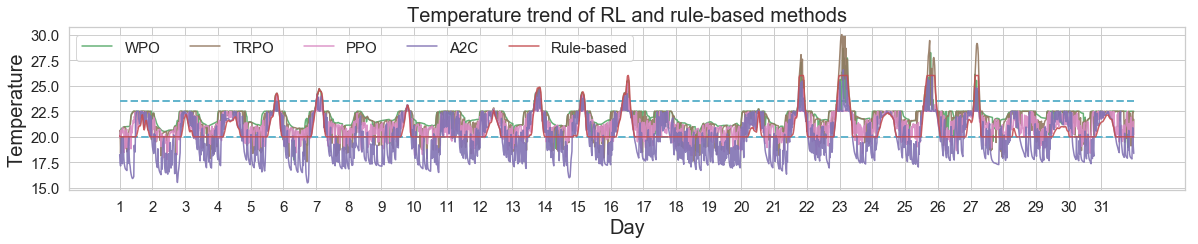

In [108]:
total_timesteps = 24*31*3
fig = plt.figure(figsize=(20,3))
ax = fig.add_subplot(111)
int_list = list(range(1,32))
string_label_list = [str(x) for x in int_list]
ax.set_xticks(list(range(0,24*31*3,24*3)))
ax.set_xticklabels(string_label_list)
ax.plot(np.arange(total_timesteps), wpo_rl_temp_list, label = 'WPO', color = green,  alpha=0.9)
ax.plot(np.arange(total_timesteps), trpo_temp_list, label = 'TRPO', color = '#937860',  alpha=0.9)
ax.plot(np.arange(total_timesteps), ppo_temp_list, label = 'PPO', color = '#da8bc3',  alpha=0.9)
ax.plot(np.arange(total_timesteps), a2c_temp_list, label = 'A2C', color = '#8172b3',  alpha=0.9)
ax.plot(np.arange(total_timesteps), rule_based_temp_list, label = 'Rule-based', color = red,  alpha=0.9)
ax.set_ylabel('Temperature', fontsize = 20)
ax.set_xlabel('Day', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, ncol=5)
plt.hlines(y=23.5, xmin = 0, xmax = total_timesteps, linewidth = 2, color = '#64b5cd', linestyle = '--')
plt.hlines(y=20, xmin = 0, xmax = total_timesteps, linewidth = 2, color = '#64b5cd', linestyle = '--')
plt.title('Temperature trend of RL and rule-based methods', fontsize = 20)

Text(0.5,1,'Temperature trend of WPO methods')

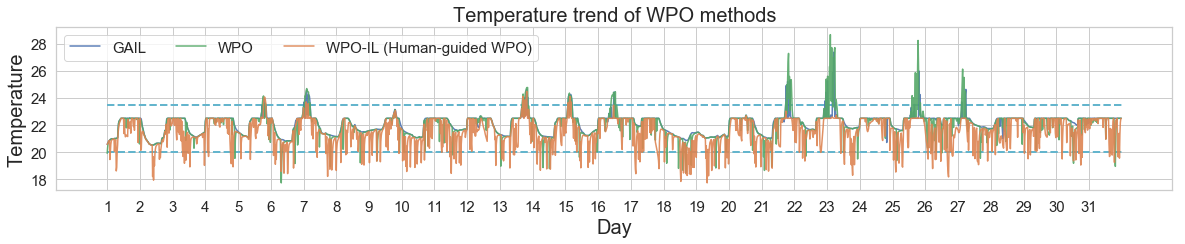

In [109]:
total_timesteps = 24*31*3
fig = plt.figure(figsize=(20,3))
ax = fig.add_subplot(111)
int_list = list(range(1,32))
string_label_list = [str(x) for x in int_list]
ax.set_xticks(list(range(0,24*31*3,24*3)))
ax.set_xticklabels(string_label_list)
ax.plot(np.arange(total_timesteps), wpo_il_temp_list, label = 'GAIL', color = blue, alpha=0.9)
ax.plot(np.arange(total_timesteps), wpo_rl_temp_list, label = 'WPO', color = green, alpha=0.9)
ax.plot(np.arange(total_timesteps), wpo_il_rl_temp_list, label = 'WPO-IL (Human-guided WPO)', color = orange, alpha=0.9)
ax.set_ylabel('Temperature', fontsize = 20)
ax.set_xlabel('Day', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, ncol=5)
plt.hlines(y=23.5, xmin = 0, xmax = total_timesteps, linewidth = 2, color = '#64b5cd', linestyle = '--')
plt.hlines(y=20, xmin = 0, xmax = total_timesteps, linewidth = 2, color = '#64b5cd', linestyle = '--')
plt.title('Temperature trend of WPO methods', fontsize = 20)

/Users/kady/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:214: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


<BarContainer object of 7 artists>

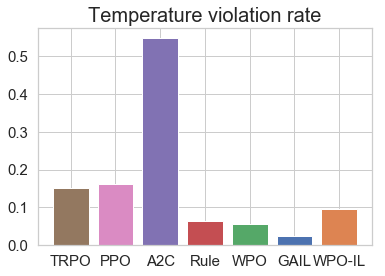

In [110]:
fig = plt.figure()
plt.title('Temperature violation rate', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.bar(['TRPO', 'PPO', 'A2C', 'Rule', 'WPO', 'GAIL', 'WPO-IL'], [trpo_violation_rate, ppo_violation_rate, a2c_violation_rate, rule_based_violation_rate, wpo_rl_violation_rate, wpo_il_violation_rate, wpo_il_rl_violation_rate], color = ['#937860', '#da8bc3', '#8172b3', red, green, blue, orange])

/Users/kady/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:214: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


(15000, 25000)

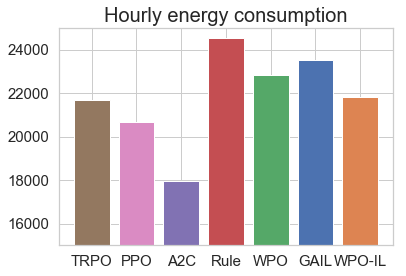

In [111]:
fig = plt.figure()
plt.title('Hourly energy consumption', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.bar(['TRPO', 'PPO', 'A2C', 'Rule', 'WPO', 'GAIL', 'WPO-IL'], [trpo_average_hourly_power, ppo_average_hourly_power, a2c_average_hourly_power, rule_based_average_hourly_power, wpo_rl_average_hourly_power, wpo_il_average_hourly_power, wpo_il_rl_average_hourly_power], color = ['#937860', '#da8bc3', '#8172b3', red, green, blue, orange])
plt.ylim([15000, 25000])